<a href="https://colab.research.google.com/github/gptv/suen/blob/main/math_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR 數學教材

---

## OCR Exploration and Structured Outputs
公式與排版效果

---

### Used
- Mistral OCR
- Pixtral 12B & Ministral 8B


### Setup
First, let's install `mistralai` and download the required files.

In [2]:
!pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 7.5 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We can now set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [15]:
from mistralai import Mistral

api_key = "api_key"
client = Mistral(api_key=api_key)

In [12]:
from pathlib import Path  # 確保導入 Path

# 設定 PDF 檔案路徑
pdf_path = Path("/content/drive/MyDrive/allbooks/hs/k12books20240618/math3.pdf")
assert pdf_path.is_file(), f"文件（{pdf_path}）不存在，请检查路径！"

print(f"找到 PDF 文件：{pdf_path}")

找到 PDF 文件：/content/drive/MyDrive/allbooks/hs/k12books20240618/math3.pdf


{
    "pages": [
        {
            "index": 0,
            "markdown": "![img-0.jpeg](img-0.jpeg)\n\n\u666e \u901a \u9ad8 \u4e2d \u6559\u79d1\u4e66\n![img-1.jpeg](img-1.jpeg)\n\nSHUXUE\n\n# \u9009\u62e9\u6027\u5fc5\u4fee \n\n\u7b2c\u4e09\u518c\n![img-2.jpeg](img-2.jpeg)",
            "images": [
                {
                    "id": "img-0.jpeg",
                    "top_left_x": 1882,
                    "top_left_y": 177,
                    "bottom_right_x": 2287,
                    "bottom_right_y": 1207,
                    "image_base64": ""
                },
                {
                    "id": "img-1.jpeg",
                    "top_left_x": 2276,
                    "top_left_y": 601,
                    "bottom_right_x": 2976,
                    "bottom_right_y": 890,
                    "image_base64": ""
                },
                {
                    "id": "img-2.jpeg",
                    "top_left_x": 1520,
                    "top_left_y": 14
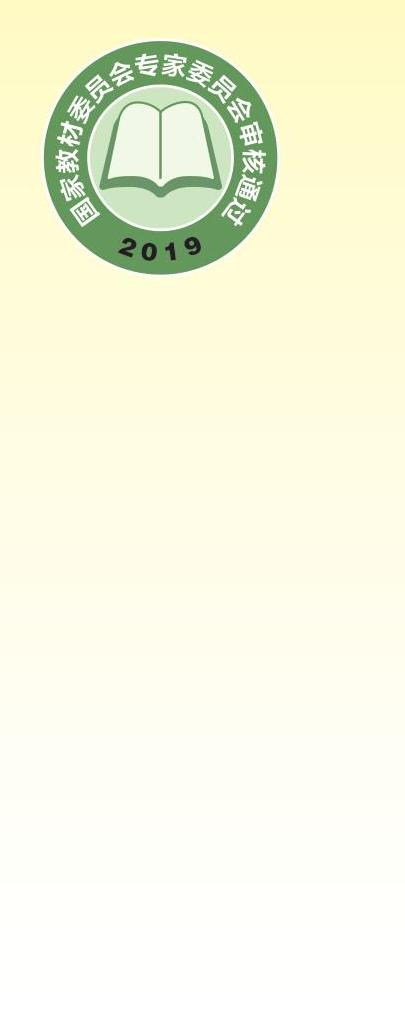
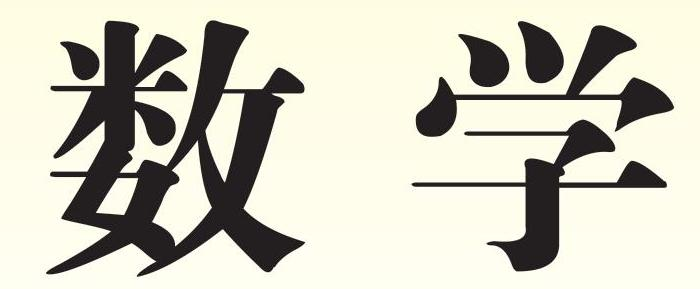
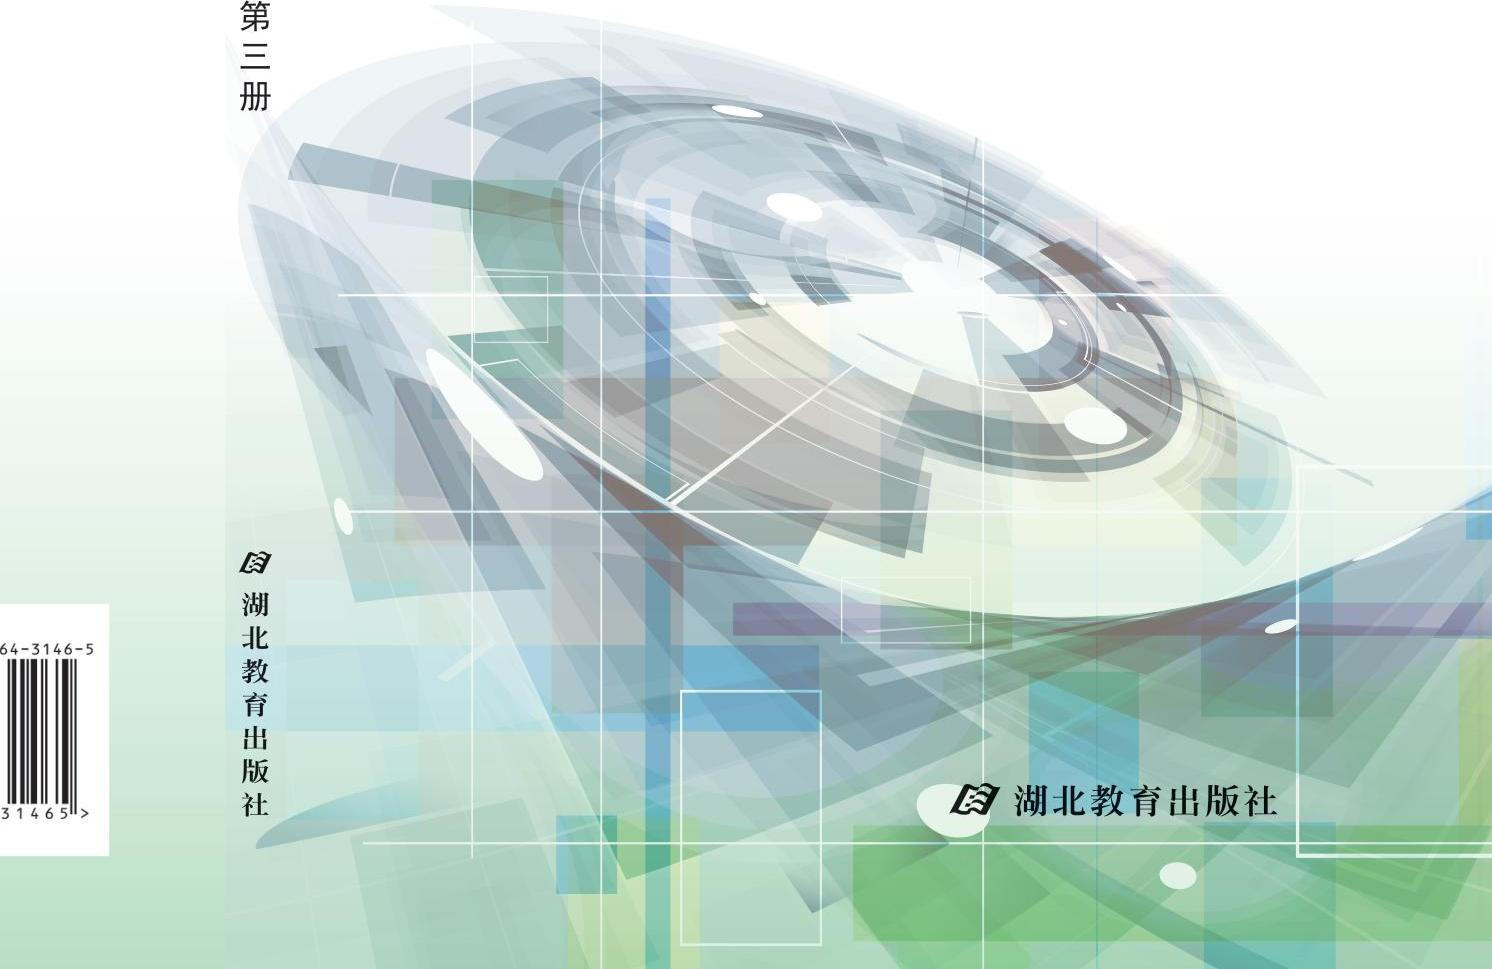
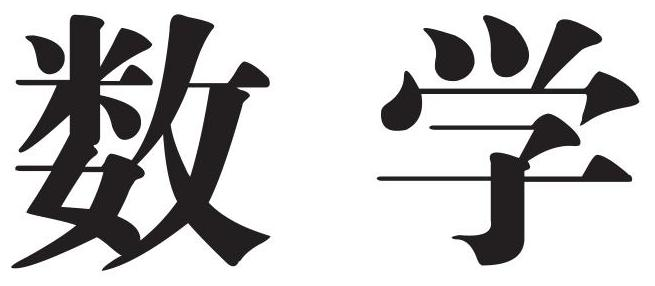
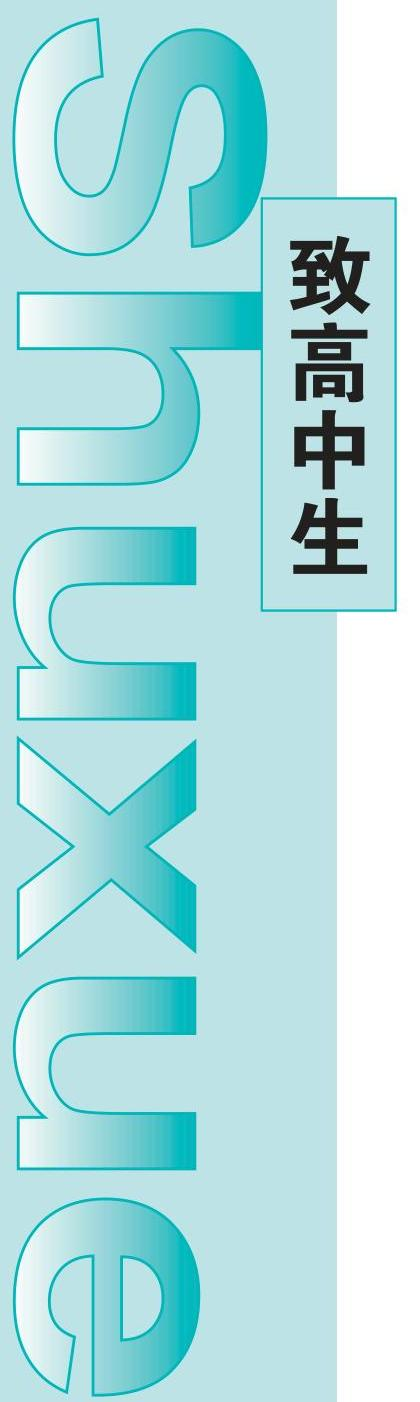
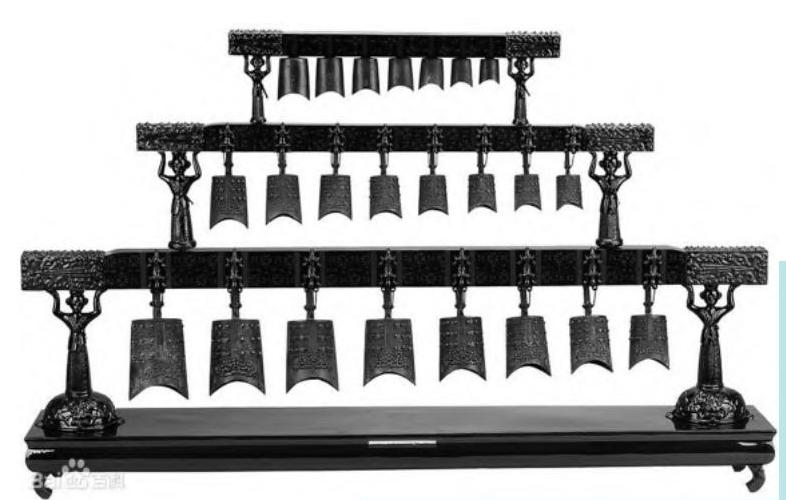
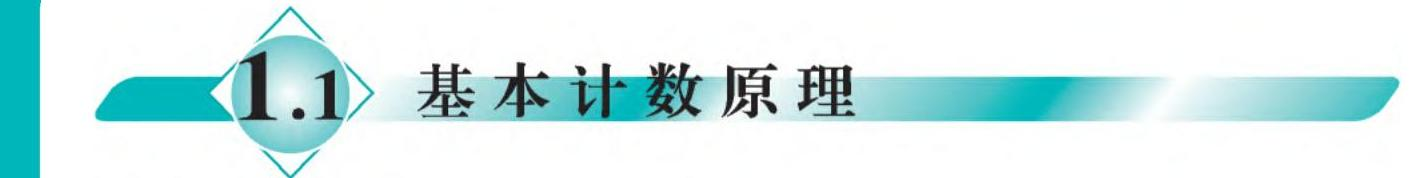
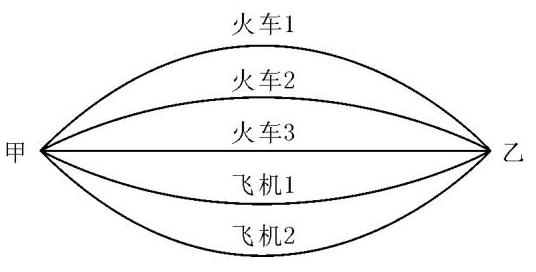
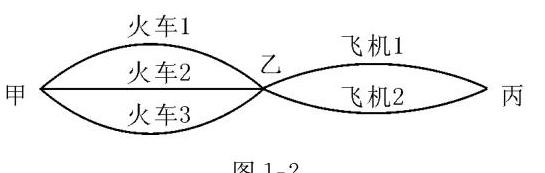
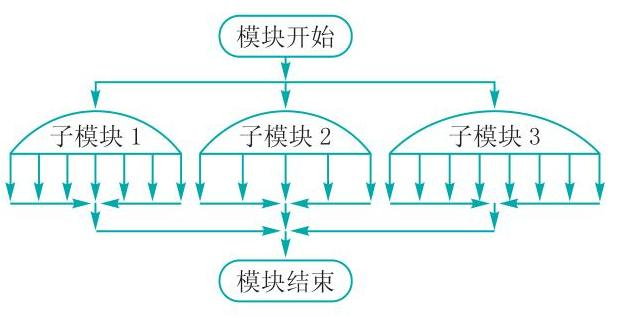
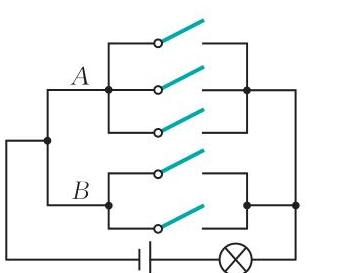
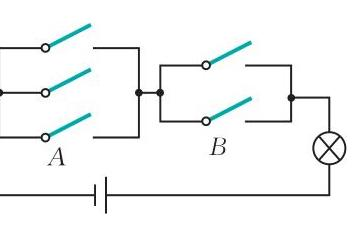
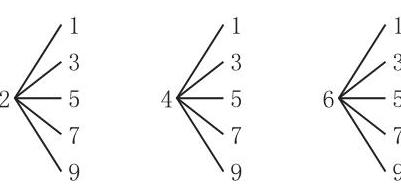
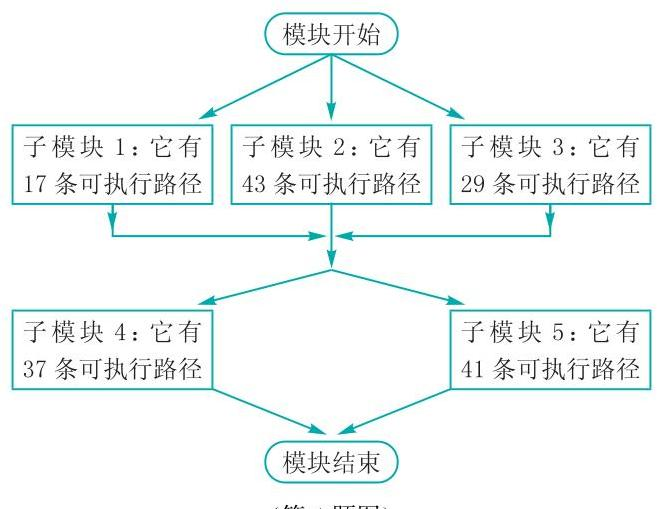
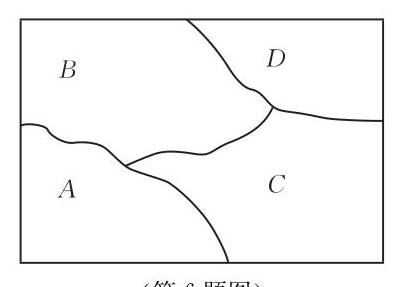
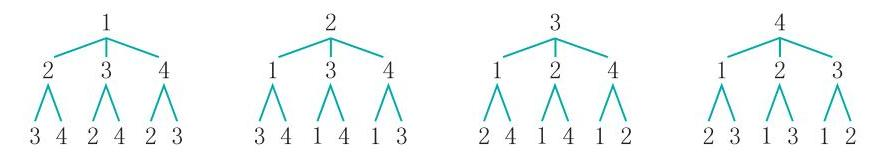
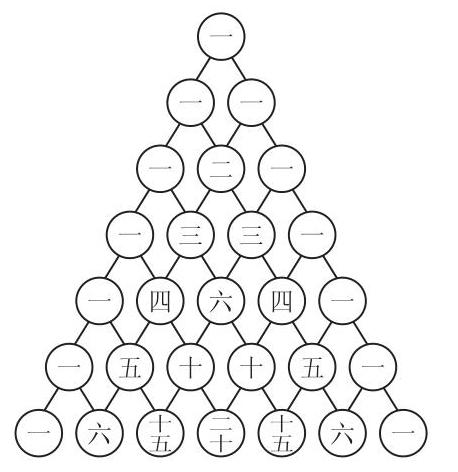
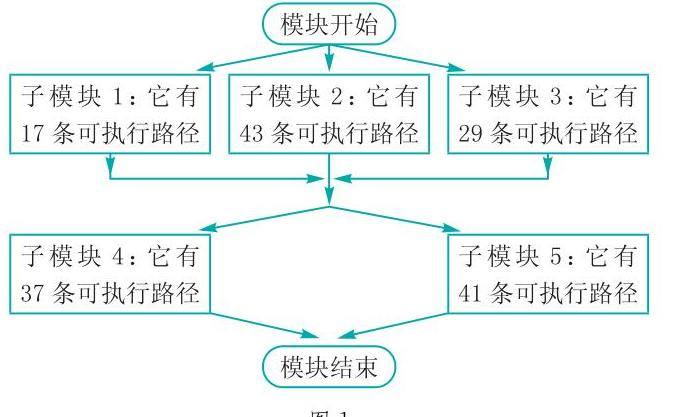
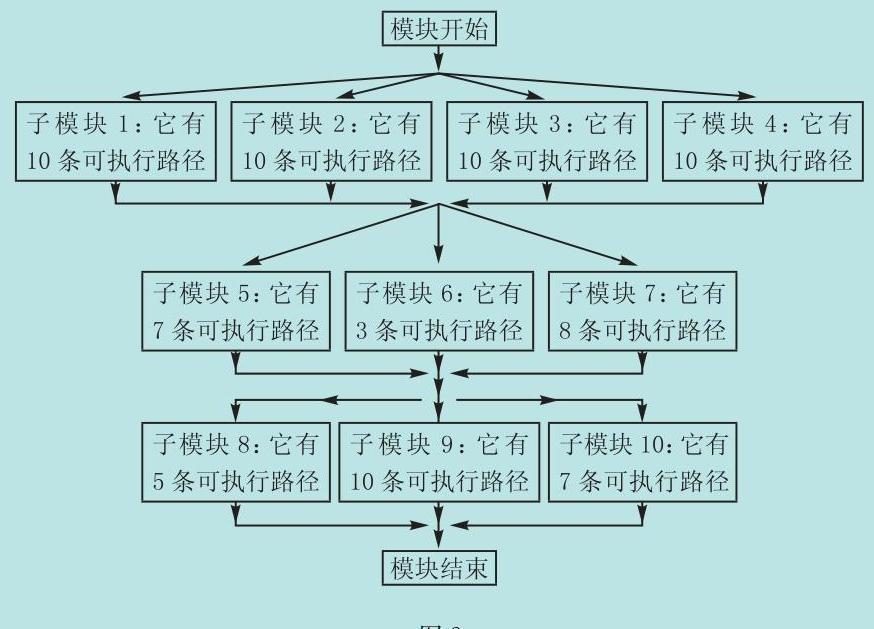
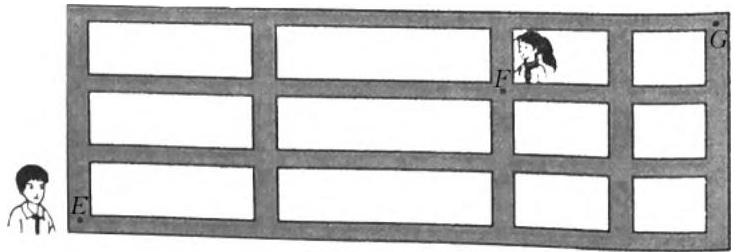
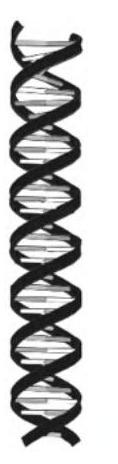
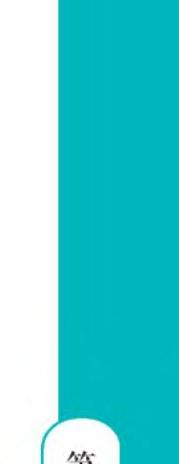
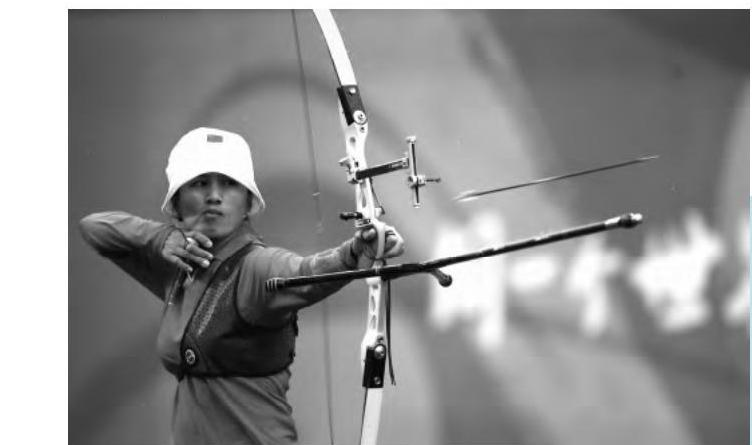
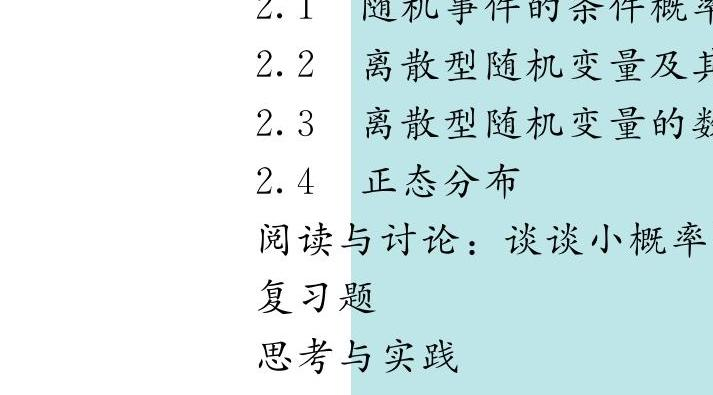
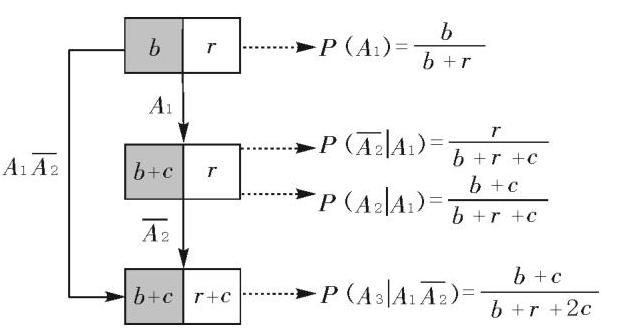
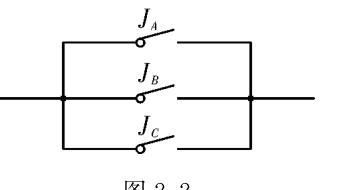
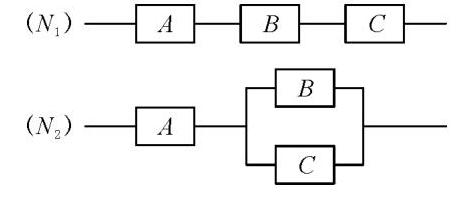
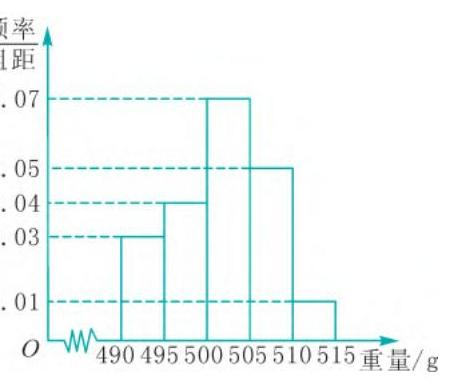
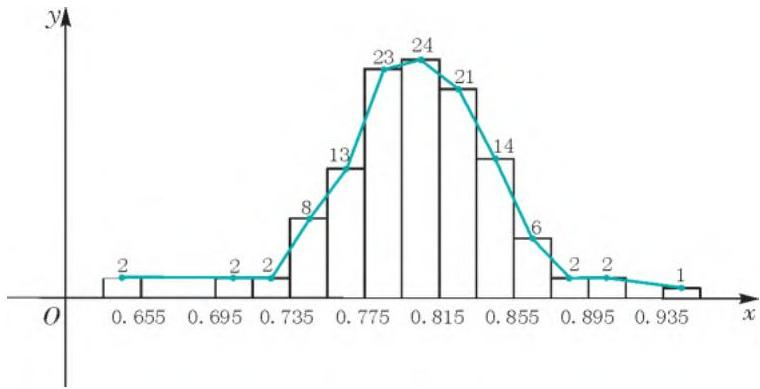
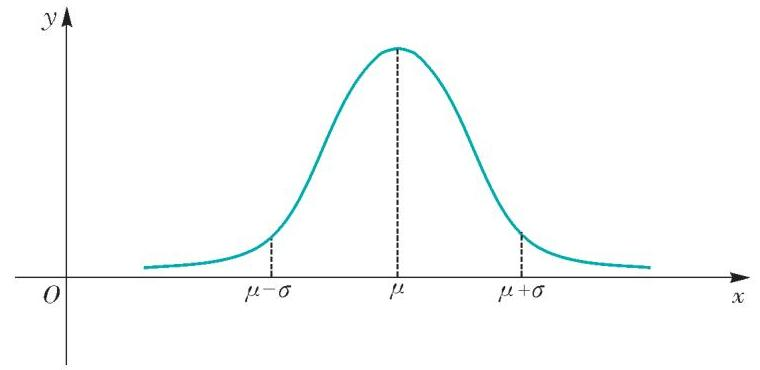
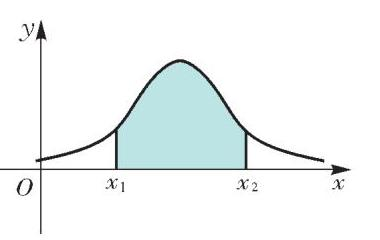
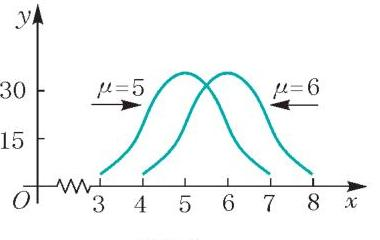
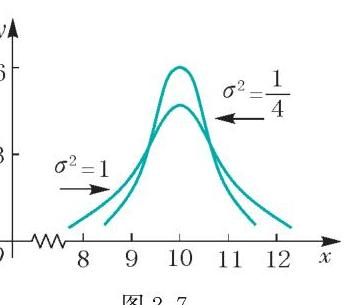
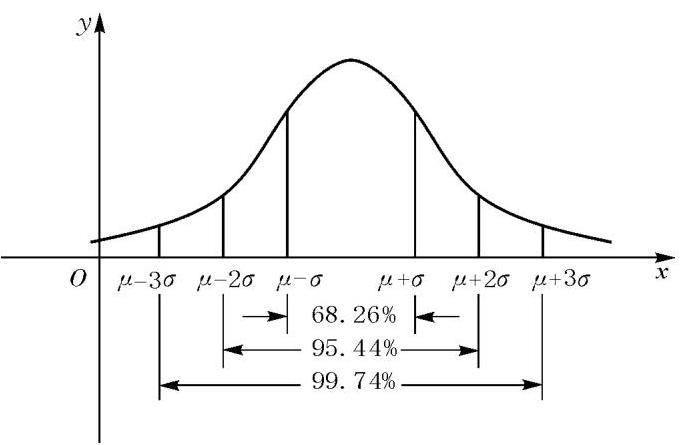
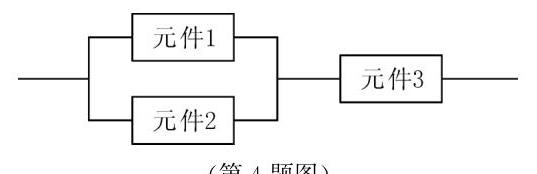
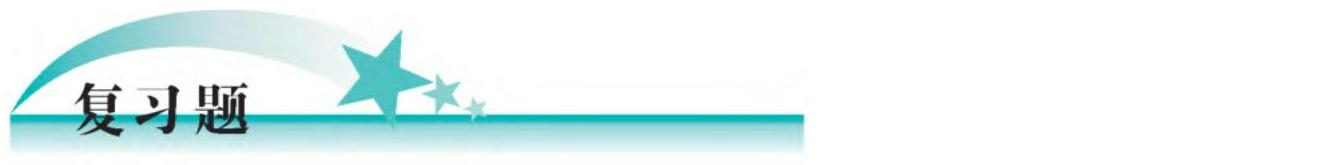
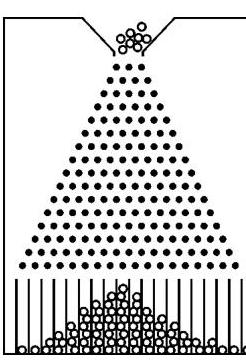
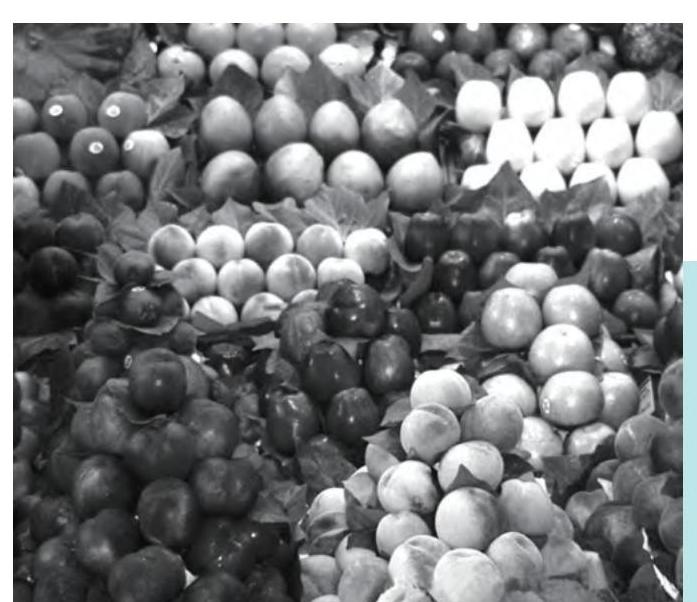
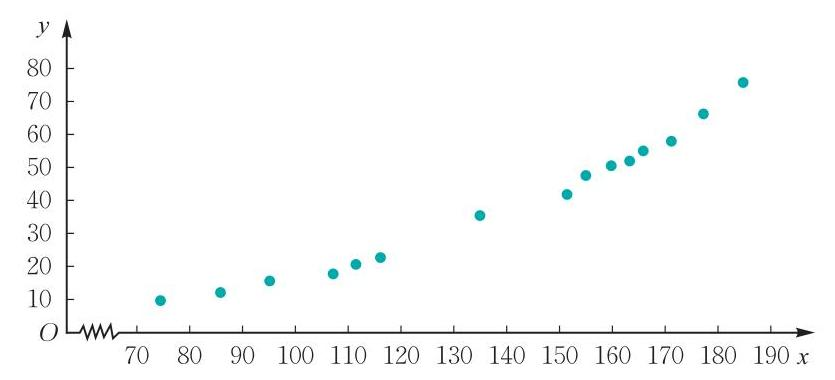
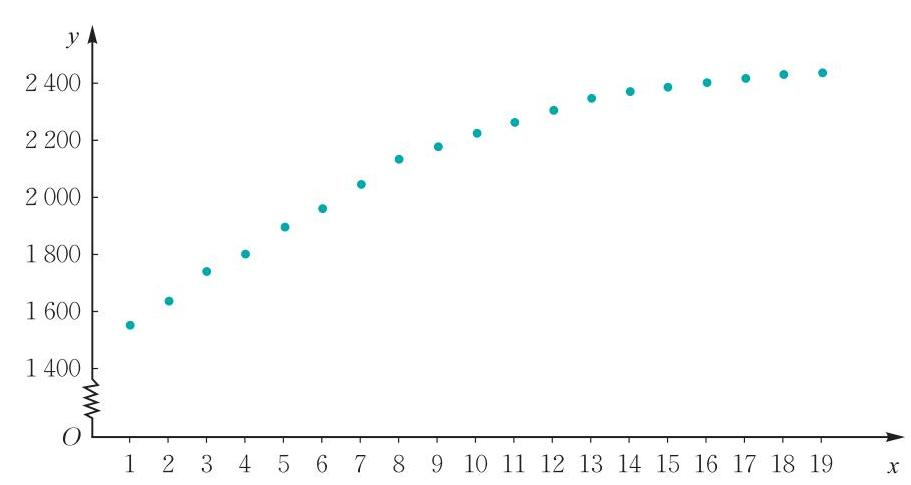
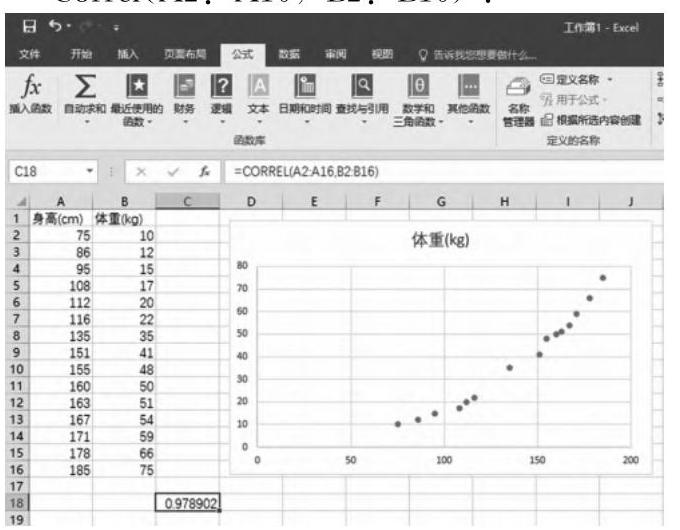
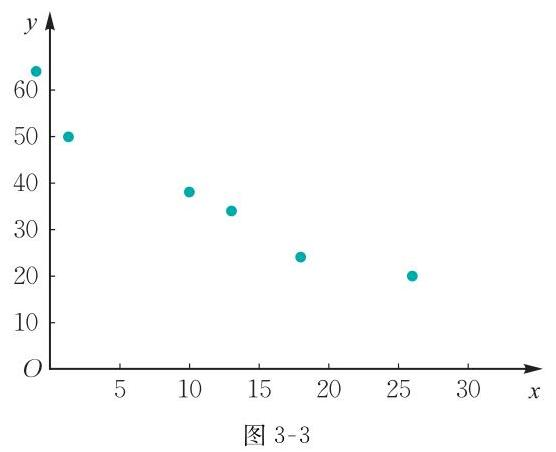
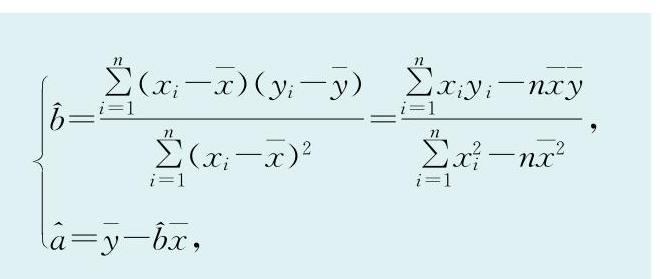
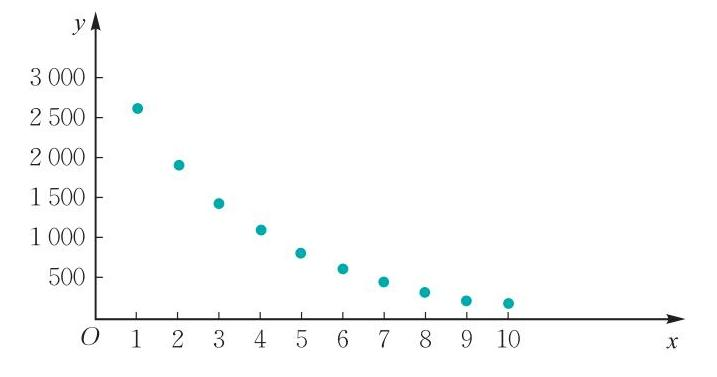
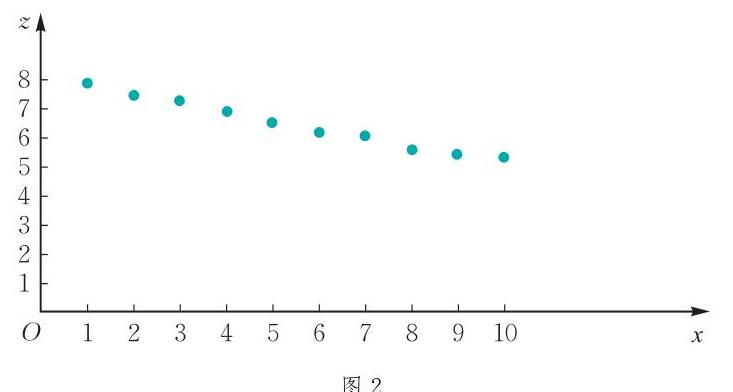

<ipython-input-16-a12f9d1581d6>:16: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response_dict = json.loads(pdf_response.json())


In [16]:
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

uploaded_file = client.files.upload(
    file={
        "file_name": pdf_path.stem,
        "content": pdf_path.read_bytes(),
    },
    purpose="ocr",
)

signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

pdf_response = client.ocr.process(document=DocumentURLChunk(document_url=signed_url.url), model="mistral-ocr-latest", include_image_base64=True)

response_dict = json.loads(pdf_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

*The OCR model can output interleaved text and images (set `include_image_base64=True` to return the base64 image ), we can view the result with the following:*

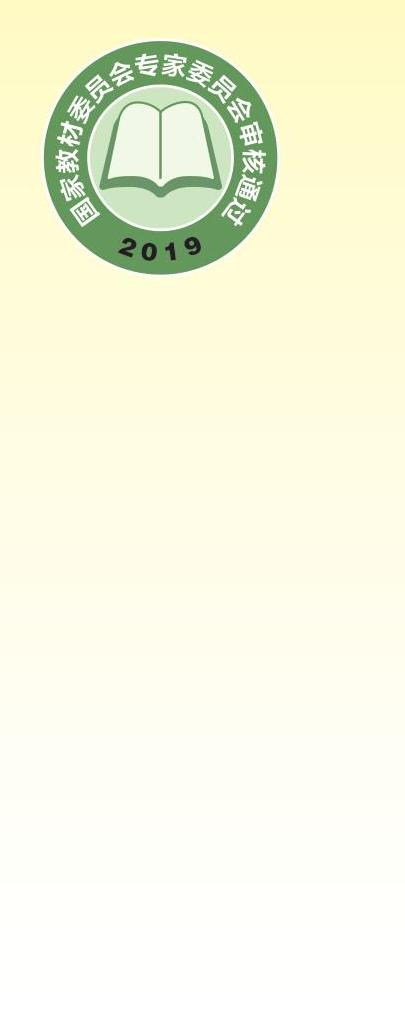

普 通 高 中 教科书
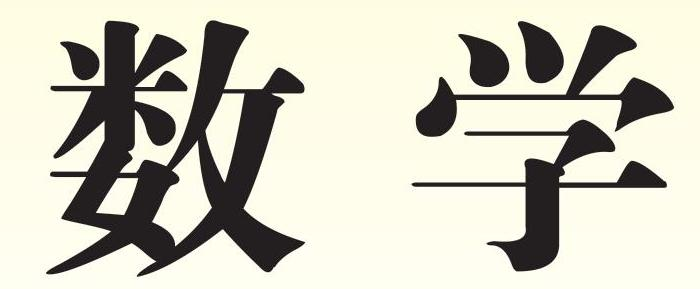

SHUXUE

# 选择性必修 

第三册
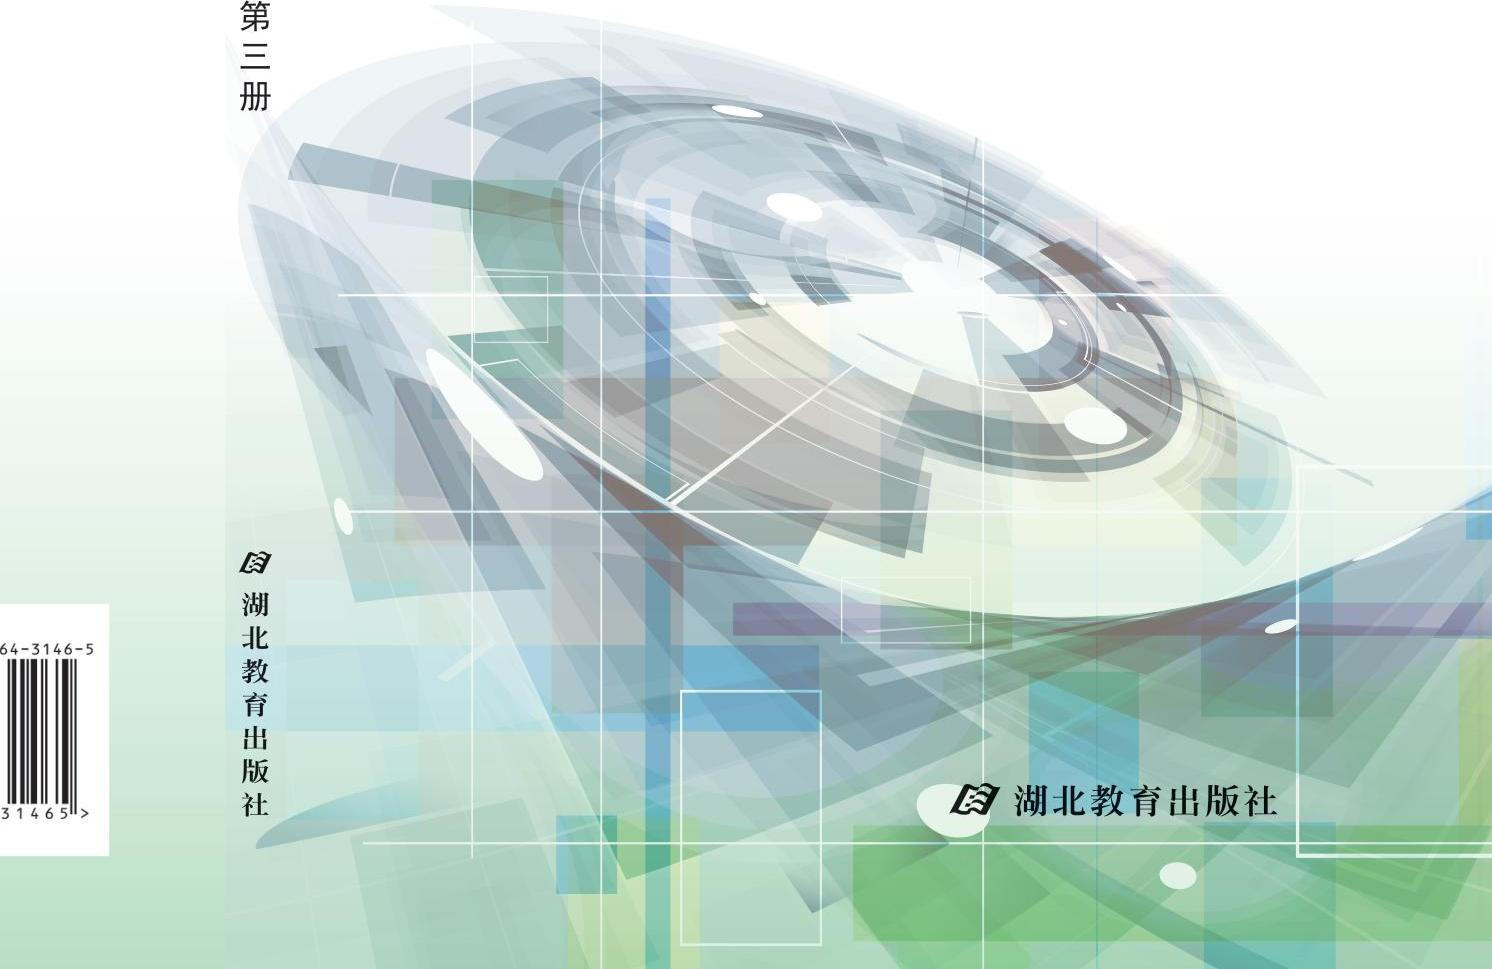

普通高中教科书
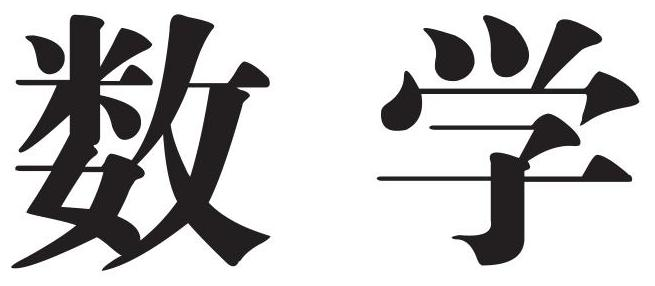

SHUXUE

# 选择性必修 

## 第三册

主 编 彭双阶

主 编：彭双阶
副 主 编：徐胜林 胡典顺 郭熙汉
本册主编：胡典顺
主要编者：张建军 方延伟 彭章艳 陈应保 左国新胡典顺 徐胜林

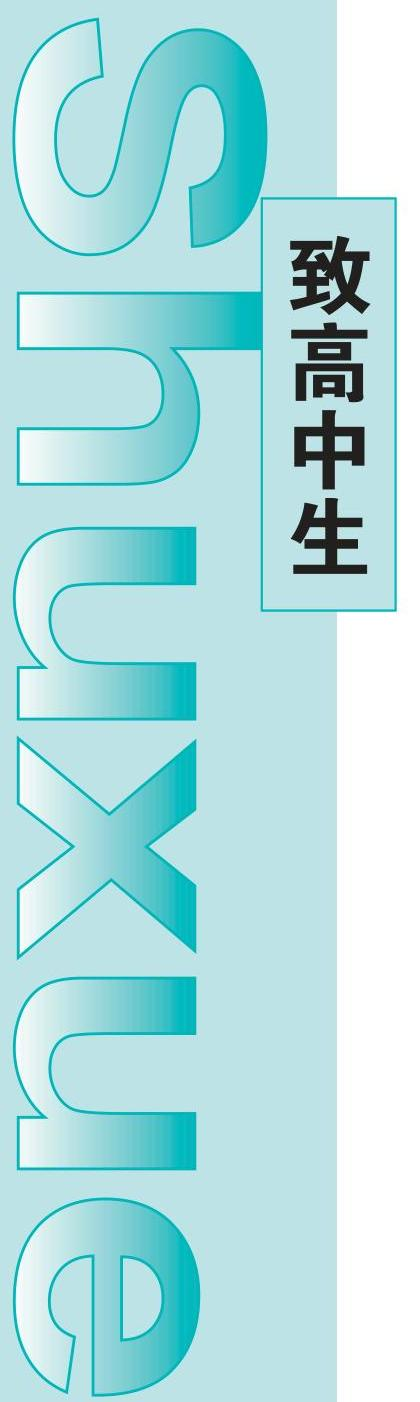

高中数学是一门非常重要的课程. 数学以其卓越的智力成就被人们尊称为 "科学的皇后"。数学是人类最高超的智慧活动，是人类心灵最独特的创造，是形成人类文化的主要力量，是人类文明的核心部分，是认识世界和创造世界的一把关键钥匙。

我们需要数学，因为作为人类文明发展标志的数学，是人类文化的重要组成部分. 数学既是一种睿智的文化、一种思想的体操，更是现代科技进步中理性文化的核心。

我们需要数学，因为数学在形成人类理性思维和促进个人智力发展的过程中发挥着独特的、不可替代的作用. 数学素养是现代社会公民应该具备的一种必备品格。

我们需要数学，因为数学是刻画自然规律和社会现象的特殊语言和有力工具，是自然科学、技术科学的基础，在经济科学、社会科学、人文科学的发展中发挥越来越强大的作用。

我们需要数学，因为数学已经渗透到现代社会和人们日常生活的各个方面. 学好数学是提升生活质量、优化生活品质的重要保证.

本套教科书以《普通高中数学课程标准（2017 年版）》为依据来编写，遵循了现代数学教与学的规律，着眼于 21 世纪现代生活和未来发展，力求提升同学们的数学核心素养，更快地适应未来社会的发展。

教科书是教与学的一种重要资源。在使用本套教科书的同时，我们还应该多关注现实生活，关注社会进步和科技发展，用数学眼光观察世界，用数学思维思考世界，用数学语言表达世界. 现代社会是信息社会，又是终身学习的社会. 在这个大数据时代，我们可以根据实际条件，选择利用计算机与互联网，丰富学习资源，提高学习效率。积极参与数学活动，勤于思考，敢于质疑，乐于合作交流，克难奋进，砥砺前行，养成良好的数学学习习惯，让数学学习变得更加生动活泼、富有情趣。

亲爱的同学们，插上快乐的翅膀，带着青春的梦想，在浩瀚的数学海洋扬帆奋进吧！

# 目录 

## 11 计数原理

1.1 基本计数原理 ..... 4
1.2 排列 ..... 8
1.3 组合 ..... 14
1.4 二项式定理 ..... 18
阅读与讨论：从航天飞机发动机的设计与测试读起 ..... 23
复习题 ..... 25
思考与实践 ..... 27
第2章概率
2.1 随机事件的条件概率 ..... 30
2.2 离散型随机变量及其分布列 ..... 42
2.3 离散型随机变量的数字特征 ..... 51
2.4 正态分布 ..... 62
阅读与讨论：读读小概率事件 ..... 67
复习题 ..... 68
思考与实践 ..... 70

# 目 录 

## 第3章统计

3.1 成对数据的统计相关性 ..... 74
阅读与讨论：散点图的制作 ..... 78
3.2 一元线性回归 ..... 79
阅读与讨论：最小二乘估计推导及线性相关关系判断 ..... 83
课题学习：可线性化的回归问题 ..... 86
$3.32 \times 2$ 列联表 ..... 88
阅读与讨论： $2 \times 3$ 列联表的独立性检验 ..... 93
复习题 ..... 94
思考与实践 ..... 95
附录 相关系数检验的临界值表 ..... 96

# 第 1 章 计数原理 

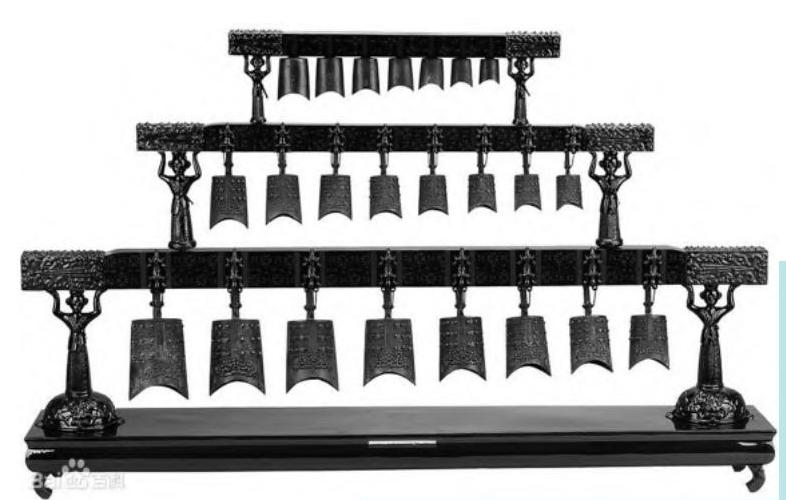
1.1 基本计数原理
1.2 排列
1.3 组合
1.4 二项式定理

闻读与讨论：从航天飞机发动机的设计与测试谈起复习题
思考与实践

编钟是中国古代大型乐器, 况起于西周, 盛于春秋战国直至秦汉。编钟用青铜铸成, 由大小不同的扇圆钟按照音调高低的次序排列起来, 是挂在一个巨大的钟架上。用丁字形的木锤和长形的棒分别敲打铜钟, 能发出不同的乐音。因为每个钟的音调不同, 按照音谱敲打, 可以演奏出美妙的乐曲。1978 年, 湖北随县(今随州市)南郊擂鼓墩的一座战国时代（约公元前 433 年）的曾侯乙墓出土的编钟，是迄今为止所发现的成套编钟中最引人注目的一套。

这套编钟由 65 件组成, 若从中挑选出 23 件展览, 有多少种不同的挑选方法?
人们在社会生活的各个方面经常需要进行计数, 如电话号码的编排、密码的设定、彩票的设计、集成电路的布线安排以及计算机的程序编制等, 我们把诸如此类的问题统称为 "计数" 问题。

当计数对象的个数较少时, 我们可以将所有可能的结果列出, 并一个一个地去数; 而当计数对象的数目较多时, 一个一个地数是很困难的。

本章我们来学习两个基本的计数原理, 在此基础上学习排列和组合这两种特定的模型, 并用它们去刻画和解决生活中一些简单的计数问题.

# 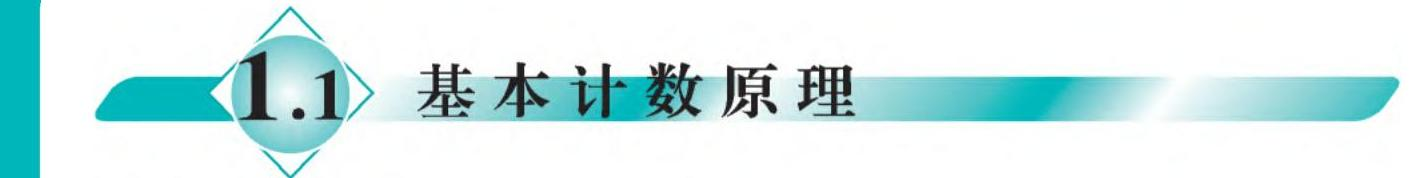 

交通的飞速发展，大大丰富了人们的出行方式，提高了人们的出行效率，我们先看下面两个问题。

问题1 从甲地到乙地，可以乘火车，也可以乘飞机，一天中，火车有 3 班，飞机有 2 班。那么，一天中乘坐这些交通工具从甲地到乙地共有多少种不同的走法？

在这个问题中，要完成从甲地到乙地这件事，可以分成两类走法：乘火车和乘飞机。因为一天中乘火车有 3 种走法，乘飞机有 2 种走法，每一种走法都可以完成从甲地到乙地这件事，所以共有 $3+2=5$ 种不同的走法（如图1-1）。
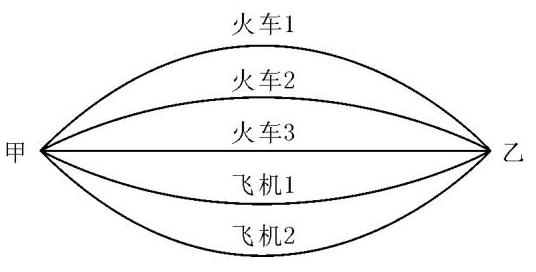

图 1-1

一般地，有如下原理：
分类加法计数原理 完成一件事有 $n$ 类方法，在第 1 类方法中有 $m_{1}$ 种不同的方法，在第 2 类方法中有 $m_{2}$ 种不同的方法， $\cdots \cdots$ ，在第 $n$ 类方法中有 $m_{n}$ 种不同的方法，那么完成这件事共有 $N=m_{1}+m_{2}+\cdots+m_{n}$ 种不同的方法。

问题2 张军先从甲地乘火车到乙地，完成工作任务后，再于次日从乙地乘飞机到丙地。一天中，甲地到乙地的火车有 3 班（均可在当天到达），乙地到丙地的飞机有 2 班。那么，张军共有多少种不同的走法？

在这个问题中，张军要完成从甲地到丙地这件事，必须经过先乘火车、再乘飞机这两个步骤。因为乘火车有 3 种走法，

其中每一种走法, 再乘飞机都有 2 种走法, 所以, 张军从共有 $3 \times 2=6$ 种不同的走法 (如图 1-2).
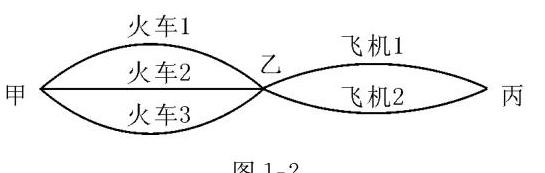

图 1-2

一般地, 有如下原理:
分步乘法计数原理 完成一件事需要经过 $n$ 个步骤, 完成第 1 步有 $m_{1}$ 种不同的方法, 完成第 2 步有 $m_{2}$ 种不同的方法, $\cdots \cdots$, 完成第 $n$ 步有 $m_{n}$ 种不同的方法, 那么完成这件事共有 $N=m_{1} \times m_{2} \times \cdots \times m_{n}$ 种不同的方法.

在如图 1-3 所示的程序模块中, 有许多沿着箭头方向从模块开始直到模块结束的路线, 每一条路线都是一条可执行路径. 请问: 在这个模块中, 有多少条可执行路径?
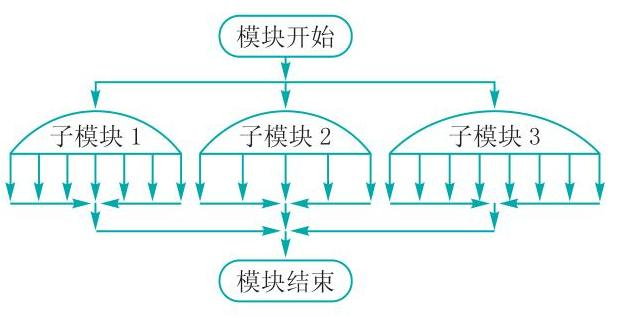

图 1-3
解 每一条可执行路径相当于连接起止框的一条连通的带箭头的路线. 图 1-3 中的程序模块可以选择运行三个子模块中的任意一个, 共有 3 类可执行路径.

运行第一个子模块有 7 条不同的可执行路径, 运行第二个子模块有 5 条不同的可执行路径, 运行第三个子模块有 8 条不同的可执行路径. 由于每次运行模块时, 三个子模块中只有一个被运行, 根据分类加法计数原理, 共有 $7+5+8=20$ 条可执行路径。
(1) 在图 1-4(1)的电路中, 仅合上一个开关接

通电路, 有多少种不同的方法?
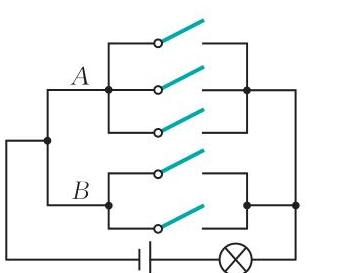
(1)
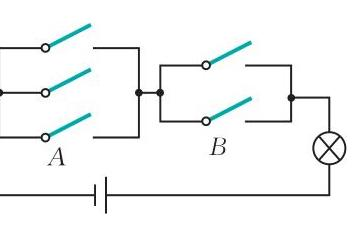
(2)

图 1-4
（2）在图 1-4（2）的电路中，仅合上两个开关接通电路，有多少种不同的方法?

解 （1）在图 1-4（1）中，按要求接通电路，只需要在 $A$中的 3 个开关中选择一个或者在 $B$ 中的 2 个开关中选择一个合上即可. 根据分类加法计数原理，共有 $3+2=5$ 种不同的方法。
（2）在图1-4（2）中，按要求接通电路必须分两步进行：第一步，合上 $A$ 中的一个开关；第二步，合上 $B$ 中的一个开关. 根据分步乘法计数原理，共有 $3 \times 2=6$ 种不同的方法。

# 设集合 $A=\{2,4,6\}, B=\{1,3,5,7,9\}$. 从 

集合 $A$ 中取一个数作为十位数字，从集合 $B$ 中取一个数作为个位数字.
（1）能组成多少个十位数字小于个位数字的两位数?
（2）能组成多少个两位数?
解 （1）按十位数字的不同取值，可将满足题意的两位数分成三类：

十位数字为 2 时，个位数字可以取 $3,5,7,9$ ，共有 4个数: $23,25,27,29$;

十位数字为 4 时，个位数字可以取 $5,7,9$ ，共有 3 个数: $45,47,49$ ；

十位数字为 6 时，个位数字可以取 7,9 ，共有 2 个数： 67,69 。

根据分类加法计数原理，能组成 $4+3+2=9$ 个十位数字小于个位数字的两位数。
（2）要组成这个两位数，需要分成两个步骤：第一步，从 $A$ 中取一个数作为十位数，有 3 种不同的方法；第二步，从 $B$中取一个数作为个位数，有 5 种不同的方法。

故能组成 $3 \times 5=15$ 个不同的两位数，其组成方式如图1-5所示。
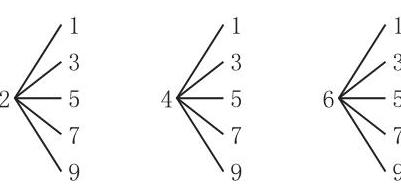

图 1-5

# 练习 

1. 在学校的选修课程目录中，共有 6 门自然科学课程和 4 门社会科学课程。
（1）如果某学生只选 1 门课程作为新学期的选修课，他有多少种选择方法？
（2）如果某学生决定选两门课程，其中一门是自然科学课程，另一门是社会科学课程，他有多少种选择方法？
2. 如果使用 2 个大写英文字母后接 3 个数字的方式构成汽车牌照号码，能组成多少个不同的汽车牌照号码?

## 习题 1.1

1. 书架上放有 8 本不同的数学书和 6 本不同的英语书。
（1）从中任取一本，有多少种不同的取法？
（2）从中任取数学书和英语书各一本，有多少种不同的取法？
2. 已知集合 $A=\{1,2,-3\}, B=\{-1,-2,3,4\}, C$ 是直角坐标平面内点的集合，且 $C=\{(x, y) \mid x \in A, y \in B\}$ 。
(1) $C$ 中有多少个不同的点?
（2） $C$ 中位于第一象限的点有多少个？
3. 100 个人参加某项资格考试，每个人的考试结果为"通过"或"不通过"，则这 100 个人的考试结果共有多少种？

4. 在如图所示的模块中有多少条从模块开始到模块结束的可执行路径？
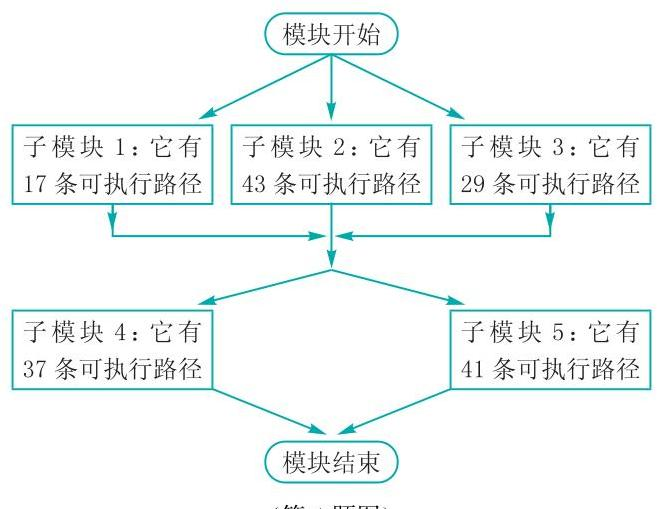
（第 4 题图）
5. 用 $1,5,9,13$ 中的任意一个数作分子, $4,8,12,16$ 中的任意一个数作分母,可以构成多少个不同的分数? 可以构成多少个不同的真分数?
6. 如图, 要给地图中 $A, B, C, D$ 四个区域分别涂上 3 种不同颜色中的某一种, 允许同一种颜色使用多次, 但相邻区域必须涂不同的颜色, 不同的涂色方案有多少种?
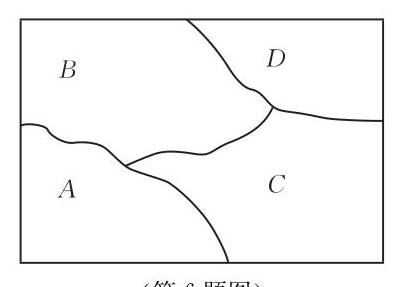
(第 6 题图)
7. (1) 将四封信随机投人三个不同的邮箱, 有多少种不同的方法?
(2) 设集合 $A=\{1,2,3,4\}, B=\{5,7,9\}$, 则函数 $f: A \rightarrow B$ 有多少个?
8. (1) 乘积 $\left(a_{1}+a_{2}\right)\left(b_{1}+b_{2}+b_{3}\right)\left(c_{1}+c_{2}+c_{3}+c_{4}\right)$ 展开后共有多少项?
(2) 乘积 $\left(a_{1}+a_{2}+\cdots+a_{m}\right)\left(b_{1}+b_{2}+\cdots+b_{n}\right)$ 展开后共有多少项?

# 1.2 

排 列

在 1.1 节的例子中我们可以看到, 用分类加法计数原理和分步乘法计数原理可以解决一些简单的计数问题, 但对于一些特殊的计数问题, 需要寻求更加简捷的计数方法.

我们先讨论下面两个问题.

问题1 某班准备从甲、乙、丙这 3 名学生中选出 2 人分别担任班长和副班长，有多少种不同的选法？

解决这一问题可以分成两个步骤：
第1步，确定班长的人选，从 3 人中任选 1 人，有 3 种方法；

第2步，从剩下的两名学生中选出 1 人担任副班长，有 2种方法。

根据分步乘法计数原理，一共有 $3 \times 2=6$ 种不同的方法，如图 1-6 所示：

| 班长 |  |  |
| :--: | :--: | :--: |
| 甲 | 乙 | 甲乙 |
|  | 丙 | 甲丙 |
| 乙 | 甲 | 乙甲 |
|  | 丙 | 乙丙 |
| 丙 | 甲 | 丙甲 |
|  | 乙 | 丙乙 |

图 1-6
把上面问题中被取的对象叫作元素，于是问题 1 可以归结为：从 3 个不同的元素甲、乙、丙中任取 2 个，然后按照一定的顺序排成一列，一共有多少种不同的排法？

所有不同的排列是：
甲乙，甲丙，乙甲，乙丙，丙甲，丙乙，
共有 $3 \times 2=6$ 种不同的排法.

问题2 从 $1,2,3,4$ 这 4 个数字中取出 3 个数字组成一个三位数，这样的三位数共有多少个？

解决这一问题可以分成三个步骤：
第1步，确定百位上的数字：在 $1,2,3,4$ 这 4 个数字中任取一个，有 4 种方法；

第2步，确定十位上的数字：在百位上的数字确定后，十位上的数字只能从余下的 3 个数字中去取，有 3 种方法；

第3步，确定个位上的数字：在百位、十位上的数字确定

后，个位上的数字只能从余下的 2 个数字中去取，有 2 种方法。
根据分步乘法计数原理，共有 $4 \times 3 \times 2=24$ 个不同的三位数。如图 1-7 所示，我们可以用树形图写出所有的三位数。
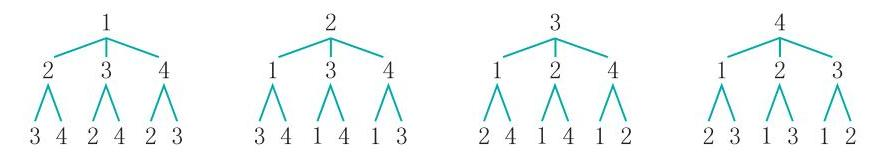

图 1-7
同样，问题 2 可以归结为：从 4 个不同元素中取出 3 个元素按一定的顺序排成一列，一共有多少种不同的排法？

其排法共有 24 种，它们是：

$$
\begin{aligned}
& 123,124,132,134,142,143, \\
& 213,214,231,234,241,243, \\
& 312,314,321,324,341,342, \\
& 412,413,421,423,431,432 .
\end{aligned}
$$

一般地，从 $n$ 个不同元素中取出 $m(m \leqslant n)$ 个元素，按照一定的顺序排成一列，叫作从 $n$ 个不同元素中取出 $m$ 个元素的一个排列（Arrangement），所有排列的个数，叫作从 $n$ 个不同元素中取出 $m$ 个元素的排列数，用符号 $\mathrm{A}_{n}^{m}$ 表示。

如上述问题 1 是求从 3 个不同元素中取出 2 个元素的排列数，记作 $\mathrm{A}_{2}^{3}$ ，利用分步乘法计数原理已经求得 $\mathrm{A}_{2}^{3}=3 \times 2=$ 6 (种).

问题 2 是求从 4 个不同元素中取出 3 个元素的排列数，记作 $\mathrm{A}_{3}^{4}$ ，利用分步乘法计数原理已经求得 $\mathrm{A}_{3}^{4}=4 \times 3 \times 2=$ 24 (种).

那么, $\mathrm{A}_{n}^{3}, \mathrm{~A}_{n}^{4}, \cdots, \mathrm{~A}_{n}^{m}(m \leqslant n)$ 怎样计算呢?
求排列数 $\mathrm{A}_{n}^{3}$ 可以这样考虑： $\mathrm{A}_{n}^{3}$ 表示从 $n$ 个元素中取出 2 个元素填在两个空位的排列数，得到其中一个排列，可分两步来完成。填第一个空位有 $n$ 种选择，填第二个空位有 $n-1$ 种选择。

| 空位号 | 1 | 2 |
| :--: | :--: | :--: |
| 选择种数 | $n$ | $n-1$ |

根据分步乘法计数原理，可得排列数

$$
\mathrm{A}_{n}^{2}=n(n-1)
$$

同理可求得 $\mathrm{A}_{n}^{2}=n(n-1)(n-2)$.
类比 $\mathrm{A}_{n}^{2}, \mathrm{~A}_{n}^{2}$ 的导出过程，我们可以导出排列数 $\mathrm{A}_{n}^{m}$ 。

| 空位号 | 1 | 2 | $\cdots$ | $m$ |
| :--: | :--: | :--: | :--: | :--: |
| 选择种数 | $n$ | $n-1$ | $\cdots$ | $n-m+1$ |

$$
\mathrm{A}_{n}^{m}=n(n-1)(n-2) \cdots(n-m+1)
$$

这里 $m, n \in \mathbf{N}^{+}$, 且 $m \leqslant n$, 这个公式叫作排列数公式.
特别地, 当 $m=n$ 时, $\mathrm{A}_{n}^{n}=n(n-1) \cdot \cdots \cdot 3 \cdot 2 \cdot 1$, 记作 $n!$, 读作 $n$ 的阶乘, 于是

$$
\mathrm{A}_{n}^{n}=n!
$$

它表示将 $n$ 个不同元素全部取出的排列数, 它对应的每一个排列称为 $n$ 个不同元素的一个全排列.

我们规定 $0!=1$, 这样, $\mathrm{A}_{n}^{m}$ 有如下计算公式:

$$
\mathrm{A}_{n}^{m}=\frac{n!}{(n-m)!}
$$

(1) 计算 $\mathrm{A}_{0}^{1}, \mathrm{~A}_{0}^{2}$ 的值;
(2) 求证: $\mathrm{A}_{n}^{m}=\frac{n}{n-m} \mathrm{~A}_{n-1}^{m}$.
解 (1) $\mathrm{A}_{0}^{1}=7 \times 6 \times 5 \times 4=840$,
$\mathrm{A}_{0}^{2}=5 \times 4 \times 3 \times 2 \times 1=120$.
证明 (2) $\mathrm{A}_{n}^{m}=\frac{n!}{(n-m)!}$

$$
\begin{aligned}
& =\frac{n}{n-m} \cdot \frac{(n-1)!}{(n-m-1)!} \\
& =\frac{n}{n-m} \cdot \frac{(n-1)!}{(n-1)-m!} \\
& =\frac{n}{n-m} \cdot \mathrm{~A}_{n-1}^{m} .
\end{aligned}
$$

2018 年中国足球超级联赛有 16 支球队参加，每两支球队都要在主、客场分别比赛 1 场，一共要进行多少场比赛？

解 每一场比赛都对应于从 16 个元素中任取两个元素的一个排列，所以，比赛的总场次是

$$
\mathrm{A}_{16}^{16}=16 \times 15=240
$$

解3 用 $1,2,3,4$ 这 4 个数字可以组成多少个没有重复数字的正整数?

解 由 $1,2,3,4$ 这 4 个数字组成的正整数可以分成四类：一位数、两位数、三位数、四位数，其中一位数有 $\mathrm{A}_{1}^{1}$个，两位数有 $\mathrm{A}_{2}^{1}$ 个，三位数有 $\mathrm{A}_{3}^{1}$ 个，四位数有 $\mathrm{A}_{4}^{1}$ 个。

根据分类加法计数原理，用 $1,2,3,4$ 这 4 个数字可以组成 $\mathrm{A}_{1}^{1}+\mathrm{A}_{2}^{1}+\mathrm{A}_{3}^{1}+\mathrm{A}_{4}^{1}=64$ 个没有重复数字的正整数。

解4 6 名同学排成一排，其中甲不在排头，也不在排尾. 问：有多少种不同的排法？

解法 1 要使甲不在排头，也不在排尾，可先让甲在中间 4 个位置上任选一个位置，有 $\mathrm{A}_{1}^{1}$ 种排法；然后，其余的 5 个人在另外 5 个位置上进行全排列，有 $\mathrm{A}_{2}^{1}$ 种排法。根据分步乘法计数原理，不同的排法种数为

$$
\mathrm{A}_{1}^{1} \mathrm{~A}_{2}^{2}=480
$$

解法 2 由于甲不在排头和排尾，这两个位置只能在其余的 5 个人中选 2 个人来排，有 $\mathrm{A}_{2}^{2}$ 种排法；对于中间 4 个位置， 4 个人有 $\mathrm{A}_{1}^{1}$ 种排法。根据分步乘法计数原理，不同的排法种数为

$$
\mathrm{A}_{2}^{2} \mathrm{~A}_{4}^{1}=480
$$

解法 3 若对甲没有限制条件，则共有 $\mathrm{A}_{2}^{2}$ 种排法，这里面包含了下面三种情况：
(1) 甲在排头;
(2) 甲在排尾;
（3）甲不在排头，也不在排尾。
甲在排头和排尾各有 $\mathrm{A}_{2}^{2}$ 种排法，它们都不符合题设条件，要从总数中减去，故符合题意的排法种数为

$$
\mathrm{A}_{2}^{2}-2 \mathrm{~A}_{2}^{2}=480
$$

# 练习 

1. 下列问题中哪些是排列问题?
（1）从1，2，3这3个数中任取 2 个相加，可得多少个不同的和？
（2）从1，2，4，8这4个数中任取 2 个相减，可得多少个不同的差？
（3）从1，2，3，4这4个数中任取 2 个相乘，可得多少个不同的积？
（4）从1，3，6，10这4个数中任取 2 个相除，可得多少个不同的商？
（5）从 7 名同学中选出 5 名同学去完成 5 种不同的工作，每人完成一种，有多少种不同的选派方法？
（6）从 $\mathrm{e}, \pi, 5,7,10$ 这 5 个数中任取 2 个数分别作为对数的底数和真数，共有多少个不同的对数值？
2. 在 $A, B, C, D$ 这 4 名同学中选出 2 人担任正、副班长，共有多少种不同的选法？写出所有可能的结果。
3. 填空：
(1) $\mathrm{A}_{13}^{5}=\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \

# 组合 

在 1.2 节提出的问题 1 中, 如果从甲、乙、丙 3 人中选出 2 人去参加一项活动, 有多少种不同的选法?

从 3 人中选出 2 人的可能选法可以列举如下:
甲与乙; 甲与丙; 乙与丙.
该问题只是从 3 人中选出 2 人去参加一项活动, 而不需要考虑他们的顺序, 我们可以把这个问题概括为: 从 3 个不同元素中取出 2 个并成一组, 有多少种不同的取法?

同样地, 在 1.2 节提出的问题 2 中, 如果从 $1,2,3,4$这 4 个数字中取出 3 个数字, 能构成多少个不同的集合?

用列举法可得, 不同的集合有: $\{1,2,3\},\{1,2,4\}$, $\{1,3,4\},\{2,3,4\}$, 共 4 个.

该问题中, 由于集合中元素的无序性, 我们只需要从 1 , $2,3,4$ 这 4 个数字中取出 3 个数字, 而不需要考虑它们的顺序, 因此可以把这个问题概括为: 从 4 个不同元素中取出 3 个并成一组, 有多少种不同的取法?

与排列问题不同的是, 这两个问题都与所选择元素的顺序无关. 元素取出后, 一律并成一组看成一个整体, 只要选出的元素相同, 就是同样的结果, 这就是本节所要研究的组合问题.

一般地, 从 $n$ 个不同元素中取出 $m(m \leqslant n)$ 个元素并成一组, 叫作从 $n$ 个不同元素中取出 $m$ 个元素的一个组合 (combination), 所有组合的个数, 叫作从 $n$ 个不同元素中取出 $m$ 个元素的组合数, 用符号 $\mathrm{C}_{n}^{\infty}$ 表示.

例如上述问题中, 从 3 个不同元素中取出 2 个元素的组合数为 $\mathrm{C}_{3}^{2}=3$, 从 4 个不同元素中取出 3 个元素的组合数为 $\mathrm{C}_{3}^{2}=4$.

根据前面学习的排列与组合的定义, $\mathrm{C}_{3}^{2}=4$ 还可以这样来推导:

从 4 个不同元素中任取 3 个元素, 排成一列, 则共有

$\mathrm{A}_{1}^{2}$ 种排法. 对于这个问题, 我们也可以分成两步来完成:第一步从 4 个不同元素中先取出 3 个元素, 共有 $\mathrm{C}_{3}^{2}$ 种方法；第二步将选出的 3 个元素进行全排列，共有 $\mathrm{A}_{3}^{2}$ 种排法 (如图 1-8).

| 组合 | 排列 |  |  |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: |
| $1,2,3$ | 123, | 132, | 213, | 231, | 312, |
| $1,2,4$ | 124, | 142, | 214, | 241, | 412, |
| $1,3,4$ | 134, | 143, | 314, | 341, | 413, |
| $2,3,4$ | 234, | 243, | 324, | 342, | 423, |

图 1-8
根据分步乘法计数原理知: $\mathrm{A}_{1}^{2}=\mathrm{C}_{1}^{2} \mathrm{~A}_{2}^{2}$, 所以

$$
\mathrm{C}_{1}^{2}=\frac{\mathrm{A}_{2}^{2}}{\mathrm{~A}_{3}^{2}}=\frac{4 \times 3 \times 2}{3 \times 2 \times 1}=4
$$

类似地, 我们可以推出从 $n$ 个不同元素中任取 $m$ 个元素 $\left(m \leqslant n, m, n \in \mathbf{N}^{+}\right)$的组合数公式

$$
\begin{gathered}
\mathrm{C}_{m}^{m}=\frac{\mathrm{A}_{m}^{m}}{\mathrm{~A}_{m}^{m}}=\frac{n(n-1)(n-2) \cdots(n-m+1)}{m!} \\
=\frac{n!}{m!(n-m)!}
\end{gathered}
$$

另外, 我们规定 $\mathrm{C}_{n}^{n}=1$.

求证: $\mathrm{C}_{n}^{m}=\mathrm{C}_{n}^{n-m}\left(m \leqslant n, m, n \in \mathbf{N}^{+}\right)$, 并利用此结论求 $\mathrm{C}_{10}^{7}, \mathrm{C}_{9}^{8}$ 的值.

证明 因为

$$
\begin{aligned}
& \mathrm{C}_{n}^{m}=\frac{n!}{m!(n-m)!} \\
& \mathrm{C}_{n}^{n-m}=\frac{n!}{(n-m)![n-(n-m)]}!=\frac{n!}{m!(n-m)!}
\end{aligned}
$$

所以 $\mathrm{C}_{m}^{m}=\mathrm{C}_{m}^{n-m}$.
所以 $\mathrm{C}_{10}^{7}=\mathrm{C}_{10}^{2}=\frac{10 \times 9 \times 8}{3 \times 2 \times 1}=120, \mathrm{C}_{9}^{2}=\mathrm{C}_{9}^{3}=\frac{9 \times 8 \times 7}{3 \times 2 \times 1}=84$.

92 从 $1,2,3, \cdots, 8$ 这 8 个数中任取 2 个不同的数, 组成平面内的点的坐标 $(a, b)$, 这样的点有多少个? 若要

求 $b>a$ ，则这样的点又有多少个？
解 从 $1,2,3, \cdots, 8$ 这 8 个数中任取 2 个不同的数组成平面内的点的坐标 $(a, b)$ ，对应着从 8 个不同元素中取出 2个元素的一个排列，所以共可组成不同的点的个数为

$$
\mathrm{A}_{8}^{2}=8 \times 7=56
$$

若要求点的坐标必须满足 $b>a$ ，则取出的 2 个元素的顺序已定，对应着从 8 个不同元素中取出 2 个元素的一个组合，所以共可组成不同的点的个数为

$$
\mathrm{C}_{8}^{2}=\frac{8 \times 7}{2!}=28
$$

解3 一个课外小组共有成员 10 人，其中男生 8 人，女生 2 人。现从中选出 5 人主持某项活动，
（1）一共有多少种不同的选法？
（2）选出的 5 人中恰好有 1 名女生的选法有多少种？
（3）选出的 5 人中至少有 1 名女生的选法有多少种？
解 （1）所求的选法数，就是从 10 个不同元素中取出 5个元素的组合数，故选法的种数为

$$
\mathrm{C}_{10}^{2}=\frac{10 \times 9 \times 8 \times 7 \times 6}{5!}=252
$$

（2）从 2 名女生中选 1 名女生的选法有 $\mathrm{C}_{8}^{1}$ 种，余下的 4人只能从 8 名男生中选，有 $\mathrm{C}_{8}^{1}$ 种选法，故恰有 1 名女生的选法的种数为

$$
\mathrm{C}_{2}^{1} \mathrm{C}_{8}^{1}=2 \times \frac{8 \times 7 \times 6 \times 5}{4!}=140
$$

（3）选出的 5 人中至少有 1 名女生，包括有 1 名女生和 2名女生两种情况。

由（2）知有 1 名女生的选法有 $\mathrm{C}_{2}^{1} \mathrm{C}_{8}^{1}$ 种。
同理，有 2 名女生的选法有 $\mathrm{C}_{2}^{1} \mathrm{C}_{8}^{1}$ 种。
据分类加法计数原理，选法的种数为

$$
\mathrm{C}_{2}^{1} \mathrm{C}_{8}^{1}+\mathrm{C}_{2}^{1} \mathrm{C}_{8}^{2}=140+\frac{2 \times 1}{2!} \times \frac{8 \times 7 \times 6}{3!}=196
$$

对于（3），还可以从考虑它的反面情形入手。至少有 1 名女

生的选法种数等于从 10 个成员中选出 5 个成员的种数减去选出来的 5 人都是男生的种数. 故至少有 1 名女生的选法种数为

$$
\mathrm{C}_{10}^{5}-\mathrm{C}_{8}^{5}=\mathrm{C}_{10}^{5}-\mathrm{C}_{8}^{5}=252-\frac{8 \times 7 \times 6}{3!}=252-56=196
$$

# 练习 

1. 已知不在同一直线上的三个点 $A, B, C$ 。
（1）过其中两点的直线有多少条？写出所有的直线；
（2）以其中两点分别作为有向线段的起点和终点, 能得到多少条不同的有向线段?
2. 从 5 个元素 $a, b, c, d, e$ 中任取 2 个元素, 写出所有的组合.
3. (1) 计算: $3 \mathrm{C}_{11}^{1}-2 \mathrm{C}_{7}^{6}$;
(2) 求证: $k \mathrm{C}_{n}^{k}=n \mathrm{C}_{n-1}^{k}(n>1, n, k \in \mathbf{N}^{+})$.
4. 判断下列问题是排列问题还是组合问题, 并计算出结果.
(1) 高二年级学生会有 11 人,
(1)每两人互写一封信, 共写了多少封信?
(2)每两人互握了一次手, 共握了多少次手?
（2）高二年级数学课外小组有 10 人,
(1) 从中选一名正组长和一名副组长, 共有多少种不同的选法?
(2) 从中选 2 人参加数学竞赛, 有多少种不同的选法?
(3) 有 8 个质数 $2,3,5,7,11,13,17,19$,
(1) 从中任取两个数相除, 可以得到多少个不同的商?
(2) 从中任取两个数相乘, 可以得到多少个不同的积?

## 习题 1.3

1. 填空:
（1）6 位朋友聚会，每 2 人握手一次，共握手 $\qquad$次;
（2）从 4 个不同的质数中任取 2 个相乘, 可以得到 $\qquad$个不同的积;
（3）在 6 道选择题、 4 道填空题中各选 2 道题进行练习，有 $\qquad$种不同的选法;
（4）占 $n(n \geqslant 3, n \in \mathbf{N}^{+}$)边形的对角线条数为 $\qquad$ .
2. 求证: $\mathrm{C}_{n-1}^{m-1}=\mathrm{C}_{n}^{m}+\mathrm{C}_{n}^{m-1}\left(m \leqslant n, m, n \in \mathbf{N}^{+}\right)$.
3. 现有 1 元、 5 元、 10 元、 50 元的人民币各 1 张, 一共可组成多少种不同的金额?
4. 某人决定从 12 种股票和 7 种债券中选择 8 种股票和 4 种债券进行投资, 共有多少种选择方案?
5. 在 10 件产品中有 2 件次品, 从中任取 5 件,
(1) 至少有 1 件次品的取法有多少种?
(2) 至少有 1 件次品的概率是多少?

6. 从 5 名男生和 4 名女生中选出 4 人去参加一次社会实践活动，
（1）如果男生和女生各选 2 人，有多少种选法？
（2）如果男生中的甲与女生中的乙必须在内，有多少种选法？
（3）如果男生中的甲与女生中的乙至少有 1 人在内，有多少种选法？
（4）如果既有男生又有女生，有多少种选法？

# 1.4 二项式定理 

利用多项式乘法法则计算知道：

$$
\begin{aligned}
& (a+b)^{2}=a^{2}+2 a b+b^{2} \\
& (a+b)^{3}=a^{3}+3 a^{2} b+3 a b^{2}+b^{3} \\
& (a+b)^{4}=a^{4}+4 a^{2} b+6 a^{2} b^{2}+4 a b^{3}+b^{4}
\end{aligned}
$$

你能写出 $(a+b)^{n}$ 的展开式吗?
下面我们利用已学的组合知识进行探究.
对 $(a+b)^{3}$ ，可理解为：

$$
(a+b)^{3}=(a+b) \times(a+b) \times(a+b)
$$

其展开式中的每一项都可以看作是上式右边每个 $(a+b)$ 里各取一个字母, 然后相乘而得到的, 所以我们可以按照取 $b$ 的 $(a+b)$ 的个数将展开式的项分成四类:
（1） 3 个 $(a+b)$ 都不取 $b$ ，可得到 $a^{3}$ ，共有 $\mathrm{C}_{3}^{3}$ 个，所以 $a^{3}$ 的系数为 1 ；
（2）恰有 1 个 $(a+b)$ 取 $b$ ，可得到 $a^{2} b$ ，共有 $\mathrm{C}_{3}^{1}$ 个，所以 $a^{2} b$ 的系数为 3 ；
（3）恰有 2 个 $(a+b)$ 取 $b$ ，可得到 $a b^{2}$ ，共有 $\mathrm{C}_{2}^{2}$ 个，所以 $a b^{2}$ 的系数为 3 ；
（4） 3 个 $(a+b)$ 都取 $b$ ，可得到 $b^{3}$ ，共有 $\mathrm{C}_{3}^{3}$ 个，所以 $b^{3}$的系数为 1 。

所以 $(a+b)^{3}=\mathrm{C}_{3}^{3} a^{3}+\mathrm{C}_{3}^{1} a^{2} b+\mathrm{C}_{3}^{2} a b^{2}+\mathrm{C}_{3}^{3} b^{3}$.
我们可以按照上面的方法得到 $(a+b)^{n}\left(n \in \mathbf{N}^{+}\right)$的展开式：

（1）求出每一项：因为 $(a+b)^{n}$ 是 $n$ 个 $(a+b)$ 相乘，根据多项式相乘的规律，展开式中的每一项都是一个 $n$ 次项，具有形式 $a^{n-r} b^{r}$ ，其中 $r=0,1,2, \cdots, n$ ；
（2）合并同类项：由于 $a^{n-r} b^{r}$ 中 $r$ 个 $b$ 来自 $r$ 个不同的二项式 $(a+b), n-r$ 个 $a$ 来自剩余的 $n-r$ 个二项式 $(a+b)$ ，所以 $a^{n-r} b^{r}$ 的同类项的个数是组合数 $\mathrm{C}_{n}^{r}$ ；
（3）得到展开式：
$(a+b)^{n}=\mathrm{C}_{n}^{r} a^{n}+\mathrm{C}_{n}^{1} a^{n-1} b+\cdots+\mathrm{C}_{n}^{r} a^{n-r} b^{r}+\cdots+\mathrm{C}_{n}^{n} b^{n}$.
公式(1)叫作二项式定理，右边的多项式叫作 $(a+b)^{n}$ 的二项展开式，它共有 $n+1$ 项，其中各项的系数 $\mathrm{C}_{n}^{r}(r=0,1$ ， $2, \cdots, n)$ 叫作二项式系数， $\mathrm{C}_{n}^{r} a^{n-r} b^{r}$ 是展开式的第 $r+1$ 项，也叫作二项展开式的通项，用 $T_{r+1}$ 表示，即

$$
T_{r+1}=\mathrm{C}_{n}^{r} a^{n-r} b^{r}
$$

在二项式定理中，令 $a=1, b=x$ ，则可得到一个常用的二项展开式

$$
(1+x)^{n}=1+\mathrm{C}_{n}^{1} x+\mathrm{C}_{n}^{2} x^{2}+\cdots+\mathrm{C}_{n}^{r} x^{r}+\cdots+\mathrm{C}_{n}^{n} x^{n}
$$

（1）求 $\left(1-\frac{1}{\sqrt{x}}\right)^{2}$ 的展开式.

解 $\left(1-\frac{1}{\sqrt{x}}\right)^{2}=1+\mathrm{C}_{1}^{1}\left(-\frac{1}{\sqrt{x}}\right)^{4}+\mathrm{C}_{2}^{2}\left(-\frac{1}{\sqrt{x}}\right)^{2}+\mathrm{C}_{3}^{3}\left(-\frac{1}{\sqrt{x}}\right)^{3}$

$$
+\mathrm{C}_{1}^{4}\left(-\frac{1}{\sqrt{x}}\right)^{4}+\mathrm{C}_{2}^{5}\left(-\frac{1}{\sqrt{x}}\right)^{2}
$$

$=1-\frac{5}{\sqrt{x}}+\frac{10}{x}-\frac{10}{x \sqrt{x}}+\frac{5}{x^{2}}-\frac{1}{x^{2} \sqrt{x}}$
$=1-\frac{5 \sqrt{x}}{x}+\frac{10}{x}-\frac{10 \sqrt{x}}{x^{2}}+\frac{5}{x^{2}}-\frac{\sqrt{x}}{x^{3}}$.

2 化简： $9^{n}+\mathrm{C}_{n}^{1} 9^{n-1}+\mathrm{C}_{n}^{2} 9^{n-2}+\cdots+\mathrm{C}_{n}^{n-1} 9+1$.
解 $9^{n}+\mathrm{C}_{n}^{1} 9^{n-1}+\mathrm{C}_{n}^{2} 9^{n-2}+\cdots+\mathrm{C}_{n}^{n-1} 9+1$

$$
\begin{aligned}
& =\mathrm{C}_{n}^{n} 9^{n}+\mathrm{C}_{n}^{1} 9^{n-1}+\mathrm{C}_{n}^{2} 9^{n-2}+\cdots+\mathrm{C}_{n}^{n-1} 9+\mathrm{C}_{n}^{n} 9^{0} \\
& =(9+1)^{n}=10^{n}
\end{aligned}
$$

# 解 

求 $\left(x-\frac{1}{x}\right)^{5}$ 展开式中含 $x^{3}$ 项的系数和二项式系数, 并判断展开式中有没有常数项.

解 $\left(x-\frac{1}{x}\right)^{6}$ 展开式的通项为

$$
T_{r+1}=\mathrm{C}_{0} x^{5-r}\left(-\frac{1}{x}\right)^{r}=(-1)^{r} \mathrm{C}_{0} x^{5-2 r}
$$

令 $9-2 r=3$, 得 $r=3$, 故含 $x^{3}$ 的项为第 4 项, 即

$$
T_{4}=(-1)^{4} \mathrm{C}_{0}^{4} x^{3}=-84 x^{2}
$$

该项的系数为 -84 , 二项式系数为 $\mathrm{C}_{0}^{6}=84$.
令 $9-2 r=0$, 可求得 $r=\frac{9}{2}$, 而 $\frac{9}{2} \notin \mathbf{N}$, 所以展开式中没有常数项.

## 练习

1. 求 $\left(1+\frac{1}{x}\right)^{4}$ 的展开式.
2. 求 $\left(2 \sqrt{x}-\frac{1}{\sqrt{x}}\right)^{6}$ 的展开式中第 3 项的系数和二项式系数.
3. 求 $\left(\sqrt[3]{x}-\frac{1}{2 \sqrt[3]{x}}\right)^{12}$ 的展开式中含 $x^{3}$ 的项.
4. 求 $(1-2 x)^{3}(2+x)$ 的展开式中含 $x^{3}$ 的项的系数.
$(a+b)^{n}$ 展开式中的二项式系数依次是 $\mathrm{C}_{0}^{n}, \mathrm{C}_{0}^{1}, \cdots, \mathrm{C}_{0}^{n}$ 。当 $n$ 依次取 $1,2,3,4, \cdots$ 时, 对应的二项式系数可排列成下面的 "三角形" 数表(如图 1-9).

|  |  |  | 1 |  |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| $(a+b)^{1}$ |  |  | 1 | 1 |  |  |
| $(a+b)^{2}$ |  | 1 | 2 | 1 |  |  |
| $(a+b)^{3}$ |  | 1 | 3 | 3 | 1 |  |
| $(a+b)^{4}$ | 1 | 4 | 6 | 4 | 1 |  |
| $(a+b)^{5}$ | 1 | 5 | 10 | 10 | 5 | 1 |
| $(a+b)^{6}$ | 1 | 6 | 15 | 20 | 15 | 6 | 1 |
| $\cdots$ |  |  |  | $\cdots$ |  |  |

图 1-9
值得指出的是，这个 "三角形" 数表在我国南宋数学家杨辉 1261 年所著的《详解九章算法》一书中就出现了（如图

1-10），其实我国北宋数学家贾宪（约公元 11 世纪）已经使用过它. 中国古代数学史曾经有自己光辉灿烂的篇章，而杨辉三角的发现就是其中十分精彩的一页。
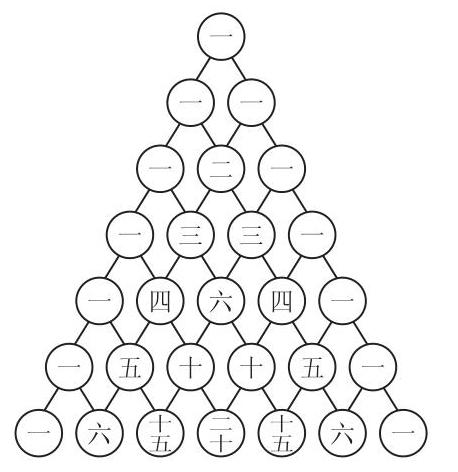

图 1-10
二项式定理与杨辉三角是一对天然的数形趣遇，你能通过图 1-9 的 "三角形" 数表发现一些规律吗?

其中蕴含着很多规律, 例如:
（1）与首末两端 "等距离" 的两个二项式系数相等，即

$$
\mathrm{C}_{n}^{m}=\mathrm{C}_{n}^{0 \cdots \infty}\left(m \leqslant n, m, n \in \mathbf{N}^{+}\right)
$$

（2）当 $r$ 依次从 0 取到 $n$ 时，二项式系数 $\mathrm{C}_{n}^{r}$ 先递增，后递减。

当 $n$ 为偶数时，中间一项的二项式系数 $\mathrm{C}_{n}^{\frac{r}{2}}$ 最大；
当 $n$ 为奇数时，中间两项的二项式系数 $\mathrm{C}_{n}^{r_{n+1}^{r_{n+1}}}$ ， $\mathrm{C}_{n}^{r_{n+1}^{r_{n+1}}}$ 最大且相等.
(3) 第 $n+1$ 行的所有数字之和为

$$
\mathrm{C}_{n}^{0}+\mathrm{C}_{n}^{1}+\mathrm{C}_{n}^{2}+\cdots+\mathrm{C}_{n}^{n}=2^{n}
$$

奇数项的二项式系数的和等于偶数项的二项式系数的和,即

$$
\mathrm{C}_{n}^{0}+\mathrm{C}_{n}^{2}+\cdots=\mathrm{C}_{n}^{1}+\mathrm{C}_{n}^{1}+\cdots=2^{n-1}
$$

事实上，因为 $(1+x)^{n}=\mathrm{C}_{n}^{0}+\mathrm{C}_{n}^{1} x+\mathrm{C}_{n}^{2} x^{2}+\cdots+\mathrm{C}_{n}^{n} x^{n}$ 对任意 $x$ 均成立，

令 $x=1$, 得 $(1+1)^{n}=\mathrm{C}_{n}^{0}+\mathrm{C}_{n}^{1}+\mathrm{C}_{n}^{2}+\cdots+\mathrm{C}_{n}^{n}$, 即

$$
\mathrm{C}_{n}^{0}+\mathrm{C}_{n}^{1}+\mathrm{C}_{n}^{2}+\cdots+\mathrm{C}_{n}^{n}=2^{n}
$$

令 $x=-1$, 得 $(1-1)^{n}=\mathrm{C}_{n}^{0}-\mathrm{C}_{n}^{1}+\mathrm{C}_{n}^{2}-\mathrm{C}_{n}^{1}+\cdots+(-1)^{n} \mathrm{C}_{n}^{n}$, 即

$$
0=\left(\mathrm{C}_{n}^{0}+\mathrm{C}_{n}^{2}+\cdots\right)-\left(\mathrm{C}_{n}^{1}+\mathrm{C}_{n}^{2}+\cdots\right)
$$

所以

$$
\mathrm{C}_{n}^{0}+\mathrm{C}_{n}^{2}+\cdots=\mathrm{C}_{n}^{1}+\mathrm{C}_{n}^{1}+\cdots=2^{n-1}
$$

# huxue 

（4）相邻的两行中，除 1 以外的每个数都等于它"肩上"两个数的和。

事实上，设表格中任意不为 1 的数为 $\mathrm{C}_{n+1}^{\infty}$ ，那么它 "肩上"两个数为 $\mathrm{C}_{n}^{\infty-1}$ 和 $\mathrm{C}_{n}^{\infty}$ ，容易证明：

$$
\mathrm{C}_{n+1}^{\infty}=\mathrm{C}_{n}^{\infty-1}+\mathrm{C}_{n}^{\infty}
$$

## 练习

1. (1) 求值: $\mathrm{C}_{10 n}^{2 n}=$ $\qquad$ ;
（2） $(a+b)^{1 n}$ 的展开式中二项式系数最大的项是第 $\qquad$项： $(a+b)^{7}$ 的展开式中二项式系数的最大值是 $\qquad$ ，
（3）求值： $\mathrm{C}_{[1}^{1}+\mathrm{C}_{[1}^{1}+\cdots+\mathrm{C}]]=$ $\qquad$ .
2. 求证: $2^{n}-\mathrm{C}_{n}^{1} \cdot 2^{n-1}+\mathrm{C}_{n}^{2} \cdot 2^{n-2}+\cdots+(-1)^{n-1} \mathrm{C}_{n}^{n-1} \cdot 2+(-1)^{n}=1$ 。
3. 含有 $n$ 个元素的集合 $A$ 有多少个单元素子集？双元素子集呢？三元素子集呢？ $n$ 元素子集呢？集合 $A$ 共有多少个子集？

## 习题 1.4

1. 化简: $(\sqrt{x}+1)^{3}+(\sqrt{x}-1)^{5}$.
2. 求 $\left(\sqrt[3]{\frac{a}{b^{3}}}+\sqrt[7]{\frac{h}{\sqrt{a}}}\right)^{1}$ 的展开式中 $a, b$ 的幂指数相等的项.
3. 求 $\left(2 x^{2}+\frac{1}{x}\right)^{9}$ 的展开式中第 3 项的二项式系数和第 4 项的系数.
4. 判断 $\left(3 x^{2}+\frac{1}{\sqrt{x}}\right)^{10}$ 的展开式中有无常数项. 若有, 求出常数项; 若没有, 说明理由.
5. 若 $\left(2 x+\sqrt{3}\right)^{3}=a_{0}+a_{1} x+a_{2} x^{2}+a_{3} x^{3}$, 求 $\left(a_{0}+a_{2}\right)^{2}-\left(a_{1}+a_{3}\right)^{2}$ 的值.
6. (1) 在 $(1+x)^{n}$ 的展开式中, 若第 3 项与第 6 项的系数相等, 求 $n$ 的值;
(2) $\left(x \sqrt{x}+\frac{1}{\sqrt[3]{x}}\right)^{3}$ 的展开式中奇数项的二项式系数之和为 128 , 求展开式中二项式系数最大的项.
7. 用二项式定理证明:
(1) $(n+1)^{n}-1$ 能被 $n^{2}$ 整除 $\left(n \in \mathbf{N}^{+}\right)$;
(2) $3^{2 n+2}-8 n-9$ 能被 64 整除 $(n \in \mathbf{N})$.
8. 在二项式 $(x-1)^{11}$ 的展开式中, 求系数最小的项.

# 从航天飞机发动机的设计与测试谈起 

1986年1月28日，美国"挑战者"号航天飞机一升空就爆炸了。调查表明，事故的直接原因是一个"O"形坏在那天上午的寒冷条件下失去了必要的功能。但是航天科学家们为什么在发射前没有检测出这个隐患呢？这还得从航天飞机发动机的设计与测试过程说起。

设计航天飞机发动机通常采用一种叫"合成式"的方式，也可以称为从下向上的设计方式。其过程是：首先必须详细了解所使用材料的性能和它的局限性，在实验样机上测试以确定这些材料的性能和局限性，并将确定了的性能和局限性记录在案；然后将这些材料组成一个个较大的部件，再通过测试；最后综合产生整个发动机的最终设计方案。

这种从下向上的测试发动机的方法在测试程序模块时经常被用到。如图1，事先我们对 5 个子模块中的每一个模块都单独进行测试，由于测试时每一条可执行路径均要运行一个数据，所以测试这些子模块需要运行 $17+43+29+37+41=167$个数据。然后我们将每个子模块看作一个"黑箱"，它里面的可执行路径是看不见的，所以我们可以通过只考察是否执行了正确的子模块这样一种方式来测试整个模块。在这个层面上，整个模块只有 $3 \times 2=6$ 种可执行路径，从而只需要运行 6 个数据。这样，为测试整个模块需要运行的数据个数为 $167+6=$ 173. 这种测试程序的方法称为"黑箱法".
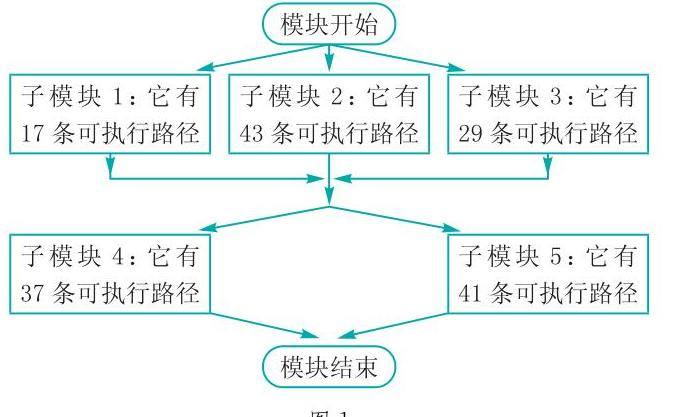

图 1

# huzue 

航天发动机的"合成式"设计与测试过程完全类似于程序测试中的"黑箱法"。这样，当航天飞机出现故障时便能很快地检测出故障的原因。

但是"挑战者"号航天飞机的主发动机却采用了一种完全不同的设计与检测方式，我们称这种方式为从上到下的方式。科研人员对该发动机只做了相对较少的材料和各部件的初步研究就将其设计出来。这样，如果航天飞机发生故障，就必须对从开始到结束的每一个路径逐一检测，从而寻找出发生故障的原因。
"挑战者"号航天飞机发动机的这种从上到下的测试方式就像我们把一个程序看成"玻璃箱"时的测试，这时我们可以看到整个结构。例如，要测试图1中整个程序必须运行

$$
(17+43+29) \times(37+41)=6942
$$

个数据，其检测难度比用"黑箱法"（只需运行 173 个数据）要大得多，时间也要花得多得多。

所以，"挑战者"号航天飞机主发动机的这种从上到下的设计方式存在一个最大缺点，就是一旦发生故障，很难在短时间内找到故障原因并实现简单的修补。事实上，"挑战者"号爆炸之后，寻找事故的原因并重新设计航天飞机发动机的过程使美国的航天计划大大推迟了。

## 讨论题

在图2所示的一个程序模块中，程序测试员要为每条可执行路径提供一个测试数据。若采用"黑箱法"测试，程序测试员要提供多少个测试数据？若采用"玻璃箱法"测试，程序测试员又要提供多少个测试数据？试比较"黑箱法"与"玻璃箱法"的优劣。
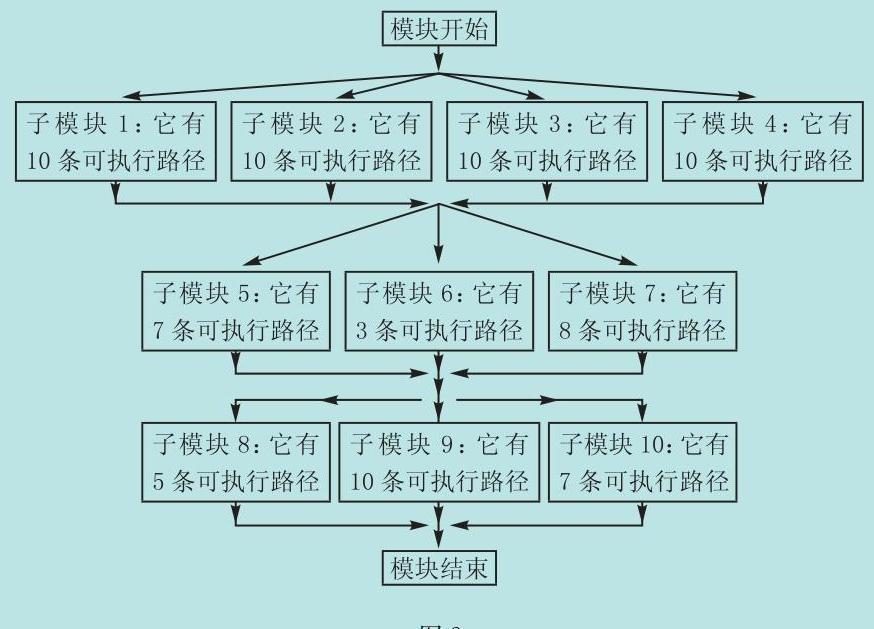

图2

# 绕习题 

## A 组

1. (1) $\left(a_{1}+a_{2}+a_{3}\right)\left(b_{1}+b_{2}\right)\left(c_{1}+c_{2}+c_{3}+c_{4}\right)$ 展开后有( ).
A. 9 项
B. 11 项
C. 12 项
D. 24 项
(2) 如果 $\frac{\mathrm{C} \mathrm{C}}{\mathrm{C} \mathrm{C}}=a$ ，那么 $\frac{\mathrm{A} \mathrm{C}}{\mathrm{A} \mathrm{C}}$ 等于（ ）。
A. $m!a$
B. $\frac{1}{a}$
C. $a$
D. $\frac{a}{m!}$
（3）把 4 个相同的球放人 5 个不同的盒子中，每个盒子至多放 1 个球，且球要放完，那么不同放法的种数为（ ）。
A. $5^{1}$
B. $4^{5}$
C. A!
D. C!
（4）5 名同学去竞选学生会的 4 个职位，每名同学可自由选择一个职位，则不同选择方法的种数为 ( ).
A. $5^{4}$
B. $4^{5}$
C. A!
D. C!
(5) 若 $\left(\sqrt[3]{x^{2}}+\frac{1}{x}\right)^{2}$ 的展开式中含 $x^{2}$ 的项为第 3 项，则正整数 $n=$ （ ）。
A. 9
B. 8
C. 7
D. 6
2. 某单位职工义务献血，在身体检查合格的人中，是 O 型血的共有 28 人，是 A 型血的共有 7 人，是 B 型血的共有 9 人，是 AB 型血的共有 3 人。
（1）从中任选 1 人去献血，有多少种不同的选法？
（2）从 4 种血型的人中各选 1 人去献血，有多少种不同的选法？
（3）这些人中有 2 人去献血，他们的血型不同的概率是多少？
3. 10 个人被邀请参加一个聚会，他们将全部出席，并且每个人都将单独到达。
（1）主人计划给第 1 个到达的客人一张音乐会门票，给第 2 个到达的客人一张 CD 唱片，给第 3 个到达的客人一张精美卡片。不同的分发结果有多少种？
（2）主人买了 3 张相同的音乐会门票，准备给前 3 个到达的客人每人 1 张。不同的分发结果有多少种?
4. (1) 用 $0,1,2,3,4$ 这 5 个数字可以组成多少个无重复数字的四位数?
（2）用 $0,1,2,3,4$ 这 5 个数字可以组成多少个无重复数字的自然数？
5. 如图，小明从街道的 $E$ 处出发，先到 $F$ 处与小红会合，再一起到位于 $G$ 处的老年公寓参加志愿者活动，则小明到老年公寓可以选择的最短路径有多少条？
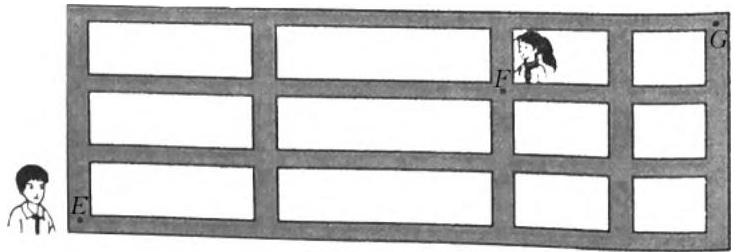
(第5题图)

6. $A, B, C, D, E$ 这 5 人排成一排, 如果 $A, B$ 必须相邻, 且 $B$ 在 $A$ 的右边, 那么不同的排法共有多少种?
7. (1) 平面内有 $n$ 条直线, 其中没有两条直线互相平行, 也没有三条直线相交于一点, 一共有多少个交点?
(2) 空间中有 $n$ 个平面, 其中没有两个平面互相平行, 也没有三个平面相交于一条直线, 一共有多少条交线?
8. 若 $6 \mathrm{C}_{n+1}^{n}=35 \mathrm{~A}_{n}^{n}$, 求 $n$ 的值.
9. 已知 $\left(\sqrt{x}+\frac{1}{\sqrt[3]{x}}\right)^{n}$ 的展开式的二项式系数之和比 $(a+b)^{2 n}$ 的展开式的二项式系数之和小 240 , 求:
(1) $\left(\sqrt{x}+\frac{1}{\sqrt[3]{x}}\right)^{n}$ 的展开式中的第 3 项;
(2) $(a+b)^{2 n}$ 的展开式中的中间项.

# B 组 

1. (1) 有 10 间客房可供 3 名旅客选择住宿, 每间客房最多可住 3 人, 那么旅客选择的住宿方法有
$\qquad$种;
(2) 用 10 元、 5 元和 1 元面额的人民币来支付 20 元货款, 每种面额的人民币张数不限, 则不同的支付方法有 $\qquad$种;
(3) 下列等式不是恒等式的是 $\qquad$ (填序号):

$$
\begin{array}{ll}
(1) \mathrm{C}_{n}^{m}=\mathrm{C}_{n}^{n-m}(m \leqslant n) ; & (2) \mathrm{C}_{n}^{m}=\frac{\mathrm{A}_{n}^{m}}{m!}(m \leqslant n) ; \\
(3)(n+2)(n+1) \mathrm{A}_{n}^{m}=\mathrm{A}_{n}^{m} \sqrt{n}(m \leqslant n) ; & (4) \mathrm{C}_{n}^{n}=\mathrm{C}_{n-1}^{n}+\mathrm{C}_{n-1}^{n}(1 \leqslant r<n) .
\end{array}
$$

(4) $\mathrm{C}_{n}^{n}+\mathrm{C}_{n+1}^{n}+\mathrm{C}_{n+2}^{n}+\cdots+\mathrm{C}_{n-1}^{n}=\ldots \quad(r<n)$;
(5) 在 $(1-3 x)^{n}$ 的展开式中, 各项系数的和是 $\qquad$ .
2. 加工某产品需要经过 5 道工序.
(1) 如果其中某一工序不能放在最后, 有多少种不同的加工顺序?
(2) 如果其中某两道工序既不能放在最前, 也不能放在最后, 有多少种不同的加工顺序?
3. 用数字 $0,1,2,3,4,5$ 组成没有重复数字的自然数.
(1) 能够组成多少个六位奇数?
(2) 能够组成多少个大于 201345 的正整数?
4. 平面内有两组平行线, 一组有 $m$ 条, 另一组有 $n$ 条, 这两组平行线相交, 可以构成多少个平行四边形?
5. 把 4 个编号不同、大小相同的小球随机放进编号为 $1,2,3,4$ 的 4 个盒子中, 求恰好有一个空盒的概率。
6. 从 7 名男乒乓球运动员、 5 名女乒乓球运动员中选出 4 人进行男女混合双打比赛, 不同的分组方法有多少种?
7. 求 $\left(1-x^{2}\right)(1+x)^{10}$ 的展开式中 $x^{2}$ 的系数.
8. 已知 $\left(2 \sqrt{a}+\frac{1}{\sqrt[3]{a^{2}}}\right)^{n}$ 的展开式中的第 5 项的二项式系数与第 3 项的二项式系数之比为 $7+2$, 求:
(1) $n$ 的值;
(2) 含 $a$ 的一次项;
(3) 二项式系数最大的项.
9. 化简: $\mathrm{C}_{n}^{1}+2 \mathrm{C}_{n}^{2}+3 \mathrm{C}_{n}^{3}+\cdots+n \mathrm{C}_{n}^{n}$. (提示: $k \mathrm{C}_{n}^{0}=n \mathrm{C}_{n-1}^{n}$.)

# 思考与实践 

1. 请用本章所学的知识, 解决章头所提出的问题.
2. DNA(脱氧核糖核酸)是生物体中的一种双螺旋结构分子, 如图所示. DNA 看上去就像是两条长长的平行螺旋状链, 两条链上的碱基之间由氢键相连接. 在 DNA 中只有 4 种类型的碱基, 分别用 A, C, G, T 表示, 这四种碱基能够以任意的顺序出现在其中一条链上, 而两条链之间相连接的碱基遵循碱基互补配对原则 (即 $\mathrm{A}-\mathrm{T}$ 或者是 $\mathrm{C}-\mathrm{G}$ ). 因此, 如果我们知道了两条链中一条链上碱基的顺序, 那么我们也就知道了另一条链上碱基的顺序. 由氢键连接着的两个碱基称为一个碱基对.试讨论以下问题:
(1) 某细菌基因是一段有着 1500 个碱基对的 DNA, 计算该细菌基因可能出现的种类. 如果病毒 DNA 有类似的长度, 那么这对未来的病毒型疾病的预防意味着什么?
(2) 某哺乳动物基因是一段有着 2000 个碱基对的 DNA, 计算该哺乳动物基因可能出现的种类;
(3) 比较 (1) 中细菌基因的长度与 (2) 中哺乳动物基因的长度, 我们发现哺乳动物基因的长度是细菌基因长度的 $\frac{4}{3}$ 倍, 哺乳动物基因可能出现的种类与细菌基因可能出现的种类的比又是多少呢?
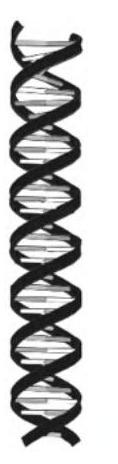
(第 2 题图)
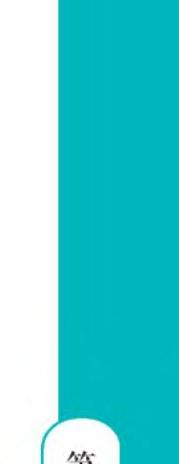

# 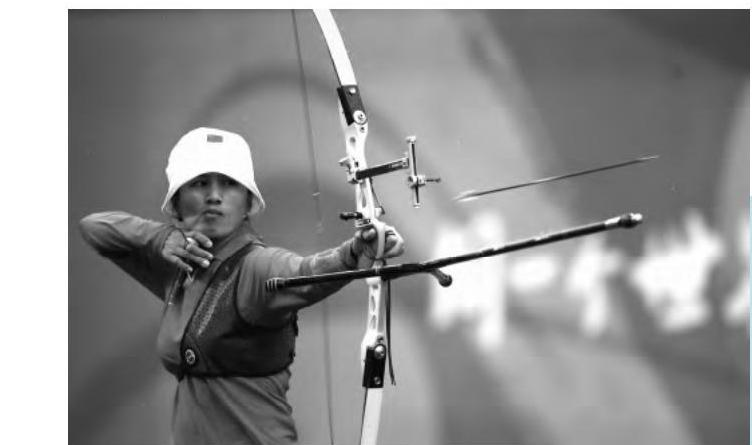 

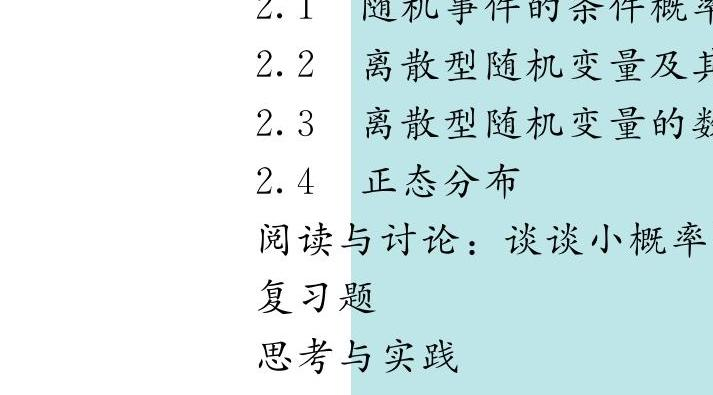

思考与实践

我们已经学习过一些简单的概率模型, 在日常生活和生产实践中, 还存在着大量相对复杂的与概率有关的问题。

例如, 在射击运动中, 运动员每次射击的成绩具有随机性, 如何刻画每个运动员射击的技术水平与特点? 如何比较两个运动员的射击水平的优劣? 如何选择优秀运动员参加比赛才能使得获胜的概率更大?

又如, 根据气象预报, 明天下大雨的概率为 0.25 , 下暴雨的概率为 0.03 . 工地上有一台大型设备, 遇到暴雨时要损失 120000 元, 遇到大雨时要损失 20000元. 为保护设备, 有以下三种方案: (A) 运走设备, 需花费 12000 元; (B) 建一临时保护设施, 需花费 4000 元, 但这一设施只能防止大雨; (C) 不采取措施. 选择哪一种方案较好呢?

在本章, 我们将学习随机事件的条件概率、离散型随机变量的分布列及数字特征、正态分布等知识, 这些内容的学习有助于上述问题的解决。

# 3.1 

## 随机事件的条件概率

## 3.1 条件概率及乘法公式

我们先看一个具体例子。

某班有学生 40 人，其中男生 15 人。将全班学生分成 4 个小组，第一组有 10 人，其中男生 4 人。现从该班任选一人参加消防知识竞赛。
（1）求选出的学生来自第一组的概率；
（2）已知选出的学生是男生，求他来自第一组的概率。
我们记 "选出的学生来自第一组" 为事件 $A$ ，"选出的学生是男生" 为事件 $B$ ，"选出的学生是男生，他来自第一组"为事件 $C$ 。
（1）由题意， $P(A)=\frac{10}{40}=\frac{1}{4}$ 。
（2）要求的是在事件 $B$ 发生的条件下，事件 $A$ 发生的概率 $P(C)$ 。不难理解，在事件 $B$ 发生的条件下（即以所选出的学生是男生为前提），有 15 种不同的选择，其中属于第一组的有 4 种选择。因此， $P(C)=\frac{4}{15}$ 。

我们还可得到

$$
P(B)=\frac{15}{40}, P(A B)=\frac{4}{40}
$$

不难发现如下关系：

$$
P(C)=\frac{4}{15}=\frac{\frac{4}{40}}{\frac{15}{40}}=\frac{P(A B)}{P(B)}
$$

在上述例子中，问题（2）考虑的是在某一事件 $B$ （选出的是男生）已经发生的条件下，另一事件 $A$ （该男生是第一组学生）

发生的概率. 我们称在事件 $B$ 发生的条件下, 事件 $A$ 发生的概率为条件概率 (conditional probability), 记为 $P(A \mid B)$, 读作 "在事件 $B$ 发生的条件下, 事件 $A$ 发生的条件概率". 相应地, 把 $P(A)$ 称为无条件概率.

对古典概型, 设样本空间 $\Omega$ 含 $n$ 个样本点, 事件 $B$ 含 $m$ 个样本点, 事件 $A \cap B$ 含 $r$ 个公共样本点, 则容易理解

$$
P(A \mid B)=\frac{r}{m}=\frac{\frac{r}{n}}{\frac{m}{n}}=\frac{P(A B)}{P(B)}
$$

一般地, 设 $P(B)>0$, 在事件 $B$ 发生的条件下, 事件 $A$发生的条件概率 $P(A \mid B)$ 为

$$
P(A \mid B)=\frac{P(A B)}{P(B)}
$$

人们有时用条件概率来判断两个事件之间是否有密切联系。在本例中, $P(A \mid B)$ $=\frac{8}{9}>\frac{11}{30}=P(A)$.这表明事件 $B$ 的发生显著改变了事件 $A$ 发生的概率大小, 由此可以认为到东风与下雨之间有密切的联系。

## 4

根据历年气象统计资料, 某地四月份刮东风的概

率为 $\frac{9}{30}$, 下雨的概率为 $\frac{11}{30}$, 既刮东风又下雨的概率为 $\frac{8}{30}$. 求该地四月份在刮东风的条件下下雨的概率.

解 记"该地四月份下雨"为事件 $A$ ，"该地四月份刮东风"为事件 $B$, 则

$$
P(A)=\frac{11}{30}, P(B)=\frac{9}{30}, P(A B)=\frac{8}{30}
$$

从而该地四月份在刮东风的条件下下雨的概率为

$$
P(A \mid B)=\frac{P(A B)}{P(B)}=\frac{\frac{8}{30}}{\frac{9}{30}}=\frac{8}{9}
$$

公式 $P(A \mid B)=\frac{P(A B)}{P(B)}$ 给出了运用无条件概率计算条件概率的方法, 但在实际问题中这样计算有时很麻烦. 这时, 我们往往在事件 $B$ 发生的新环境中直接来计算事件 $A$发生的概率。

2 某公司为了评价某种产品销售的广告效应，随机调查了 1000 名消费者，调查得到数据如下：

| 入数 | 是否购买 | 购买 | 未购买 |
| :--: | :--: | :--: | :--: |
| 是否知道广告 |  |  |  |
| 知道广告 |  | 200 | 400 |
| 不知道广告 |  | 50 | 350 |

试问：广告对产品的销售是否有促进作用?
解 记 "购买该产品" 为事件 $A$ ，"知道广告" 为事件 B. 根据调查数据, 由频率估计概率, 可得如下条件概率的估计：

$$
P(A \mid B)=\frac{200}{600}=\frac{1}{3}, P(A \mid \bar{B})=\frac{50}{400}=\frac{1}{8}
$$

因为 $\frac{1}{3}>\frac{1}{8}$, 所以可初步认为广告宣传促进了产品的销售。

若 $P(B)>0$, 则由条件概率 $P(A \mid B)$ 的计算公式, 有

$$
P(A B)=P(B) P(A \mid B)
$$

同样, 若 $P(A)>0$, 则

$$
P(A B)=P(A) P(B \mid A)
$$

上面的公式(1)、(2)称为概率的乘法公式.

3 设袋子中有 $b$ 个黑球和 $r$ 个红球, 每次从袋子中取一个球, 取出后放回, 并放入 $c$ 个与所取出的球颜色相同的球. 求:
(1) 前两次都取到黑球的概率;
(2) 前三次取球时, 依次取到黑球、红球、黑球的概率.

解 记"第 $i$ 次 $(i=1,2,3)$ 取球时取到黑球"为事件 $A$.,

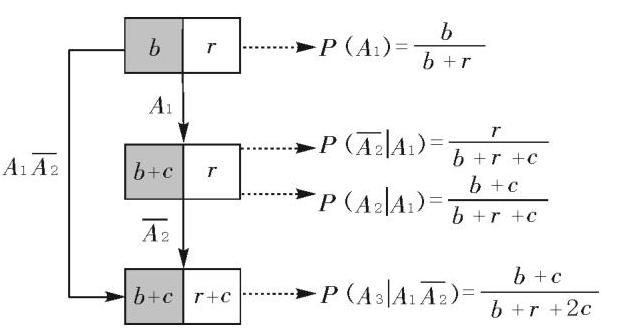

图 2-1
（1）因为 $P\left(A_{1}\right)=\frac{b}{b+r}, P\left(A_{2} \mid A_{1}\right)=\frac{b+c}{b+r+c}$,
由乘法公式，得

$$
P\left(A_{1} A_{2}\right)=P\left(A_{1}\right) P\left(A_{2} \mid A_{1}\right)=\frac{b}{b+r} \cdot \frac{b+c}{b+r+c}
$$

（2）两次运用乘法公式，得

$$
\begin{aligned}
& P\left(A_{1} \overline{A_{2}} A_{3}\right) \\
= & P\left(A_{1} \overline{A_{2}}\right) P\left(A_{3} \mid A_{1} \overline{A_{2}}\right) \\
= & P\left(A_{1}\right) \cdot P\left(\overline{A_{2}} \mid A_{1}\right) \cdot P\left(A_{3} \mid A_{1} \overline{A_{2}}\right) \\
= & \frac{b}{b+r} \cdot \frac{r}{b+r+c} \cdot \frac{b+c}{b+r+2 c}
\end{aligned}
$$

对于这类与多次取球有关的复杂事件的概率计算，可以先分解成仅与各次取球有关的事件的概率，然后利用乘法公式进行计算。

# 练习 

1. 某地区空气质量监测资料表明，一天的空气质量为优良的概率是 0.75 ，连续两天的空气质量均为优良的概率是 0.6 ，已知某天的空气质量为优良，求随后一天的空气质量为优良的概率。
2. 小赵、小钱、小孙、小李到 4 个景点旅游，每人只去一个景点，记 " 4 个人去的景点不相同" 为事件 $A$ ，"小赵独自去一个景点" 为事件 $B$ ，求 $P(A \mid B)$ 。
3. 在 100 件产品中有 10 件不合格品和 90 件合格品，采用不放回方式逐件抽取产品.求:
（1）在第一次抽取时抽到一件不合格品的条件下，第二次抽取时仍抽到一件不合格品的概率;
（2）在第一次抽取时抽到一件不合格品，第二次抽取时抽到一件合格品的条件下，第三次抽取时抽到一件合格品的概率;
（3）前两次抽取时都抽到不合格品的概率；
（4）前三次抽取时，依次抽到不合格品、合格品、不合格品的概率。

# 1.12 

## 随着素件的独立性

在事件 $B$ 发生的条件下, 事件 $A$ 发生的条件概率与事件 A 发生的无条件概率之间有什么关系呢? 显然, 他们只能具有下列关系之一:
(1) $P(A \mid B) \neq P(A)$, 这表明事件 $B$ 的发生对事件 $A$ 发生的概率有影响;
(2) $P(A \mid B)=P(A)$, 这表明事件 $B$ 的发生对事件 $A$ 发生的概率没有影响, 这时 $P(A B)=P(A) P(B)$.

由此, 我们可以更进一步理解必修课程第四册第 1 章中所讲的内容——随机事件的独立性.

解 设袋中有 2 个白球, 3 个黑球. 每次从袋中任取一个球, 采用放回与不放回两种方式取球. 求;
(1) 第一次、第二次分别取到白球的概率;
(2) 前两次取球时都取到白球的概率, 并判断第一次取到白球与第二次取到白球的事件是否相互独立.

解 记 "第 $i$ 次 $(i=1,2)$ 取球时取到白球" 为事件 $A_{i}$.
(1) 因为 $P\left(A_{1}\right)=\frac{2}{5}, P\left(\bar{A}_{1}\right)=\frac{3}{5}$, 且 $A_{2}=\left(A_{1} A_{2}\right) \cup\left(\bar{A}_{1} A_{2}\right)$,而 $A_{1} A_{2}$ 与 $\bar{A}_{1} A_{2}$ 互斥, 所以

$$
\begin{aligned}
& P\left(A_{2}\right)=P\left(A_{1} A_{2}\right)+P\left(\bar{A}_{1} A_{2}\right) \\
= & P\left(A_{1}\right) P\left(A_{2} \mid A_{1}\right)+P\left(\bar{A}_{1}\right) P\left(A_{2} \mid \bar{A}_{1}\right)
\end{aligned}
$$

在放回取球的情况下, $P\left(A_{2} \mid A_{1}\right)=\frac{2}{5}, P\left(A_{2} \mid \bar{A}_{1}\right)=\frac{2}{5}$, 所以

$$
P\left(A_{2}\right)=\frac{2}{5} \times \frac{2}{5}+\frac{3}{5} \times \frac{2}{5}=\frac{2}{5}
$$

在不放回取球的情况下, $P\left(A_{2} \mid A_{1}\right)=\frac{1}{4}, P\left(A_{2} \mid \bar{A}_{1}\right)=\frac{2}{4}$,所以

$$
P\left(A_{2}\right)=\frac{2}{5} \times \frac{1}{4}+\frac{3}{5} \times \frac{2}{4}=\frac{2}{5}
$$

（2）在放回取球的情况下,

$$
P\left(A_{1} A_{2}\right)=P\left(A_{1}\right) P\left(A_{2} \mid A_{1}\right)=\frac{2}{5} \times \frac{2}{5}=P\left(A_{1}\right) P\left(A_{2}\right)
$$

即 $A_{1}, A_{2}$ 相互独立.
在不放回取球的情况下，

$$
P\left(A_{1} A_{2}\right)=P\left(A_{1}\right) P\left(A_{2} \mid A_{1}\right)=\frac{2}{5} \times \frac{1}{4} \neq P\left(A_{1}\right) P\left(A_{2}\right)
$$

即 $A_{1}, A_{2}$ 不相互独立.

例1的结论很容易从直观上得到解释。若是放回取球，则第一次不论取到什么球，不改变下次取球时袋中两种球的数量的结构，因此不改变下次取到白球（黑球）的概率。如 $P\left(A_{2} \mid A_{1}\right)=\frac{2}{5}, P\left(A_{2} \mid \bar{A}_{1}\right)=\frac{2}{5}$. 若是不放回取球, 则第一次取出白球（黑球）后，下次取球时袋中两种球的数量的结构发生了改变，因此会改变下次取到白球（黑球）的概率。如 $P\left(A_{2} \mid A_{1}\right)=\frac{1}{4}, P\left(A_{2} \mid \bar{A}_{1}\right)=\frac{2}{4}$.

这样我们可以给事件的独立性一个直观的解释。设 $A, B$为两个事件，若其中任意一个事件发生与否不改变另一个事件发生的概率，则这两个事件 $A, B$ 相互独立。

若 $A, B$ 相互独立, 则

$$
\begin{aligned}
& P(A B)=P(A) P(B) \\
& P(\bar{A} B)=P(\bar{A}) P(B) \\
& P(A \bar{B})=P(A) P(\bar{B}) \\
& P(\bar{A} \bar{B})=P(\bar{A}) P(\bar{B}) \\
& P(A \cup B)=1-P(\bar{A}) P(\bar{B})
\end{aligned}
$$

若 $A, B, C$ 相互独立, 则

$$
\begin{aligned}
& P(A B C) \\
& =P(A) P(B) P(C) \\
& P(A \cup B \cup C) \\
& =1-P \bar{A}) P(\bar{B}) P(\bar{C})
\end{aligned}
$$

解2在一段线路中并联着三个自动控制的常用开关，只要其中一个开关能够闭合，线路就能正常工作。假定在某段时间内每个开关能够闭合的概率都是 0.7 ，且每个开关是否闭合相互独立. 计算在这段时间内线路正常工作的概率.

解 如图 2-2 所示，分别记这段时间内开关 $J_{A}, J_{B}, J_{C}$

# huzue 

不能闭合为事件 $A, B, C$, 则

$$
P(A)=P(B)=P(C)=1-0.7=0.3
$$

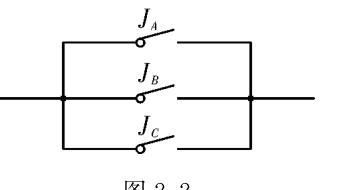

图 2-2
由题意, 这段时间内三个开关是否能够闭合相互之间没有影响, 根据相互独立事件的概率乘法公式, 这段时间内三个开关都不能闭合的概率是

$$
\begin{aligned}
P(A B C) & =P(A) P(B) P(C) \\
& =0.3 \times 0.3 \times 0.3 \\
& =0.027
\end{aligned}
$$

于是, 在这段时间内线路能正常工作的概率是

$$
\begin{aligned}
P(\bar{A} \cup \bar{B} \cup \bar{C}) & =1-P(A) P(B) P(C) \\
& =1-0.027 \\
& =0.973
\end{aligned}
$$

## 练习

1. 两个工人每人加工一个零件, 加工为一等品的概率分别为 $\frac{2}{3}$ 和 $\frac{3}{4}$, 两个零件是否加工为一等品相互独立. 求这两个零件中恰有一个一等品的概率.
2. 一个工人照看两台独立工作的机床, 在 1 小时内这两台机床不需要工人照看的概率分别为 $0.9,0.8$.
(1) 求在 1 小时内, 两台机床都不需要照看的概率;
(2) 求在 1 小时内, 至少有一台机床不需要照看的概率.

### 2.3 全相率公式, 可计算公式

设 $A, B$ 是两个事件, 则 $A$ 可以表示为 $A=(B A) \cup(\bar{B} A)$,显然, $(B A) \cap(\bar{B} A)=\varnothing$, 如果 $P(B)>0, P(\bar{B})>0$, 那么

$$
\begin{aligned}
& P(A)=P(B A)+P(\bar{B} A) \\
= & P(B) P(A \mid B)+P(\bar{B}) P(A \mid \bar{B})
\end{aligned}
$$

1 号箱中有 2 个白球和 4 个红球， 2 号箱中有 5 个白球和 3 个红球，现从 1 号箱中随机取出一个球放入 2 号箱中，然后从 2 号箱中随机取出一个球，问从 2 号箱中取出红球的概率是多少?

解 记"从 2 号箱中取出的是红球"为事件 $A$ ，"从 1 号箱中取出的是红球"为事件 $B$. 则

$$
\begin{aligned}
& P(B)=\frac{4}{2+4}=\frac{2}{3}, P(\bar{B})=1-P(B)=\frac{1}{3} \\
& P(A \mid B)=\frac{3+1}{8+1}=\frac{4}{9}, P(A \mid \bar{B})=\frac{3}{8+1}=\frac{1}{3}
\end{aligned}
$$

由上面的公式，得

$$
\begin{aligned}
& P(A)=P(B A)+P(\bar{B} A) \\
= & P(B) P(A \mid B)+P(\bar{B}) P(A \mid \bar{B}) \\
= & \frac{2}{3} \times \frac{4}{9}+\frac{1}{3} \times \frac{1}{3} \\
= & \frac{11}{27}
\end{aligned}
$$

设 $\Omega$ 为试验 $E$ 的样本空间， $B_{1}, B_{2}, \cdots, B_{n}$ 为 $E$ 的一组事件. 若
(1) $B_{i} B_{j}=\varnothing, i \neq j$ 且 $i, j=1,2, \cdots, n$;
(2) $B_{1} \cup B_{2} \cup \cdots \cup B_{n}=\Omega$ ，则称 $B_{1}, B_{2}, \cdots, B_{n}$ 为样本空间 $\Omega$ 的一个分割。

若 $B_{1}, B_{2}, \cdots, B_{n}$ 为样本空间 $\Omega$ 的一个分割，则对每一次试验，事件 $B_{1}, B_{2}, \cdots, B_{n}$ 必有一个且仅有一个发生。

例如，设试验 $E$ 为 "投掷一枚骰子观察其点数"，它的样本空间 $\Omega=\{1,2,3,4,5,6\}, \Omega$ 的一组事件 $B_{1}=\{1,2\}$ ， $B_{2}=\{3,4\}, B_{3}=\{5,6\}$ 是样本空间 $\Omega$ 的一个分割。而事件组 $B_{1}=\{1,2,3\}, B_{2}=\{3,4\}, B_{3}=\{5,6\}$ 不是样本空间 $\Omega$的一个分割，因为 $B_{1} B_{2}=\{3\} \neq \varnothing$ 。

又如，甲、乙、丙三人向同一目标射击，设样本空间 $\Omega=$ （无人命中目标，一人命中目标，二人命中目标，全命中目标）， $\Omega$ 的一组事件 $B_{1}=\{$ 三人以下命中目标 $\}, B_{2}=\{$ 全命中

目标 $\mid$ 是样本空间 $\Omega$ 的一个分割。
设 $\Omega$ 为试验 $E$ 的样本空间， $A$ 为 $E$ 的事件， $B_{1}, B_{2}, \cdots$, $B_{n}$ 为 $\Omega$ 的一个分割，且 $P\left(B_{i}\right)>0(i=1,2, \cdots, n)$ ，则

$$
P(A)=\sum_{i=1}^{n} P\left(B_{i}\right) P\left(A \mid B_{i}\right) \quad(i=1,2, \cdots, n)
$$

上式称为全概率公式.

2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

在例 2 中，求由这批种子所结出的含有 50 颗以上麦粒的麦穗中分别由一等、二等种子长出的概率.

解 由例 2 ，得 $P(A)=0.4825$ 。

$$
\begin{aligned}
P\left(B_{1} \mid A\right) & =\frac{P\left(A B_{1}\right)}{P(A)}=\frac{P\left(B_{1}\right) P\left(A \mid B_{1}\right)}{P(A)} \\
& =\frac{0.955 \times 0.5}{0.4825} \approx 0.9896 \\
P\left(B_{2} \mid A\right) & =\frac{P\left(A B_{2}\right)}{P(A)}=\frac{P\left(B_{2}\right) P\left(A \mid B_{2}\right)}{P(A)} \\
& =\frac{0.02 \times 0.15}{0.4825} \approx 0.0062
\end{aligned}
$$

设 $\Omega$ 为试验 $E$ 的样本空间， $A$ 为 $E$ 的事件， $B_{1}, B_{2}, \cdots$ ， $B_{n}$ 为 $\Omega$ 的一个分割，且 $P\left(B_{i}\right)>0(i=1,2, \cdots, n)$ ，则

$$
P\left(B_{i} \mid A\right)=\frac{P\left(B_{i}\right) P\left(A \mid B_{i}\right)}{\sum_{i=1}^{n} P\left(B_{i}\right) P\left(A \mid B_{i}\right)}
$$

上式称为贝叶斯（Bayes）公式.
证明 由条件概率公式，得 $P\left(B_{i} \mid A\right)=\frac{P\left(A B_{i}\right)}{P(A)}$.
再由全概率公式，得

$$
P\left(B_{i} \mid A\right)=\frac{P\left(A B_{i}\right)}{P(A)}=\frac{P\left(B_{i}\right) P\left(A \mid B_{i}\right)}{\sum_{i=1}^{n} P\left(B_{i}\right) P\left(A \mid B_{i}\right)}
$$

某电子设备厂所用的元件由三家元件厂提供，根据以往的记录，这三个厂家的次品率分别为 $0.02,0.01$ ， 0.03 ，提供元件的份额分别为 $0.15,0.80,0.05$ 。设这三个厂家的产品在仓库里是均匀混合的，且无任何区分的标志，现从仓库中随机取出一个元件。
（1）求取到的元件是次品的概率；
（2）已知取到的元件是次品，试分析该次品最有可能出自哪个厂家?

解 记"取到的元件是次品"为事件 $A$ ，"取到的元件由

第 $i$ 个厂家生产 $(i=1,2,3)$ " 为事件 $B_{1}$, 则

$$
P\left(B_{1}\right)=0.15, P\left(B_{2}\right)=0.80, P\left(B_{3}\right)=0.05
$$

(1) 由全概率公式, 得

$$
\begin{aligned}
P(A) & =0.15 \times 0.02+0.80 \times 0.01+0.05 \times 0.03 \\
& =0.0125
\end{aligned}
$$

(2) 由贝叶斯公式, 得

$$
\begin{aligned}
& P\left(B_{1} \mid A\right)=\frac{P\left(B_{1}\right) P\left(A \mid B_{1}\right)}{P(A)}=\frac{0.15 \times 0.02}{0.0125}=0.24 \\
& P\left(B_{2} \mid A\right)=\frac{P\left(B_{2}\right) P\left(A \mid B_{2}\right)}{P(A)}=\frac{0.80 \times 0.01}{0.0125}=0.64 \\
& P\left(B_{3} \mid A\right)=\frac{P\left(B_{3}\right) P\left(A \mid B_{3}\right)}{P(A)}=\frac{0.05 \times 0.03}{0.0125}=0.12
\end{aligned}
$$

以上结果表明，该次品出自第 2 个厂家的可能性最大.

# 练习 

1. 一电器商城出售的某种家电产品来自甲、乙、丙三家工厂，这三家工厂的产品比例为 $1: 2: 1$ ，且它们的产品合格率分别为 $90 \%, 85 \%, 80 \%$ 。现从该种家电产品中随机抽取一件，求取到的产品是合格品的概率。
2. 某射击小组共有 20 名射手，其中一级射手 4 人，二级射手 8 人，三级射手 8 人，一级、二级、三级射手能通过选拔进入比赛的概率分别是 $0.9,0.7,0.4$ 。求任选一名射手能通过选拔进入比赛的概率。

## 习题 2.1

1. 从 $1,2,3,4,5$ 中任取 2 个不同的数, 记 "取到的 2 个数之和为偶数" 为事件 $A$, "取到的 2 个数均为偶数" 为事件 $B$, 求 $P(B \mid A)$.
2. 一批种子的发芽率为 0.9 , 发芽后的幼苗成活率为 0.8 . 从这批种子中随机抽取一粒, 求这粒种子成长为活苗的概率.
3. 某公司有 210 名职工, 对他们进行调查, 按是否会使用计算机进行文字处理和是否受过高等教育的情况分类，得到如下结果：

| 人数 | 受教育状况 |  |
| :--: | :--: | :--: |
| 技 能 | 受过高等教育 | 未受过高等教育 |
| 会用计算机 | 78 | 82 |
| 不会用计算机 | 7 | 43 |

从所有职工中任选一人.
（1）在他没有受过高等教育的条件下，求他会使用计算机进行文字处理的概率；
（2）在他会使用计算机进行文字处理的条件下，求他受过高等教育的概率。
4. 投掷一枚硬币和一枚骰子各一次，记"硬币正面朝上"为事件 $A$ ，"骰子朝上的点数是 3 " 为事件 $B$, 求事件 $A, B$ 中至少有一件发生的概率。
5. 某居民小区有两个相互独立的安全防范系统 $A$ 和 $B$, 系统 $A$ 和系统 $B$ 在任意时刻发生故障的概率分别为 $\frac{1}{8}$ 和 $p$. 若在任意时刻恰有一个系统不发生故障的概率为 $\frac{9}{40}$, 求 $p$.
6. 某班有学生 45 人，其中喜欢数学的有 25 人，喜欢语文的有 30 人，喜欢语文的学生中有 15 人喜欢数学。现从该班任选一名学生，记"选到喜欢数学的学生"为事件 $A$, "选到喜欢语文的学生" 为事件 $B$. 问：事件 $A, B$ 是否独立？
7. 如图, 用 $A, B, C$ 三类不同的元件连接成两个系统 $N_{1}, N_{2}$, 当元件 $A, B, C$都正常工作时, 系统 $N_{1}$ 正常工作; 当元件 $A$ 正常工作且元件 $B, C$ 中至少有一个正常工作时, 系统 $N_{2}$ 正常工作. 已知元件 $A, B, C$ 正常工作的概率依次为 $0.80,0.90,0.90$. 分别求系统 $N_{1}, N_{2}$ 正常工作的概率 $P_{1}, P_{2}$,
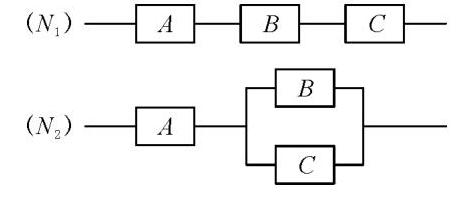
(第 7 题图)
8. 甲、乙、丙三台机床各自独立地加工同一种零件，已知甲机床加工的零件是一等品而乙机床加工的零件不是一等品的概率为 $\frac{1}{4}$, 乙机床加工的零件是一等品而丙机床加工的零件不是一等品的概率为 $\frac{1}{12}$, 甲、丙两台机床加工的零件都是一等品的概率为 $\frac{2}{9}$.
（1）分别求甲、乙、丙三台机床各自加工的零件是一等品的概率;
（2）从甲、乙、丙加工的零件中各取一个检验，求至少有一个一等品的概率。
9. 设某工厂有两个车间生产同型号家用电器, 第一车间的次品率为 0.15 , 第二车间的次品率为 0.12 , 两个车间生产的成品都混合堆放在一个仓库中。假设第一、二车间生产的成品数目比例为 $2: 3$, 现从成品仓库中随机取出一台产品, 求该产品合格的概率。
10. 盒中有 $a$ 个红球, $b$ 个黑球, 从中随机取出一个球, 观察其颜色后放回, 并放入同色球 $c$ 个, 再从盒中取出一个球, 求第二次取出的是黑球的概率.

# 离散型随机变量及其分布列 

对于随机现象，我们所关心的不仅是它在随机试验中可能出现的结果，更重要的是要知道出现这些结果的概率。为处理的方便，一种很自然的做法是将随机试验的各种可能结果分别用数来表示。例如，投掷一枚骰子，考察朝上的点数；用 100粒种子进行发芽试验，考虑发芽的种子数；等等。这些试验的可能结果都直接表现为数。又如，投掷一枚硬币，正面朝上可记为 " 1 "，反面朝上可记为 " 0 "；在气象预报中，晴天可记为 " 0 "，阴天可记为 " 1 "，雨天可记为 " 2 "。也就是说，有些结果虽不直接表现为数，但仍可用数表示。

像上述这种随着试验结果变化而变化的变量称为随机变量 (random variable), 随机变量常用字母 $X, Y, Z, \cdots$ 表示,它实质上是随机试验的可能结果与实数之间的一种对应关系，有了这种对应关系，对随机现象的研究就转化为对随机变量的取值及取值在某范围内的概率的讨论。

## 离散型随机变量

如上所述，若用 $X$ 表示 100 粒种子的发芽数，则 $X$ 的所有可能取值为 $0,1, \cdots, 100$ ；若用 $X$ 表示在投掷一枚硬币的一次试验中正面朝上的次数，则 $X$ 的所有可能取值为 0,1 。

一般地，若一个随机变量的所有可能取值仅为有限个，我们称这个随机变量为取有限个值的离散型随机变量（discrete random variable).

对于取有限个值的离散型随机变量所描述的随机现象，只要知道随机变量的所有可能的取值及取每个可能值的概率，就可以完全了解这个随机现象了。

设取有限个值的离散型随机变量 $X$ 的所有可能取值为 $x_{1}, x_{2}, \cdots, x_{n}$ ，用 $P\left(X=x_{i}\right)$ 表示 $X$ 取值为 $x_{i}$ 的概率。设

$P\left(X=x_{i}\right)=p_{i}(i=1,2, \cdots, n)$, 则称它为随机变量 $X$ 的概率分布. 下面的表格

| $X$ | $x_{1}$ | $x_{2}$ | $\cdots$ | $x_{n}$ |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | $p_{1}$ | $p_{2}$ | $\cdots$ | $p_{n}$ |

称为随机变量 $X$ 的分布列.
在随机变量的分布列中， $p_{i}$ 满足：
(1) $p_{i} \geqslant 0 \quad(i=1,2, \cdots, n)$;
(2) $\sum_{i=1}^{n} p_{i}=1$.

例如, 在投掷一枚均匀硬币的一次试验中, 用 $X$ 表示正面朝上的次数, 则 $X$ 的可能取值为 0 和 1 , 且 $P(X=0)=\frac{1}{2}$, $P(X=1)=\frac{1}{2}$, 其分布列为

| $X$ | 0 | 1 |
| :--: | :--: | :--: |
| $P$ | $\frac{1}{2}$ | $\frac{1}{2}$ |

(1) 设袋中有 7 个白球, 3 个黑球, 依次从袋中不放回地任取一球. 设第 $X$ 次取球时首次取到白球, 求 $X$ 的分布列.

解 显然 $X$ 是随机变量. 若前三次都没有取到白球, 到第四次取球时, 袋中所剩下的 7 个球全为白球, 此时必定取到白球, 因此 $X$ 的所有可能取值为 $1,2,3,4$, 且

$$
\begin{aligned}
& P(X=1)=\frac{7}{10} \\
& P(X=2)=\frac{3}{10} \times \frac{7}{9}=\frac{7}{30} \\
& P(X=3)=\frac{3 \times 2}{10 \times 9} \times \frac{7}{8}=\frac{7}{120} \\
& P(X=4)=\frac{3 \times 2 \times 1}{10 \times 9 \times 8} \times \frac{7}{7}=\frac{1}{120}
\end{aligned}
$$

$X$ 的分布列为

| $X$ | 1 | 2 | 3 | 4 |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | $\frac{7}{10}$ | $\frac{7}{30}$ | $\frac{7}{120}$ | $\frac{1}{120}$ |

# huue 

2 在 10000 张彩票中，有 1 张一等奖， 10 张二等奖， 100 张三等奖，其余的无奖。其中一、二、三等奖的中奖金额分别为 1000 元， 100 元， 10 元。从这 10000 张彩票中购买一张， $X$ 表示所得中奖金额。求：
(1) $X$ 的分布列;
（2）购买一张彩票获奖的概率。
解 （1） $X$ 的可能取值为 $1000,100,10,0$ ，且

$$
\begin{aligned}
& P(X=1000)=\frac{1}{10000} \\
& P(X=100)=\frac{10}{10000}=\frac{1}{1000} \\
& P(X=10)=\frac{100}{10000}=\frac{1}{100} \\
& P(X=0)=\frac{10000-100-10-1}{10000}=\frac{9889}{10000}
\end{aligned}
$$

$X$ 的分布列为

| $X$ | 1000 | 100 | 10 | 0 |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | $\frac{1}{10000}$ | $\frac{1}{1000}$ | $\frac{1}{100}$ | $\frac{9889}{10000}$ |

（2）所求概率为

$$
P(X>0)=1-P(X=0)=\frac{111}{10000}
$$

## 练习

1. 某厂生产电子元件，其产品的次品率为 $5 \%$ ，现从一批产品中任意取出 2 件，其中次品数 $X$ 的分布列是

| $X$ | 0 | 1 | 2 |
| :--: | :--: | :--: | :--: |
| $P$ |  |  |  |

2. 某运动员射击一次所得环数 $X$ 的分布列如下:

| $X$ | 7 | 8 | 9 | 10 |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | 0.2 | 0.3 | 0.3 | 0.2 |

现进行两次射击，以该运动员两次射击中较高的环数作为他的成绩，记为 $Y$ 。求：
（1）该运动员两次都命中 7 环的概率；
(2) $Y$ 的分布列.

# 二项分布 

若一个随机试验的所有可能结果只有两个，则称此试验为伯努利试验。例如，投掷一枚硬币，关心其正面朝上或反面朝上；从一批产品中任取一件，关心被取到的产品是不合格品或合格品。

在伯努利试验中，通常记两个可能的结果分别为 $A$ 与 $\bar{A}$ ，若 $P(A)=p$, 则 $P(\bar{A})=1-P(A)=1-p$.

伯努利试验在相同条件下独立重复进行 $n$ 次，称之为 $n$ 重伯努利试验。它具有如下特点：
（1）试验重复进行，在各次试验中事件 $A$ 发生的概率保持不变，即 $P(A)=p$ ；
（2）各次试验相互独立，即各次试验的可能结果相互没有影响。

用 $X$ 表示在 $n$ 重伯努利试验中事件 $A$ 发生的次数，则
(1) $X$ 的可能取值为 $0,1,2, \cdots, n$;
(2) $P(X=k)=\mathrm{C}_{n}^{k} p^{k} q^{n-k} \quad(k=0,1,2, \cdots, n ; q=1-p)$.

因为 $\sum_{k=0}^{\infty} P(X=k)=\sum_{k=0}^{\infty} \mathrm{C}_{n}^{k} p^{k} q^{n-k}=(p+q)^{n}=1$, 所以

$$
P(X=k)=\mathrm{C}_{n}^{k} p^{k} q^{n-k} \quad(k=0,1,2, \cdots, n)
$$

构成一个概率分布。由于这个分布与二项式 $(p+q)^{n}$ 有关，我们称 $X$ 服从参数为 $n, p$ 的二项分布 (binomial distribution),记为 $X \sim B(n, p)$ 。

二项分布是最重要的概率分布之一，它与伯努利试验有关，具有非常广泛的应用。

解某批产品有 1000 件，其中有 10 件不合格品。若采用有放回方式从这批产品中依次随机取出 5 件，设 $X$ 为取到的不合格品数。求 $X$ 的分布列。

解 每次取出一件产品相当于进行一次伯努利试验，采用

# huive 

放回方式随机取出 5 件产品, 相当于进行 5 重伯努利实验, 则 $X \sim B(5,0.01)$.

由公式知， $X$ 的分布列为

$$
P(X=k)=\mathrm{C}_{5}^{0} 0.01^{k} \times 0.99^{5-k} \quad(k=0,1,2,3,4,5)
$$

2 某射击选手每次射击击中目标的概率是 0.6 . 求这名射击选手在 7 次射击中至少有 4 次击中目标的概率.

解 射击 7 次相当于进行 7 重伯努利试验. 设 $X$ 表示这名射击选手在 7 次射击中击中目标的次数, 则 $X \sim B(7$, 0.6 ). 所求概率为

$$
\begin{aligned}
& P(4 \leqslant X \leqslant 7)=\sum_{k=4}^{7} P(X=k) \\
= & \sum_{k=4}^{7} \mathrm{C}_{5}^{0} \times 0.6^{k} \times 0.4^{7-k} \\
\approx & 0.7102
\end{aligned}
$$

例 2 的解答中用到了多个两两互斥事件和的概率公式, 即若事件 $A_{1}, A_{2}, \cdots, A_{n}$ 两两互斥 $\left(A_{i} A_{j}=\varnothing, i \neq j\right.$ 且 $i$, $j=1,2, \cdots, n)$, 则

$$
P\left(\bigcup_{i=1}^{n} A_{i}\right)=\sum_{k=4}^{n} P\left(A_{i}\right)
$$

由于例 2 中随机变量 $X$ 取不同值的事件一定是两两互斥的, 所以

$$
P(4 \leqslant X \leqslant 7)=\sum_{k=4}^{n} P(X=k)
$$

3 将一枚硬币随机投掷 100 次, 求正面朝上出现 50次的概率.

解 随机投掷 100 次硬币相当于进行 100 重伯努利试验.用 $X$ 表示这 100 次试验中正面朝上出现的次数, 则 $X \sim$ $B\left(100, \frac{1}{2}\right)$, 所以

$$
P(X=k)=\mathrm{C}_{100}^{k}\left(\frac{1}{2}\right)^{k}\left(1-\frac{1}{2}\right)^{100-k}=\mathrm{C}_{100}^{k}\left(\frac{1}{2}\right)^{100}
$$

其中 $k=0,1, \cdots, 100$.
从而所求概率为

$$
P(X=50)=\mathrm{C}_{100}^{50}\left(\frac{1}{2}\right)^{100} \approx 0.08
$$

# 练习 

1. 某人射击一次击中目标的概率为 0.6 , 经过 3 次射击, 求此人至少两次击中目标的概率。
2. 某公司在过去几年内使用某种型号的灯管 1000 支，该公司对这些灯管的使用寿命 （单位：小时）进行了统计，统计结果如下表所示：

| 分组 | $[500,900)$ | $[900,1100)$ | $[1100,1300)$ | $[1300,1500)$ | $[1500,1700)$ | $[1700,1900)$ | $[1900,+\infty)$ |
| :-- | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 钢数 | 48 | 121 | 208 | 223 | 193 | 165 | 42 |
| 频率 |  |  |  |  |  |  |  |

（1）将各组的频率填人表中；
（2）根据上述统计结果，计算灯管使用寿命不足 1500 小时的频率；
（3）该公司某办公室新安装了这种型号的灯管 3 支，若将上述频率作为概率，试求至少有 2 支灯管的使用寿命不足 1500 小时的概率。

## 12.3 超几何分布

在 2.2.2 节的例 1 中, 若将放回抽样改为不放回抽样, 这时 $X$ 服从的分布就是下面要讨论的超几何分布。

超几何分布是产品抽样调查中碰到的最重要的分布之一。
设一批产品共有 $N$ 件，其中有 $M$ 件次品，从中任取 $n$件， $X$ 表示其中取到的次品数，则随机变量 $X$ 的可能取值为 $0,1, \cdots, \min \{n, M\}$ ，且 $P(X=k)$ 表示事件 " $n$ 件产品中恰有 $k$ 件次品"发生的概率。

因为从 $N$ 件产品中任取 $n$ 件，每种取法是等可能的，且所有不同的取法有限，满足古典概型的特点。样本点总数为 $\mathrm{C}_{N}^{\mathrm{k}}$ ，事件 $\{X=k\}$ 所含样本点数为 $\mathrm{C}_{M_{1}}^{\mathrm{k}} \mathrm{C}_{N}^{-\mathrm{k}} \mathrm{M}$ 。所以

约定点 $m, n$ 为整数, $m>n$ 时, $\mathrm{C}_{n}^{m}=0$.

$$
P(X=k)=\frac{\mathrm{C}_{21}^{n} \mathrm{C}_{21}^{n-k_{21}}}{\mathrm{C}_{21}^{n}} \quad(k=0,1, \cdots, \min (n, M))
$$

我们称 $X$ 服从超几何分布 (hypergeometric distribution).

# 例1 发行某种彩票 100 张，其中 10 张有奖。某人购买 

这种彩票 10 张，求他中奖的概率。

解 设购买的 10 张彩票中有 $X$ 张中奖，则 $X$ 服从超几何分布，于是

$$
P(X=k)=\frac{\mathrm{C}_{10}^{n} \mathrm{C}_{10}^{10-k}}{\mathrm{C}_{100}^{100}} \quad(k=0,1,2, \cdots, 10)
$$

若购买的 10 张彩票中至少有一张中奖，则购买者中奖，因此购买者中奖的概率为

$$
\begin{aligned}
& P(1 \leqslant X \leqslant 10) \\
= & \sum_{k=1}^{10} P(X=k) \\
= & 1-P(X=0) \\
= & 1-\frac{\mathrm{C}_{100}^{10}}{\mathrm{C}_{100}^{10}} \approx 0.6695
\end{aligned}
$$

2 某批产品总数为 1000 件，其中有不合格品 10 件。现从这批产品中任取 5 件， $X$ 表示其中的不合格品数，分别在放回与不放回方式下求 $P(X=2)$ 。

解（1）若采用放回方式抽取产品，则每抽取一件产品相当于进行一次伯努利试验，抽取 5 件产品相当于进行 5 重伯努利试验，此时 $X \sim B(5,0.01)$ ，所以

$$
P(X=2)=\mathrm{C}_{5}^{0} 0.01^{2} \times 0.99^{3} \approx 0.00097
$$

（2）若采用不放回方式抽取产品，则 $X$ 服从超几何分布，所以

$$
P(X=2)=\frac{\mathrm{C}_{21}^{n} \mathrm{C}_{200}^{n}}{\mathrm{C}_{1000}^{10}} \approx 0.000879
$$

我们将两种情况下 $X$ 取不同值的对应概率列表比较如下：

| $X$ | 放回抽取 | 不放回抽取 | 概率差的绝对值 |
| :--: | :--: | :--: | :--: |
| 0 | 0.950990 | 0.950894 | $<0.0001$ |
| 1 | 0.048030 | 0.048220 | $<0.0002$ |
| 2 | 0.000970 | 0.000879 | $<0.0001$ |
| 3 | $9.8 \times 10^{-6}$ | $7.1 \times 10^{-6}$ | $<0.0001$ |
| 4 | $4.9 \times 10^{-8}$ | $2.5 \times 10^{-8}$ | $<0.0001$ |
| 5 | $1.0 \times 10^{-10}$ | $3.1 \times 10^{-11}$ | $<0.0001$ |

从上表可以看到，两种抽取方式下的计算结果相差很小。这一点很容易从直观上理解：若产品总数相对于从中抽取的产品数很大时，不放回抽取虽然改变了下次抽取时产品的数量结构，从而影响到下次取到某一件产品的概率，但这时产品数量结构的改变相对来说很小，不放回抽取可以近似地看成放回抽取，从而可用二项分布的概率计算近似代替超几何分布的概率计算，以减少计算量。

# 练习 

1. 从 4 名男生和 2 名女生中任选 3 人参加演讲比赛，设随机变量 $X$ 表示所选 3 人中女生的人数. 求：
(1) $X$ 的分布列;
(2) "所选 3 人中女生人数 $X \leqslant 1$ " 的概率.
2. 从某批产品中，有放回地抽取产品两次，每次随机抽取 1 件，记 "取出的 2 件产品中至多有 1 件是二等品" 为事件 $A$ ，其概率 $P(A)=0.96$ 。
(1) 求从该批产品中任取 1 件是二等品的概率 $p$ ；
（2）若该批产品共 100 件，从中任意抽取 2 件， $X$ 表示取出的 2 件产品中二等品的件数，求 $X$ 的分布列。

## 习题 2.2

1. 设 $X$ 表示某电梯一周内发生故障的次数, 其分布列如下:

| $X$ | 0 | 1 | 2 | 3 |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | 0.15 | 0.20 | 0.35 | $a$ |

(1) 试确定 $a$ 的值;
（2）求故障次数不超过 2 的概率；
（3）求故障次数多于 1 的概率。

2. 某人从甲地出差到乙地, 可以坐船, 也可以坐火车或飞机, 其差旅费分别为 100元， 200 元和 500 元。由于种种因素的制约，用这三种方式前往的概率分别为 $0.35,0.50$ 和 0.15 。设 $X$ 表示其差旅费，求 $X$ 的分布列。
3. 设袋中装有编号为 $1,2,3,4,5$ 的 5 个球。从中取出 3 个, 设 $X$ 表示取出的 3个球中的最大号码，求 $X$ 的分布列。
4. 大楼内装有 5 个不同的供水设备, 调查表明在任一时刻每个设备被使用的概率均为 0.1 。求:
（1）在同一时刻，恰有 2 个设备被使用的概率；
（2）在同一时刻，至少有 3 个设备被使用的概率。
5. 某科技小组有男生 8 人，女生 6 人。现从该小组随机挑选 5 名成员参加市科技比赛。设 $X$ 表示选出的女生人数，求 $X$ 的分布列。
6. 某车间有 5 台独立工作的机床，任一时刻每台机床工作的概率均为 0.5 ，每台机床工作时需供应一个单位的电能。设 $X$ 表示某时刻同时工作的机床数。
(1) 求 $X$ 的分布列;
（2）若要求以概率 0.95 保证车间正常生产（不出现供电不足），至少应供应该车间多少单位的电能?
7. 某单位 6 个员工借助互联网开展工作，每个员工上网的概率都是 0.5 （相互独立）。
（1）求至少 3 人同时上网的概率；
（2）至少几人同时上网的概率小于 0.3 ?
8. 某食品厂为了检查一条自动包装流水线的生产情况，随机抽取该流水线上的 40 件产品作为样本称出它们的质量（单位： g ），质量的分组区间为（490，495］，（495，500］，…，（510， 515 ]，由此得到样本的频率分布直方图，如图所示。
（1）根据频率分布直方图，求质量超过 505 g的产品数量；
（2）在上述抽取的 40 件产品中任取 2 件，设
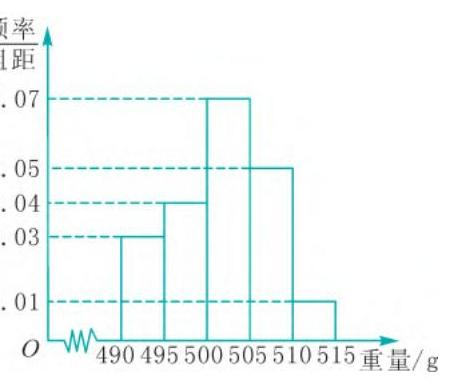
（第 8 题图）
$X$ 为质量超过 505 g 的产品数量，求 $X$ 的分布列。
9. 某工厂生产甲、乙两种产品，甲产品的一等品率为 $80 \%$ ，二等品率为 $20 \%$ ；乙产品的一等品率为 $90 \%$ ，二等品率为 $10 \%$ 。生产 1 件甲产品，若是一等品则获得利润 4 万元，若是二等品则亏损 1 万元；生产 1 件乙产品，若是一等品则获得利润 6 万元，若是二等品则亏损 2 万元。设生产各件产品相互独立。
（1）记 $X$ （单位：万元）为生产 1 件甲产品和 1 件乙产品可获得的总利润，求 $X$ 的分布列；
（2）求生产 4 件甲产品所获得的利润不少于 10 万元的概率。

# 2.3 离散型随机变量的数字特征 

随机变量的分布列完整描述了随机变量取值的概率，能使我们对所研究的随机现象有一个全面的了解，但在实际问题中，我们所关心的常常是随机变量取值的某个方面或某些方面的综合指标。例如，考察一批电视机的使用寿命时，质检部门常常关心这批电视机的整体质量指标——平均使用寿命，以及这批电视机使用寿命的稳定性指标。这一节我们将介绍反映随机变量取值的整体水平的数字特征——均值（也称数学期望），以及反映随机变量取值的分散程度的数字特征——方差和标准差。

## 2.3.1 离散型随机变量的构成

我们已经学习过平均数的概念。设在一次跳绳比赛中，某班第一组的 10 名同学的比赛成绩分别为（单位：次/分钟）：
$110,120,125,130,125,120,135,140,125,130$ ，则他们每分钟平均跳绳次数为

$$
\begin{aligned}
& \frac{1}{10}(110+120+125+130+125+120+135+140+125+130) \\
= & 110 \times \frac{1}{10}+120 \times \frac{2}{10}+125 \times \frac{3}{10}+130 \times \frac{2}{10}+135 \times \frac{1}{10}+140 \times \frac{1}{10} \\
= & 126
\end{aligned}
$$

若以 $X$ 表示从该组任取一位同学每分钟跳绳的次数，则 $X$ 是一个取有限个值的离散型随机变量，其分布列为

| $X$ | 110 | 120 | 125 | 130 | 135 | 140 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| $P$ | 0.1 | 0.2 | 0.3 | 0.2 | 0.1 | 0.1 |

这时，该组同学每分钟平均跳绳次数即为随机变量 $X$ 的可能取值关于其相应概率的加权平均。

一般地，设取有限个值的离散型随机变量 $X$ 的分布列为

| $X$ | $x_{1}$ | $x_{2}$ | $\cdots$ | $x_{n}$ |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | $p_{1}$ | $p_{2}$ | $\cdots$ | $p_{n}$ |

则称 $\sum_{i=1}^{n} x_{i} p_{i}$ 为随机变量 $X$ 的均值（mean）或数学期望 （mathematical expectation），记为 $E X$ ，即

$$
E X=\sum_{i=1}^{n} x_{i} p_{i}
$$

均值是一个与随机变量 $X$ 有关的实数，它反映了随机变量 $X$ 取值的平均水平。

随机变量的均值具有如下性质：
设 $X$ 为随机变量， $a, b$ 为常数，则

$$
E(a X+b)=a E X+b
$$

1 设随机变量 $X$ 的分布列如下表，求 $E X$ 。

| $X$ | 0 | 1 |
| :--: | :--: | :--: |
| $P$ | $1-p$ | $p$ |

解 由均值的计算公式，得

$$
E X=0 \times(1-p)+1 \times p=p
$$

例1给出的分布列可以用来刻画伯努利试验，其结果表明，在一次伯努利试验中，事件发生的平均次数等于该事件发生的概率。

上述分布列称为两点分布列，即 $X$ 服从两点分布。
若 $X$ 服从两点分布，则 $E X=p$ 。
例如，在篮球比赛中，罚球投进 1 次得 1 分，投不进得 0分。如果某人罚球投进的概率为 0.8 ，那么他罚球 1 次的得分 $X$ 的均值 $E X=0.8$ 。

对于二项分布和超几何分布的均值，有如下结论。
（1）若 $X \sim B(n, p)$ ，则 $E X=n p$ 。
证明 由 $P(X=k)=\mathrm{C}_{n}^{k} p^{k}(1-p)^{n-k} \quad(k=0,1, \cdots, n)$

及均值的计算公式, 得

$$
E X=\sum_{k=0}^{n} k \mathrm{C}_{n}^{k} p^{k}(1-p)^{n-k}
$$

又因为

$$
\begin{aligned}
k \mathrm{C}_{n}^{k} & =k \cdot \frac{n!}{k!(n-k)!} \\
& =\frac{n!}{(k-1)!(n-k)!} \\
& =n \cdot \frac{(n-1)!}{(k-1)!(n-k)!} \\
& =n \mathrm{C}_{n-1}^{k-1}
\end{aligned}
$$

所以, 令 $k-1=l$, 得

$$
\begin{aligned}
E X & =\sum_{k=1}^{n} k \mathrm{C}_{n}^{k} p^{k}(1-p)^{n-k} \\
& =\sum_{k=1}^{n} n \mathrm{C}_{n-1}^{k-1} p^{k}(1-p)^{n-k} \\
& =n p \sum_{k=1}^{n} \mathrm{C}_{n-1}^{k-1} p^{k-1}(1-p)^{n-k} \\
& =n p \sum_{l=0}^{n-1} \mathrm{C}_{n-1}^{l} p^{l}(1-p)^{n-1-l} \\
& =n p(p+1-p)^{n-1} \\
& =n p
\end{aligned}
$$

二项分布可描述 $n$ 重伯努利试验中事件 $A$ 发生次数的概率.上述计算结果表明， $n$ 重伯努利试验中事件 $A$ 发生的平均次数与事件 $A$ 发生的概率 $p$ 成正比。这与直观理解也是一致的。

在 2.2.2 节的例 3 中, $n=100, p=\frac{1}{2}$, 此时 $E X=100 \times$ $\frac{1}{2}=50$, 即连续投掷 100 次硬币, 出现正面朝上的平均次数为 50 。
（2）若随机变量 $X$ 服从超几何分布，即

$$
P(X=k)=\frac{\mathrm{C}_{M}^{k} \mathrm{C}_{N}^{n-k} M}{\mathrm{C}_{N}^{k}} \quad(k=0,1, \cdots, \min \{n, M\})
$$

则 $E X=\frac{n M}{N}$.
例如, 设 $N=100$ 件产品中有 $M=10$ 件次品, 任取 $n=20$

件，取到的次品的均值为 $\frac{n M}{N}=\frac{20 \times 10}{100}=2$ 件。
均值作为描述随机变量取值平均水平的一个整体指标，在社会生活、经济领域中有着广泛的应用。若对随机变量进行多次观察，则观察值的平均数在随机变量的均值附近。

2 在保险学中，收取保险费的原则是：投保人交的纯保险费与他所能得到赔偿金的期望值相等。现某保险公司开发一类保险产品，根据市场调查，这类保险出险的概率为 $p$ 。若赔偿金为一确定数，则保险公司应向投保人收多少纯保险费?

解 设投保人交的纯保险费为 $a$ 元，出险赔偿金为 $b$ 元。 $X$ 表示投保人所得到的赔偿金，则 $X$ 的可能取值为 $0, b$ ，且

$$
\begin{aligned}
& P(X=b)=p \\
& P(X=0)=1-p
\end{aligned}
$$

所以 $E X=0 \times(1-p)+b \times p=b p$ 。
所以保险公司应向投保人收取纯保险费 $a=b p$ 。

例如，若已知某类保险出险的概率为 0.0001 ，出险赔偿金为 20 万元，则保险公司应向投保人收取的纯保险费为

$$
a=200000 \times 0.0001=20(\text { 元 })
$$

3 发行彩票 100000 张，每张 1 元。设头等奖 1 个，奖金 10000 元；二等奖 2 个，奖金各 5000 元；三等奖 10 个，奖金各 1000 元；四等奖 100 个，奖金各 100 元；五等奖 1000个，奖金各 10 元。试求购买一张彩票的期望收益。

解 设 $X$ 表示购买一张彩票所得奖金数（单位：元），则 $X$ 的分布列如下：

| $X$ | 10000 | 5000 | 1000 | 100 | 10 | 0 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| $P$ | $\frac{1}{10^{2}}$ | $\frac{2}{10^{2}}$ | $\frac{10}{10^{2}}$ | $\frac{100}{10^{2}}$ | $\frac{1000}{10^{2}}$ | $\frac{98887}{10^{2}}$ |

于是购买一张彩票的期望收益为

$$
\begin{aligned}
E X= & \frac{1}{10^{5}} \times 10000+\frac{2}{10^{5}} \times 5000+\frac{10}{10^{5}} \times 1000 \\
& +\frac{100}{10^{5}} \times 100+\frac{1000}{10^{5}} \times 10 \\
= & 0.5
\end{aligned}
$$

所以购买一张彩票的期望收益是 0.5 元，即大约能收回 $50 \%$ 的投资额. $50 \%$ 就是这类彩票的返奖率。

根据气象预报，明天下大雨的概率为 0.25 ，下暴雨的概率为 0.03 。工地上有一台大型设备，遇到暴雨时要损失 120000 元，遇到大雨时要损失 20000 元。为保护设备，有以下三种方案：
（A）运走设备，需花费 12000 元；
（B）建一临时保护设施，需花费 4000 元，但这一设施只能防止大雨；
（C）不采取措施。
选择哪一种方案较好呢?
解 设选择方案（A）（B）（C）的损失分别为 $X_{1}, X_{2}, X_{3}$ ，则 $X_{1}=12000$ 。
$X_{2}$ 的分布列为

| $X_{2}$ | 4000 | 120000 |
| :--: | :--: | :--: |
| $P$ | 0.97 | 0.03 |

$X_{3}$ 的分布列为

| $X_{2}$ | 0 | 20000 | 120000 |
| :--: | :--: | :--: | :--: |
| $P$ | 0.72 | 0.25 | 0.03 |

于是，选择方案（A）（B）（C）的损失的均值分别为 $E X_{1}=12000$,
$E X_{2}=4000 \times 0.97+120000 \times 0.03=7480$,
$E X_{3}=0 \times 0.72+20000 \times 0.25+120000 \times 0.03=8600$.
从平均损失的角度看，选择方案（B）的平均损失最小，因此应该选择方案（B）。

# 练习 

1. 某学校要从 5 名男生和 2 名女生中选出 2 人作为志愿者, 若用随机变量 $X$ 表示选出的志愿者中女生的人数, 求 $E X$.
2. 某射手射击所得环数 $X$ 的分布列如下:

| $X$ | 7 | 8 | 9 | 10 |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | $x$ | 0.1 | 0.3 | $y$ |

已知 $E X=8.9$, 求 $x, y$ 的值.
3. 某工厂每月生产某种产品 3 件, 经检测发现, 工厂生产该产品的合格率为 $\frac{4}{5}$, 已知生产一件合格品能盈利 25 万元, 生产一件次品将会亏损 10 万元, 假设该产品任何两件之间合格与否相互没有影响。求：
(1) 工厂每月盈利额 $X$ (单位: 万元) 的所有可能取值;
(2) 该工厂月平均盈利额.

## 第2

## 高级型随机变量的方案

随机变量的均值反映了随机变量取值的平均水平, 但仅有均值并不能完全满足分析和解决实际问题的需要. 我们先看一个简单的例子.

设甲、乙两名选手射击的命中环数分别为 $X_{1}, X_{2}$, 其技术水平由如下分布列给出:

| $X_{1}$ | 8 | 9 | 10 |
| :--: | :--: | :--: | :--: |
| $P$ | 0.3 | 0.3 | 0.4 |
| $X_{2}$ | 8 | 9 | 10 |
| $P$ | 0.2 | 0.5 | 0.3 |

由均值的计算公式, 得

$$
\begin{aligned}
& E X_{1}=8 \times 0.3+9 \times 0.3+10 \times 0.4=9.1 \\
& E X_{2}=8 \times 0.2+9 \times 0.5+10 \times 0.3=9.1
\end{aligned}
$$

即两名选手的平均命中环数相同. 从平均命中环数的角度分不出两名选手技术水平的高低 (实际上分布列显示两名选手的技术水平是有差别的). 这样我们需要寻找另外的指标.

我们知道，选手技术水平的稳定性是衡量其技术水平的另一个重要特征. 通常, 我们用选手射击命中环数相对平均命中环数的整体偏离程度来刻画这种稳定性. 本节介绍的随机变量的方差 (标准差) 就是反映这种稳定性的一个重要指标.

设取有限个值的离散型随机变量 $X$ 的分布列如下:

| $X$ | $x_{1}$ | $x_{2}$ | $\cdots$ | $x_{n}$ |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | $p_{1}$ | $p_{2}$ | $\cdots$ | $p_{n}$ |

由于 $E X$ 反映了随机变量取值的平均水平, 则 $x_{i}-E X$ 表示随机变量的取值相对于平均水平的偏离, 为避免正负偏离相互抵消, 我们用 $\sum_{i=1}^{n}\left(x_{i}-E X\right)^{2} p_{i}$ 衡量这种偏离程度的一般水平,称之为随机变量 $X$ 的方差 (variance), 记为 $D X$, 即

$$
D X=\sum_{i=1}^{n}\left(x_{i}-E X\right)^{2} p_{i}
$$

而称 $\sqrt{D X}$ 为 $X$ 的标准差 (standard deviation).
对于前述的实例, 由方差计算公式, 得

$$
\begin{aligned}
D X_{1}= & (8-9.1)^{2} \times 0.3+(9-9.1)^{2} \times 0.3 \\
& +(10-9.1)^{2} \times 0.4 \\
= & 0.69 \\
D X_{2}= & (8-9.1)^{2} \times 0.2+(9-9.1)^{2} \times 0.5 \\
& +(10-9.1)^{2} \times 0.3 \\
= & 0.49
\end{aligned}
$$

由方差的意义可知, 乙选手的技术水平比甲选手稳定, 因而可以认为乙选手优于甲选手.

方差有以下简单计算公式:

$$
D X=\sum_{i=1}^{n} x_{i}^{2} p_{i}-(E X)^{2}=E\left(X^{2}\right)-(E X)^{2}
$$

方差有如下性质：设 $a, b$ 为常数，且 $a \neq 0$ ，则

$$
D(a X+b)=a^{2} D X
$$

易得到以下结论:
若 $X \sim B(n, p)$, 则 $D X=n p q($ 其中 $q=1-p)$.

$\frac{X}{n}$ 表示在 $n$ 重伯努利试验中事件 $A$ 发生的频率，由均值和方差的性质，有

$$
\begin{aligned}
& E\left(\frac{X}{n}\right)=\frac{1}{n} E X=\frac{1}{n}(n p)=p \\
& D\left(\frac{X}{n}\right)=\frac{1}{n^{2}} D X=\frac{1}{n^{2}}(n p q)=\frac{p q}{n}
\end{aligned}
$$

结果表明：随着 $n$ 的增加， $E\left(\frac{X}{n}\right)=p$ 不变，而 $D\left(\frac{X}{n}\right)=\frac{p q}{n}$ 趋于零，即频率越来越集中在事件 $A$ 发生的概率 $p$ 附近。这从理论上说明了用频率估计概率的合理性。

在经济领域，衡量投资效果的一个重要方法是：用均值度量收益的高低，用标准差度量风险的大小。下面是一个简单的例子。

# 解 

某人投资 10 万元，有两种方案可供选择。设 $X$表示采用方案一所得收益（单位：万元）， $Y$ 表示采用方案二所得收益（单位：万元），其分布列分别为：

| $X$ | -2 | 8 |
| :--: | :--: | :--: |
| $P$ | 0.7 | 0.3 |
| $Y$ | -3 | 12 |
| $P$ | 0.7 | 0.3 |

试计算 $X, Y$ 的均值和标准差。
解 由均值和方差的计算公式，得

$$
\begin{aligned}
& E X=-2 \times 0.7+8 \times 0.3=1 \\
& E Y=-3 \times 0.7+12 \times 0.3=1.5 \\
& D X=(-2)^{2} \times 0.7+8^{2} \times 0.3-1^{2}=21 \\
& \sqrt{D X}=\sqrt{21} \approx 4.58 \\
& D Y=(-3)^{2} \times 0.7+12^{2} \times 0.3-(1.5)^{2}=47.25 \\
& \sqrt{D Y} \approx 6.87
\end{aligned}
$$

上例中，假定同期银行利率为 $5 \%$ ，同期存入银行的利息

（无风险收益）为 $10 \times 5 \%=0.5$ 万元。从期望收益的角度来看，两种投资方案都可以带来额外的收益，但都要冒一定的风险。方案一的期望收益小于方案二，但方案一的风险也小于方案二。

202 旋中有 20 个大小相同的球，其中记上 0 号的有 10个，记上 $n$ 号的有 $n$ 个 $(n=1,2,3,4)$ 。现从袋中任取一球， $X$ 表示所取球的标号。
（1）求 $X$ 的分布列、均值和方差；
（2）若 $Y=a X+b, E Y=1, D Y=11$ ，试求 $a, b$ 的值.
解 (1) $X$ 的分布列为

| $X$ | 0 | 1 | 2 | 3 | 4 |
| :--: | :--: | :--: | :--: | :--: | :--: |
| $P$ | $\frac{1}{2}$ | $\frac{1}{20}$ | $\frac{1}{10}$ | $\frac{3}{20}$ | $\frac{1}{5}$ |

$$
\begin{aligned}
E X= & 0 \times \frac{1}{2}+1 \times \frac{1}{20}+2 \times \frac{1}{10}+3 \times \frac{3}{20}+4 \times \frac{1}{5} \\
= & 1.5 \\
D X= & (0-1.5)^{2} \times \frac{1}{2}+(1-1.5)^{2} \times \frac{1}{20} \\
& +(2-1.5)^{2} \times \frac{1}{10}+(3-1.5)^{2} \times \frac{3}{20} \\
& +(4-1.5)^{2} \times \frac{1}{5} \\
= & 2.75
\end{aligned}
$$

（2）由 $D Y=a^{2} D X$ ，得 $a^{2} \times 2.75=11$ ，即 $a= \pm 2$ 。
又 $E Y=a E X+b$ ，所以，
当 $a=2$ 时，由 $1=2 \times 1.5+b$ ，得 $b=-2$ ；
当 $a=-2$ 时，由 $1=-2 \times 1.5+b$ ，得 $b=4$ 。
所以

$$
\left\{\begin{array}{l}
a=2, \\
b=-2,
\end{array} \text { 或 }\left\{\begin{array}{l}
a=-2, \\
b=4 .
\end{array}\right.\right.
$$

# Huxue 

## 练习

1. 随机变量 $X$ 的取值为 $0,1,2$. 若 $P(X=0)=\frac{1}{5}, E X=1$, 求 $D X$.
2. 有甲、乙两种品牌手表, 它们的日走时误差分别为 $X_{1}, X_{2}$ (单位: 秒), 其分布列如下:

| $X_{1}$ | -1 | 0 | 1 |
| :--: | :--: | :--: | :--: |
| $P$ | 0.1 | 0.8 | 0.1 |


| $X_{2}$ | -2 | -1 | 0 | 1 | 2 |
| :--: | :--: | :--: | :--: | :--: | :--: |
| $P$ | 0.1 | 0.2 | 0.4 | 0.2 | 0.1 |

根据两种品牌手表的日走时误差的均值与方差, 比较两种品牌手表的质量.
3. $A, B$ 两个投资项目的利润率分别为随机变量 $X_{1}$ 和 $X_{2}$. 根据市场分析, $X_{1}$ 和 $X_{2}$ 的分布列分别为:

| $X_{1}$ | $5 \%$ | $10 \%$ |
| :--: | :--: | :--: |
| $P$ | 0.8 | 0.2 |


| $X_{2}$ | $2 \%$ | $8 \%$ | $12 \%$ |
| :--: | :--: | :--: | :--: |
| $P$ | 0.2 | 0.5 | 0.3 |

(1) 在 $A, B$ 两个项目上各投资 100 万元, $Y_{1}$ 和 $Y_{2}$ 分别表示投资项目 $A$ 和 $B$ 所获得的利润, 求方差 $D Y_{1}, D Y_{2}$;
(2) 将 $x(0 \leqslant x \leqslant 100)$ 万元投资 $A$ 项目, $100-x$ 万元投资 $B$ 项目, $f(x)$ 表示投资 $A$项目所得利润的方差与投资 $B$ 项目所得利润的方差的和. 求 $f(x)$ 的最小值, 并指出 $x$ 为何值时, $f(x)$ 取得最小值.

## 习题 2.3

1. 设随机变量 $X$ 的分布列为:

| $X$ | -2 | 0 | 3 | 4 |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | 0.1 | 0.2 | 0.3 | 0.4 |

求 $E X$.
2. 一批产品有一等品、二等品、三等品、等外品及废品 5 种, 对应的概率分别为 $0.7,0.1,0.1,0.06,0.04$. 若其产值分别为 6 元、 5.4 元、 5 元、 4 元及 0 元,求从这批产品中任取一件的平均产值.
3. 某公司估计在一定时间内完成某项任务的概率如下:

| 天数 | 1 | 2 | 3 | 4 | 5 |
| :--: | :--: | :--: | :--: | :--: | :--: |
| 概率 | 0.05 | 0.2 | 0.35 | 0.3 | 0.1 |

(1) 求该任务在 3 天之内完成的概率;
(2) 求完成该任务的期望天数;
(3) 求完成该任务天数的标准差.

4. 设甲、乙两名选手在一次射击中所得环数（分别用 $X, Y$ 表示）的分布列如下：

| $X$ | 8 | 9 | 10 |
| :--: | :--: | :--: | :--: |
| $P$ | 0.4 | 0.1 | 0.5 |


| $Y$ | 8 | 9 | 10 |
| :--: | :--: | :--: | :--: |
| $P$ | 0.1 | 0.6 | 0.3 |

试比较他们的技术水平。
5. 已知离散型随机变量 $X$ 的分布列如下表. 若 $E X=0, D X=1$, 求 $a, b$,

| $X$ | -1 | 0 | 1 | 2 |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | $a$ | $b$ | $c$ | $\frac{1}{12}$ |

6. 某人拟以 10 万元投资某项目，投资失败将损失 1 万元，投资成功则获利 $a$ 万元。投资成功的概率为 0.6 , 投资失败的概率为 0.4 . 若同期银行利率为 $5 \% ， a$ 至少应为多少时，该项目投资可行？
7. 某选手射击一次所得环数 $X$ 的分布列如下：

| $X$ | 7 | 8 | 9 | 10 |
| :--: | :--: | :--: | :--: | :--: |
| $P$ | 0.1 | 0.4 | 0.3 | 0.2 |

现该选手进行两次射击，以两次射击中最高环数作为他的成绩，记为 $Y$ 。求 $Y$ 的分布列与均值。
8. 某研究小组在电脑上进行人工降雨模拟试验，准备用 $A 、 B 、 C$ 三种人工降雨方式分别对甲、乙、丙三地实施人工降雨，其试验数据统计如下（单位：次）：

| 方式 | 实施地点 | 大雨 | 中雨 | 小雨 | 模拟试验总次数 |
| :--: | :--: | :--: | :--: | :--: | :--: |
| $A$ | 甲 | 4 | 6 | 2 | 12 |
| $B$ | 乙 | 3 | 6 | 3 | 12 |
| $C$ | 丙 | 2 | 2 | 8 | 12 |

假设甲、乙、丙三地实施的人工降雨彼此互不影响。考虑到旱情和水土流失，如果甲地恰需中雨即能达到理想状态，乙地必须是大雨才能达到理想状态，丙地只要是小雨或中雨就能达到理想状态，求降雨量达到理想状态的地方个数的分布列与均值。
9. 设袋子中装有 $a$ 个红球， $b$ 个黄球， $c$ 个蓝球，且规定：取出一个红球得 1 分，取出一个黄球得 2 分，取出一个蓝球得 3 分。
（1）当 $a=3, b=2, c=1$ 时，从该袋子中任取（有放回，且每球取到的机会均等） 2 个球，记随机变量 $X$ 为取出此 2 球所得分数之和，求 $X$ 的分布列；
（2）从该袋子中任取（每球取到的机会均等） 1 个球，记随机变量 $Y$ 为取出此球所得分数，若 $E Y=\frac{5}{3}, D Y=\frac{5}{9}$ ，求 $a \upharpoonright b \upharpoonright c$ 。

# 正态分布 

我们先看一个实际例子。

某炼钢厂生产了一种钢 25 MnSi 。由于多种偶然因素的影响，各炉钢的含 Si 量是有差异的。若记 $X$ 为这种钢的含 Si 量 （百分数），则 $X$ 是一个随机变量。实际问题中需要关心 $X$ 取值的概率分布。为了确定 $X$ 的概率分布，记录了 120 炉正常生产的 25 MnSi 钢的含 Si 量的数据（百分数），进行分组整理后得如下分组数据表：

| 组号 | 组 限 | 组频数 $n_{i}$ | 组频率 $f_{i}$ |
| :--: | :--: | :--: | :--: |
| 1 | $[0.635,0.655)$ | 2 | $\frac{2}{120}$ |
| 2 | $[0.655,0.675)$ | 0 | 0 |
| 3 | $[0.675,0.695)$ | 0 | 0 |
| 4 | $[0.695,0.715)$ | 2 | $\frac{2}{120}$ |
| 5 | $[0.715,0.735)$ | 2 | $\frac{2}{120}$ |
| 6 | $[0.735,0.755)$ | 8 | $\frac{8}{120}$ |
| 7 | $[0.755,0.775)$ | 13 | $\frac{13}{120}$ |
| 8 | $[0.775,0.795)$ | 23 | $\frac{23}{120}$ |
| 9 | $[0.795,0.815)$ | 24 | $\frac{24}{120}$ |
| 10 | $[0.815,0.835)$ | 21 | $\frac{21}{120}$ |
| 11 | $[0.835,0.855)$ | 14 | $\frac{14}{120}$ |
| 12 | $[0.855,0.875)$ | 6 | $\frac{6}{120}$ |
| 13 | $[0.875,0.895)$ | 2 | $\frac{2}{120}$ |
| 14 | $[0.895,0.915)$ | 2 | $\frac{2}{120}$ |
| 15 | $[0.915,0.935)$ | 0 | 0 |
| 16 | $[0.935,0.955]$ | 1 | $\frac{1}{120}$ |

以这种弱含 Si 率为横坐标，以组频数为纵坐标 $\left(\frac{f_{s}}{0.02}=\frac{n_{s}}{120} \cdot \frac{1}{0.02}=\frac{n_{s}}{2.4}\right.$ ，取纵轴单位为 $\left.\frac{1}{2.4}\right)$ ，得到频率直方图（如图2-3）。
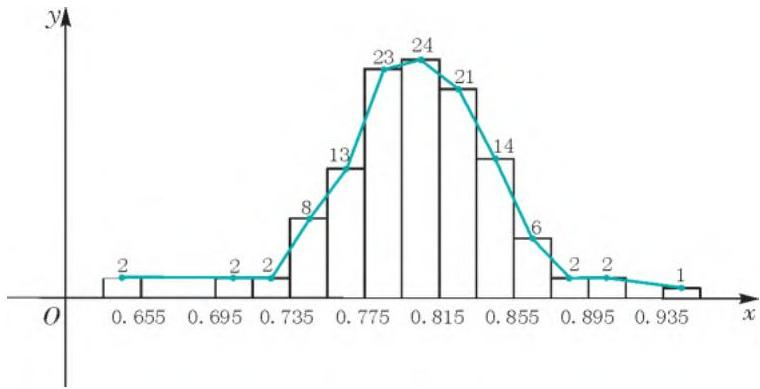

图 2-3
从图 2-3 中可以看出，随机变量的观察值主要集中在中间几组，偏大或偏小的取值都很少，且基本呈对称形式。当样本数 $n$ 越来越大，分组数越来越多时，这个频率直方图的形状会越来越像一条钟形曲线（如图2-4）。这条曲线就是（或近似地是）如下函数的图象：

$$
p(x)=\frac{1}{\sqrt{2 \pi} \sigma} \mathrm{e}^{-\frac{(x-\mu)^{2}}{2 \sigma}}, x \in(-\infty,+\infty)
$$

其中 $\mu$ 和 $\sigma$ 为参数，且 $\sigma>0 ， \mathrm{e}=2.71828 \cdots ， \pi=3.14159 \cdots$ 。我们称 $p(x)$ 的图象为正态分布密度曲线，简称正态曲线。
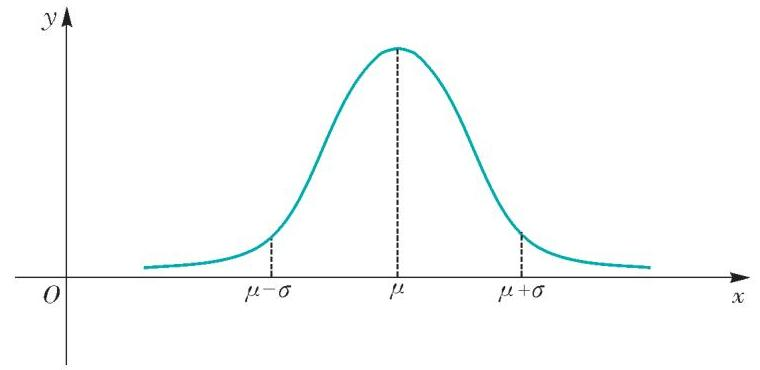

图 2-4
一般地，对于任意实数 $x_{1}<x_{2}$ ，若随机变量 $X$ 落在区间 $\left(x_{1}, x_{2}\right]$ 的概率 $P\left(x_{1}<X \leqslant x_{2}\right)$ 可以通过函数 $p(x)$ 来描述，即 $P\left(x_{1}<X \leqslant x_{2}\right)$ 恰好是正态曲线、直线 $x=x_{1}$ 、直线 $x=x_{2}$ 及 $x$轴所围成的平面图形（图2-5 中阴影部分）的面积，则称随机变量 $X$ 服从参数 $\mu$ 和 $\sigma$ 的正态分布，记为 $X \sim N\left(\mu, \sigma^{2}\right)$ 。其中 $\mu$

描述了 $X$ 取值的平均水平, 可以用样本的均值去估计, $\sigma$ 描述了 $X$ 取值的分散程度, 可以用样本的标准差去估计。
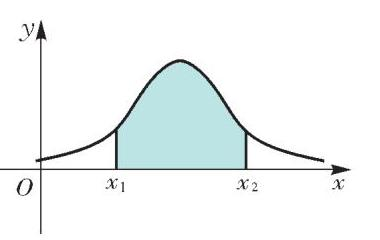

图 2-5
经验表明, 一个随机变量如果受到许多互不相干、不分主次的偶然因素的干扰, 它就服从(或近似服从)正态分布. 例如,反复测量长度时的测量误差, 某一地区同性别同年龄组儿童的身高、体重, 正常生产条件下各种产品的质量指标(如零件的尺寸), 一般都服从(或近似服从)正态分布. 因此, 正态分布广泛存在于自然现象、生产和生活实际之中, 在概率和统计中占有重要的地位.

因为正态分布完全由参数 $\mu$ 和 $\sigma$ 确定, 所以可以通过研究 $\mu$和 $\sigma$ 对正态曲线的影响, 进一步认识正态曲线的特点, 下面给出几个正态分布密度函数的图形(如图 2-6、图 2-7).
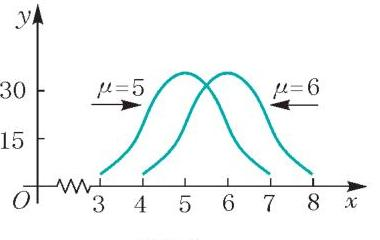

图 2-6
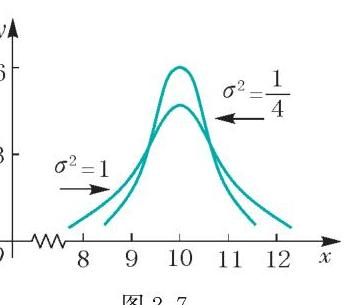

图 2-7
一般地, 正态曲线具有以下特点:
(1) 曲线位于 $x$ 轴的上方, 与 $x$ 轴不相交, 且曲线与 $x$ 轴之间的面积为 1 ;
(2) 曲线是单峰的, 它关于直线 $x=\mu$ 对称, 且峰值在 $x=$ $\mu$ 处取得.

（3）当 $\sigma$-定时，曲线的位置由 $\mu$ 确定，曲线随着 $\mu$ 的变化而沿 $x$ 轴方向平移；
（4）当 $\mu$-定时，曲线的形状由 $\sigma$ 确定， $\sigma$ 越小，曲线越 "瘦高"，表示总体的分布越集中； $\sigma$ 越大，曲线越 "矮胖"，表示总体的分布越分散。

进一步，若 $X \sim N\left(\mu, \sigma^{2}\right)$ ，则可以得到：

$$
\begin{aligned}
& P\left(\mu-\sigma<X<\mu+\sigma\right)=68.26 \% \\
& P\left(\mu-2 \sigma<X<\mu+2 \sigma\right)=95.44 \% \\
& P\left(\mu-3 \sigma<X<\mu+3 \sigma\right)=99.74 \%
\end{aligned}
$$

上述结果可用图 2-8 表示：
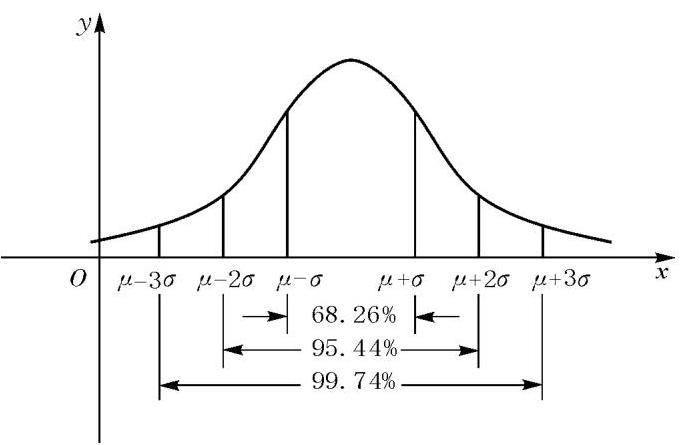

图 2-8
这说明 $X$ 的取值落在区间 $\left(\mu-3 \sigma, \mu+3 \sigma\right)$ 外的概率非常小。如果在一次观察中 $X$ 的取值落在这个范围之外，就有充足的理由认为 $X \sim N\left(\mu, \sigma^{2}\right)$ 的假定出了问题。这就是实际问题中常用的 $3 \sigma$ 法则.

解在某校举行的数学竞赛中，全体参赛学生的竞赛成绩近似服从正态分布 $N(70,100)$ 。已知成绩在 90 分以上（含 90分）的学生有 12 名。
（1）此次参赛的学生总数约为多少人?
（2）若成绩在 80 分以上（含 80 分）为优秀，则此次考试成绩为优秀的学生约有多少人？

解 （1）设参赛学生的分数为 $X$ ，则 $X \sim N(70,100)$ ， $\mu=70, \sigma=10$ ，所以

$$
\begin{aligned}
& P(X \geqslant 90) \\
= & \frac{1}{2}[1-P(50<X<90)] \\
= & \frac{1}{2}[1-P(70-20<X<70+20)] \\
= & \frac{1}{2}(1-0.9544)=0.0228
\end{aligned}
$$

这说明成绩在 90 分以上（含 90 分）的学生人数约占全体参赛人数的 $2.28 \%$ ，因此，参赛的学生总数约为

$$
\frac{12}{0.0228} \approx 526(\mathrm{~A})
$$

（2）因为

$$
\begin{aligned}
& P(X \geqslant 80) \\
= & \frac{1}{2}[1-P(60<X<80)] \\
= & \frac{1}{2}[1-P(70-10<X<70+10)] \\
= & \frac{1}{2}(1-0.6826) \\
= & 0.1587
\end{aligned}
$$

所以，此次考试成绩为优秀的学生约有 $526 \times 0.1587 \approx 83$ （人）。

# 练习 

1. 某种包装的大米的质量（单位： kg ）服从正态分布 $N(10,0.01)$ ，任选一袋这种大米，质量在 $9.8 \sim 10.2 \mathrm{~kg}$ 内的概率是多少?
2. 在某项测量中，测量结果 $X$ 服从正态分布 $N\left(1, \sigma^{2}\right)(\sigma>0)$ 。若 $X$ 在 $(0,1)$ 内取值的概率为 0.4 ，求 $X$ 在 $(0,2)$ 内取值的概率。

## 习题 2.4

1. 设随机变量 $X$ 服从正态分布 $N\left(1, \sigma^{2}\right)$ ，求函数 $f(x)=x^{2}+2 x+X$ 不存在零点的概率。
2. 已知随机变量 $X$ 服从正态分布 $N\left(2, \sigma^{2}\right)$ ，且 $P(X<4)=0.8$ ，求 $P(0<X<2)$ 。
3. 设随机变量 $X$ 服从正态分布 $N(2,9)$ ，若 $P(X>c+1)=P(X<c-1)$ ，求 $c$ 的值。

4. 某一部件由三个电子元件按下图方式连接而成, 若元件 1 或元件 2 正常工作, 且元件 3 正常工作, 则部件正常工作, 设三个电子元件的使用寿命 (单位：小时) 均服从正态分布 $N\left(1000,50^{2}\right)$, 且各个元件能否正常工作相互独立, 求该部件的使用寿命超过 1000 小时的概率。
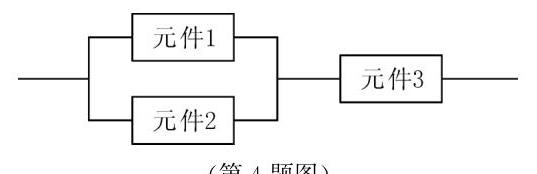
(第4题图)
5. 已知某批零件的长度误差 (单位：毫米) 服从正态分布 $N\left(0,3^{2}\right)$, 从中随机取一件, 求长度误差落在区间 $(3,6)$ 内的概率。
6. 假设每天从甲地去乙地的旅客人数 $X$ 是服从正态分布 $N\left(800,50^{2}\right)$ 的随机变量.求一天中从甲地去乙地的旅客人数不超过 900 的概率。

# 讽谈小概率事件 

上世纪50年代初在朝鲜发生的那场战争，是中国人民志愿军与以美国为首的联合国军在武器装备上相差悬殊的一场较量. 战争初期, 美国占有绝对的制空权. 中国人民志愿军常常面临被美国飞机轰炸的极大危险. 当飞机飞临时, 志愿军指挥员命令战士一齐向飞机射击, 创下了许多用步枪打下飞机的战例, 以致美国飞行员在轰炸和低空扫射时也心存极大顾虑, 这就是当时所称的排枪战术. 概率论可以给这种排枪战术一个合理的解释。

设每支步枪射击飞机命中的概率为 $p=0.004$. 若 250 支步枪同时独立地进行一次射击, 则击中飞机的概率是多少?

每支步枪射击一次相当于进行一次伯努利试验, 250 支步枪同时独立地进行一次射击相当于进行 250 重伯努利试验. 其中事件 $A$ 发生的概率为 $p=0.004$, 飞机被击中即其至少被击中一次, 其对立事件为 250 支步枪全部都没有击中飞机, 即事件 $A$ 发生 0 次, 其概率为

$$
\mathrm{C}_{250}^{0}(0.004)^{n}(1-0.004)^{250}=(0.996)^{250} \approx 0.37
$$

从而飞机被击中的概率为

$$
1-(0.996)^{250} \approx 1-0.37=0.63
$$

由以上结果可以看到，虽然每支步枪击中飞机的概率很小，但很多支步枪同时射击，飞机被击中的概率就大得多。当步枪数目很大时，这个概率甚至可能很接近于 1 。

一般地，设有 $n$ 支步枪同时射击，则击中飞机的概率为 $1-(0.996)^{n}$ 。若要以 0.99 的概率击中飞机，则所需的步枪数 $n$ 可由下式求得

$$
1-0.99=(0.996)^{n}
$$

取对数得， $n \lg 0.996=\lg 0.01$ ，从而

$$
n=\frac{\lg 0.01}{\lg 0.99} \approx 1150
$$

即约需步枪 1150 支便能以 0.99 的概率击中飞机。
这个例子告诉我们不要忽视概率很小的事件，它在多次重复试验中迟早要发生的概率（至少发生一次）可以很大，甚至接近于 1. 不过，在一次试验中，我们常常认为小概率事件是不会发生的，这一点在第 3 章中将会用到。

# 讨论题 

举出你身边不能忽视小概率事件的例子。
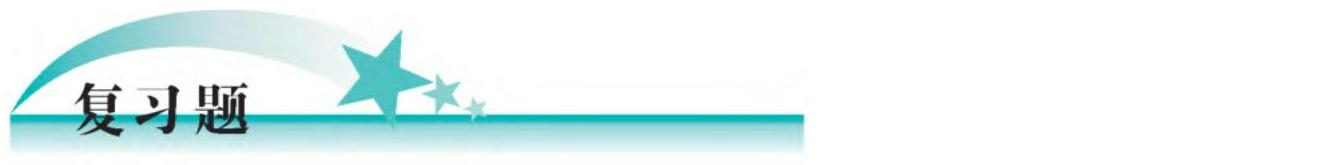

## A 组

1. 某班从 6 名班干部（其中男生 4 人，女生 2 人）中选 3 人参加学校的义务劳动。
（1）设所选 3 人中女生人数为 $X$ ，求 $X$ 的分布列及均值；
（2）在男生甲被选中的情况下，求女生乙也被选中的概率。
2. 某商场的销售部共有 50 名职工，在一次综合素质考查中，业务水平与服务态度的考评成绩如下：

| 人数 |  |  |  |
| :--: | :--: | :--: | :--: |
| 项目 | $90 \sim 100$ | $80 \sim 89$ | 其他 |
| 业务水平 | 10 | 20 | 20 |
| 服务态度 | 12 | 25 | 13 |
| 业务水平与服务态度 | 8 | 18 | 24 |

从中任选一名职工。
（1）求这名职工的业务水平不低于 80 分的概率；
（2）在这名职工的业务水平不低于 90 分的条件下，求他的服务态度也不低于 90 分的概率；
（3）说明职工的业务水平与服务态度之间是否有关联。
3. 袋中放有 5 个黑球和 4 个白球, 从中随机取出一球, 然后放回, 并同时放入与取出的球同色的球 2个，再取第二个球，如此下去．求；
（1）前两次都取到白球的概率；
（2）前两次都取到白球，第三次取到黑球的概率。
4. 某保险公司把被保险人分为三类："谨慎的""一般的""冒失的"。统计资料表明，这三类人在一年内发生事故的概率依次为 $0.05,0.15$ 和 0.30 ，且 "谨慎的"被保险人占 $20 \%$ 、"一般的"占 $50 \%$ 、 "冒失的"占 $30 \%$ ，求一个被保险人在一年内发生事故的概率。
5. 设甲袋中有 $a$ 个白球、 $b$ 个红球, 乙袋中也有 $a$ 个白球、 $b$ 个红球, 现从甲袋中任取一球放入乙袋中，再从乙袋中任取一球，求从乙袋中取出的球是白球的概率。
6. 一批产品中有 10 件合格品, 3 件不合格品. 每次不放回地随机抽取一件, 直到取到合格品为止, 求所需抽取次数 $X$ 的分布列。
7. 一条自动生产线上生产产品的一级品率为 0.6 . 现检验了 6 件. 求：
（1）恰有 3 件一级品的概率；
（2）至少有 1 件一级品的概率。
8. 某车间有 10 台同类型的机床, 各机床均独立工作且某时刻能够正常工作的概率均为 0.6 , 每台机床工作时需供应一个单位的电能. 设 $X$ 表示某时刻同时正常工作的车床数.
(1) 求 $P(X=5), P(X=7)$;
（2）若供应该车间 6 个单位的电能，可以有多大概率保证车间生产正常（不出现超负荷使用电能）?
(3) 求 $E X, D X$.
9. 数学组共有教师 20 人, 其中有 8 人在 45 岁以上. 现从该组随机选取 4 名教师参加市教学比赛, 设 $X$ 表示选到 45 岁以上的教师的人数. 求：
(1) $X$ 的分布列;
(2) $E X$.
10. 已知随机变量 $X$ 服从正态分布 $N\left(2, \sigma^{2}\right), P(X \leqslant 4)=0.84$, 求 $P(X \leqslant 0)$.
11. 某机器生产的螺栓长度 (单位: cm ) 服从 $N\left(10.5,0.06^{2}\right)$ ，规定长度在 $10.05 \pm 0.12$ 内为合格品，任取一个螺栓，求它不合格的概率。

# B 组 

1. 甲、乙、丙三人向同一飞行器射击, 设甲、乙、丙击中飞行器的概率分别为 $0.4,0.5,0.7$. 已知只有一人击中, 飞行器坠落的概率为 0.2 ; 有二人击中, 飞行器坠落的概率为 0.6 ; 有三人击中,

飞行器必坠落. 求飞行器坠落的概率.
2. 设离散型随机变量 $X$ 的可能取值为 $1,2,3,4 . P(X=k)=a k+b(k=1,2,3,4)$ ，又 $X$ 的均值 $E X=3$, 求 $a+b$ 的值.
3. 因冰雪灾害, 某柑橘基地果林严重受损, 为此有关专家提出两种拯救果树的方案, 每种方案都需分两年实施. 若实施方案一, 预计第一年可以使柑橘产量恢复到灾前的 1.0 倍、 0.9 倍、 0.8 倍的概率分别是 $0.3 、 0.3 、 0.4$ ；第二年可以使柑橘产量为第一年产量的 1.25 倍、 1.0 倍的概率分别是 $0.5 、 0.5$. 若实施方案二, 预计第一年可以使柑橘产量达到灾前的 1.2 倍、 1.0 倍、 0.8 倍的概率分别是 $0.2 、 0.3 、 0.5$ ；第二年可以使柑橘产量为第一年产量的 1.2 倍、 1.0 倍的概率分别是 0.4 、 0.6 . 实施每种方案第一年与第二年相互独立, 令 $X_{i}(i=1,2)$ 表示方案 $i$ 实施两年后柑橘产量达到灾前产量的倍数。
(1) 写出 $X_{1}, X_{2}$ 的分布列;
(2) 实施哪种方案, 两年后柑橘产量超过灾前产量的概率更大?
(3) 不管哪种方案, 如果实施两年后柑橘产量达不到, 恰好达到, 超过灾前产量, 预计利润分别为 10 万元、 15 万元、 20 万元, 问: 实施哪种方案的平均利润更大?
4. 根据以往的经验, 某工程施工期间的降水量 $X$ (单位: mm ) 对工期的影响如下表:

| 降水量 $X$ | $X<300$ | $300 \leqslant X<700$ | $700 \leqslant X<900$ | $X \geqslant 900$ |
| :--: | :--: | :--: | :--: | :--: |
| 工期延误天数 $Y$ | 0 | 2 | 6 | 10 |

历年气象资料表明, 该工程施工期间降水量 $X$ 小于 300,700,900 的概率分别为 $0.3,0.7,0.9$ 。
(1) 求工期延误天数 $Y$ 的均值与方差;
(2) 在降水量 $X$ 至少是 300 的条件下, 求工期延误不超过 6 天的概率。
5. 计划在某水库建一座至多安装 3 台发电机的水电站. 过去 50 年的水文资料显示, 水库年人流量 $X$ （年人流量：一年内上游来水与库区降水之和。单位：亿立方米）都在 40 以上。其中，不足 80 的年份有 10 年, 不低于 80 且不超过 120 的年份有 35 年, 超过 120 的年份有 5 年。将年人流量在以上三段的频率作为相应段的概率, 并假设各年的年人流量相互独立。
(1) 求未来 4 年中, 至多有 1 年的年人流量超过 120 的概率;
（2）水电站希望安装的发电机尽可能运行，但每年发电机最多可运行台数受年人流量 $X$ 限制，并有如下关系:

| 年人流量 $X$ | $40<X<80$ | $80 \leqslant X \leqslant 120$ | $X>120$ |
| :--: | :--: | :--: | :--: |
| 发电机最多可运行台数 | 1 | 2 | 3 |

若某台发电机运行, 则该台年利润为 5000 万元; 若某台发电机未运行, 则该台年亏损 800 万元. 欲使水电站年总利润的均值达到最大, 应安装发电机多少台?

# 思考与实践 

1. 在医疗卫生工作中, 经常用到人的各种生理生化指标 (如身高、红细胞数、血糖浓度等) 的正常值.所谓正常值是指正常人的各种生理生化指标的观察值. 由于生物的变异和环境条件不同, 这些值是有波动的. 如果已知正常人的某项生化指标服从正态分布, 可根据大量的调查资料求出 $\mu$ 和 $\sigma$ 的值, 然后把在区间 $(\mu-2 \sigma, \mu+2 \sigma)$ （或 $(\mu-3 \sigma, \mu+3 \sigma)$ ）内的观察值作为 $95.44 \%$ （或 $99.74 \%$ ）的正常值范围.

请你到体育老师处收集你所在年级所有同学的身高数据, 估计参数 $\mu$ 和 $\sigma$ 的值, 并计算出所在年级同学身高的正常值范围。
2. 高尔顿板是在一块坚起的木板上钉上一排排互相平行、水平间隔相等的铁钉 (如图所示), 并且每一排钉子数目都比上一排多一个, 一排中各个钉子正好对准上面一排两个相邻铁钉的正中央. 从人口处放进一个直径略小于两颗钉子之间的距离的小球, 当小球从两钉之间的间隙下落时, 由于碰到下一排铁钉, 它将以相等的可能性向左或向右落下, 接着小球再通过两钉之间的间隙,又碰到下一排铁钉, 如此继续下去, 小球最后落人下方条状的格子内.请大家通过以下的问题研究高尔顿板与二项分布的关系.
(1) 通过高尔顿板试验课件, 做 1000 个小球的高尔顿板试验, 看一看小球在格子中的分布形状是怎样的?
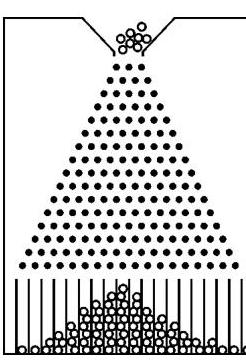
(第 2 题图)
(2) 计算小球落人各个格子所有可能路线的数目；（提示：考虑它与杨辉三角的关系）
(3) 计算小球落人各个格子的概率。

# 第 9 章 统 计 

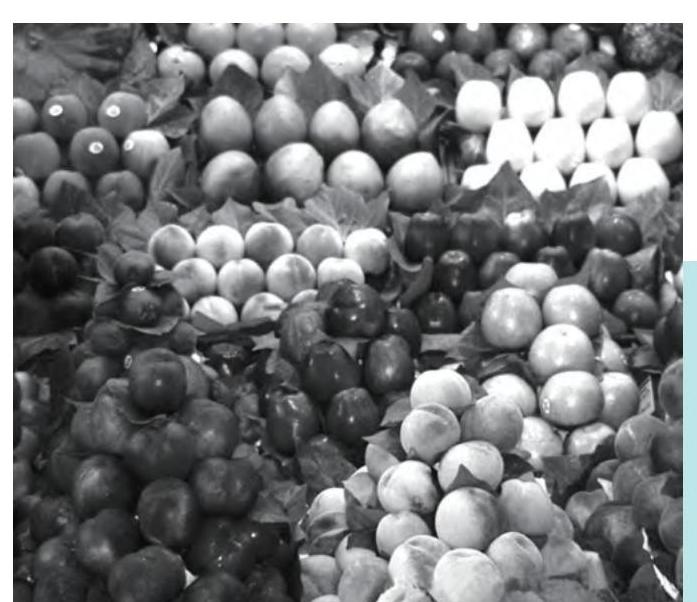
3.1 成对数据的统计相关性

闻读与讨论：散点图的制作
3.2 一元线性回归

闻读与讨论：最小二乘估计推导及线性相关关系判断课题学习：可线性化的回归问题
3.3 $2 \times 2$ 列联表

闻读与讨论： $2 \times 3$ 列联表的独立性检验复习题
思考与实践

众所周知，孩子的身高与父母的身高有关系，如果父母的个子都较高，孩子的身高通常也较高。同时，研究表明：身高极高或身高极矮的父母，他们子女的身高有向人类的平均身高"回归"的趋势。如何从科学的角度描述这种关系？如何给出这种关系的度量？

本章将通过典型案例，介绍变量的相关性，一元线性回归和独立性检验的基本思想、方法及初步应用，让同学们学会运用这些统计方法去解决一些简单的实际问题，增强对统计数据的直观感觉，进一步体会统计在现实生活中的意义和作用，为以后的学习奠定基础。

# 成对数据的统计相关性 

## 2.1 变量的和无线及其描述

我们已经学习过变量间的函数关系。例如，设 $x$ 为某种商品的销售量， $y$ 为该种商品的销售总金额，当该种商品的价格 $p$ 保持不变时， $x$ 与 $y$ 之间的关系可表示为 $y=p x$ ，二者之间为一次函数关系，也叫作线性函数关系。函数关系是一种确定的关系。

在实际问题中，变量之间的关系往往并不那么简单。例如人的身高与体重，一般来说身高越高，体重会越重。但因人有胖瘦之别，身材高的并不一定体重就重。又如居民储蓄与居民家庭收人之间的关系，虽然一般来说收人越高，储蓄就越多，但是影响储蓄的因素很多（如银行利率、消费水平和消费习惯等），导致收人相同的家庭，储蓄往往不同。同样，有相同储蓄额的家庭，其收人也不一定相同。这样，诸如身高与体重之间、居民储蓄与家庭收人之间，尽管存在着密切的关系，但是身高不是影响体重的唯一因素，收人也不是影响储蓄的唯一因素，因而造成了这种关系的不确定性。

我们把变量之间存在的这种统计上的数量关系叫作相关关系（correlation）。两个变量之间的相关关系有两种形态，即线性相关关系和非线性相关（曲线相关）关系。

为弄清两个变量之间的相关关系，根据样本估计总体的思想，可以通过观察或试验获得样本数据 $\left(x_{1}, y_{1}\right),\left(x_{2}\right.$ ， $\left.y_{2}\right), \cdots,\left(x_{n}, y_{n}\right)$ ，这样的样本数据称为成对样本数据，由成对样本数据作出的散点图则是描述变量之间相关关系形态的一种直观方法，具体作法为：

建立平面直角坐标系，用横坐标代表变量 $x$ ，纵坐标代表变量 $y$ ，这样成对样本数据 $\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{n}, y_{n}\right)$在坐标系中就形成 $n$ 个离散的点，这样的图形称为散点图。

11下表记录了 15 个不同年龄的人的身高和体重的数据, 试描述人的身高与体重的关系.

| 身高/cm | 75 | 86 | 95 | 108 | 112 | 116 | 135 | 151 | 155 | 160 | 163 | 167 | 171 | 178 | 185 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 体重 $/ \mathrm{kg}$ | 10 | 12 | 15 | 17 | 20 | 22 | 35 | 41 | 48 | 50 | 51 | 54 | 59 | 66 | 75 |

解 建立平面直角坐标系, 横坐标代表身高, 纵坐标代表体重. 15 组数据对应平面内的 15 个点, 构成如图 3-1 的散点图.
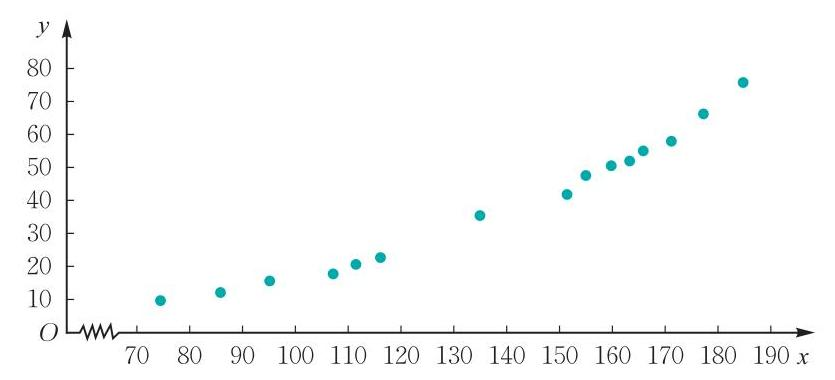

图 3-1
从散点图可以看出, 人的体重随着身高的增加而增加. 这些散点大致在一条直线附近, 可以认为它们之间大致呈一种线性相关关系。

2003 年北京市非典疫情的部分数据如下表:

| 日 期 | 5月1日 | 5月2日 | 5月3日 | 5月4日 | 5月5日 |
| :--: | :--: | :--: | :--: | :--: | :--: |
| 累计确诊病例 | 1553 | 1636 | 1741 | 1803 | 1897 |
| 5月6日 | 5月7日 | 5月8日 | 5月9日 | 5月10日 | 5月11日 |
| 1960 | 2049 | 2136 | 2177 | 2227 | 2265 |
| 5月13日 | 5月14日 | 5月15日 | 5月16日 | 5月17日 | 5月18日 |
| 2347 | 2370 | 2388 | 2405 | 2420 | 2434 |

试作出累计确诊病例的散点图.
解 建立平面直角坐标系, 横坐标代表时间（以 4 月 30 日为起点, 单位: 天), 纵坐标代表累计确诊病例(单位: 人),在坐标系中描点得如图 3-2 的散点图.

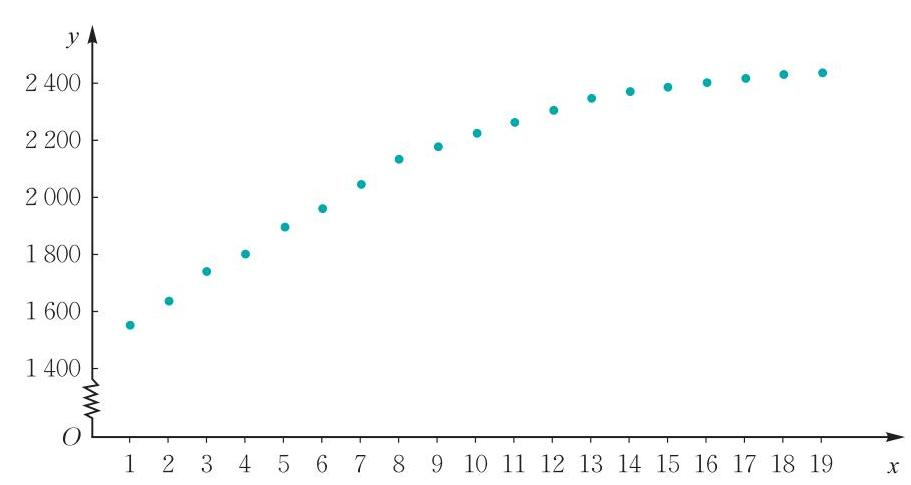

图 3-2
由散点图可以看出，累计确诊病例与时间（单位：天）呈非线性相关（曲线相关）关系，开始上升比较快，后来上升比较慢。这反映了开始病毒传染速度较快，而后来采取严格隔离措施和病毒本身传染力有所降低后传染速度减慢，逐渐趋于平行于 $x$ 轴的状态，即感染人数逐渐趋于零增长。作为传染病的疫情报告，能预测感染人数零增长的时刻是非常重要的。

从累计确诊病例中去掉已死亡和已治愈人数，即可得到现有病例人数的散点图。对现有病例人数的讨论也是很重要的。例如它对医院的规模有一定的参考意义。

散点图的优点是：能直观反映两个变量之间有无相关关系，并对变量间的相关关系作出大致的描述。

散点图的缺点是：不能准确反映两个变量之间相关关系的密切程度。

# 练习 

1. 叙述散点图的作法和优缺点。
2. 从某城市家庭中随机抽取 12 个家庭，所得月收入与月储蓄的样本数据如下：

| 家庭编号 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 月收入/千元 | 9 | 13 | 15 | 17 | 18 | 26 | 22 | 20 | 23 | 28 | 30 | 33 |
| 月储蓄/千元 | 3 | 5 | 4 | 6 | 7 | 9 | 8 | 7 | 10 | 11 | 10 | 12 |

试作出散点图并说明月收入与月储蓄的相关关系。

# 1.1.2 相关系数 

虽然由散点图可以看出两个变量之间的相关关系有两种形态，但不能定量给出这种相关关系的密切程度。两个变量之间的线性相关关系是一种重要且最简单的相关关系，对于成对变量 $(x, y)$ 的成对样本数据 $\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{n}\right.$, $y_{n}$ ），定义其样本相关系数 $r$ 如下：

$$
r=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2} \sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}}
$$

由上式给出的相关系数 $r$ 满足 $|r| \leqslant 1$ ，当 $r<0$ 时，称成对数据 $\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{n}, y_{n}\right)$ 负相关. 此时 $x_{i}$增大， $y_{i}$ 倾向于减小，其对应的散点图基本呈下降趋势；当 $r>0$ 时，称成对数据 $\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{n}, y_{n}\right)$ 正相关，此时 $x_{i}$ 增大， $y_{i}$ 倾向于增大，例如 3.1.1节例 1 中的数

相关系数 $r$ 度量
了成对样本数据线性相关系系程度，可用于估计两变量之间的线性相关系系程度。

相，其对应散点图基本呈上升趋势；当 $r=0$ 时，称成对数据 $\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{n}, y_{n}\right)$ 不相关.

若定义 $n$ 维向量 $\left(x_{1}, x_{2}, \cdots, x_{n}\right)=x,\left(y_{1}, y_{2}, \cdots, y_{n}\right)$ $=\boldsymbol{y}$ 的内积为 $\boldsymbol{x} \cdot \boldsymbol{y}=\sum_{i=1}^{n} x_{i} y_{i}$, 向量 $\boldsymbol{x}$ 的模为 $\sqrt{\sum_{i=1}^{n} x_{i}^{2}}$, 向量 $\boldsymbol{y}$ 的模为 $\sqrt{\sum_{i=1}^{n} y_{i}^{2}}$, 称 $\cos \theta=\frac{\sum_{i=1}^{n} x_{i} y_{i}}{\sqrt{\sum_{i=1}^{n} x_{i}^{2} \sum_{i=1}^{n} y_{i}^{2}}}$ 为向量 $\boldsymbol{x}$ 与 $\boldsymbol{y}$ 的夹角余弦.记 $x_{i}^{*}=\frac{x_{i}-\bar{x}}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}}, y_{i}^{*}=\frac{y_{i}-\bar{y}}{\sqrt{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}}, i=1,2, \cdots, n$. 称 $\boldsymbol{x}^{*}=\left(x_{1}^{*}, x_{2}^{*}, \cdots, x_{n}^{*}\right)$ 与 $\boldsymbol{y}^{*}=\left(y_{1}^{*}, y_{2}^{*}, \cdots, y_{n}^{*}\right)$ 为 $\boldsymbol{x}$ 与 $\boldsymbol{y}$的标准化向量， $\left(x_{1}^{*}, y_{1}^{*}\right),\left(x_{2}^{*}, y_{2}^{*}\right), \cdots,\left(x_{n}^{*}, y_{n}^{*}\right)$ 为标准化成对数据，由相关系数和夹角余弦的定义，成对数据 $\left(x_{1}\right.$ ， $\left.y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{n}, y_{n}\right)$ 的相关系数即为标准化成对数据 $\left(x_{1}^{*}, y_{1}^{*}\right),\left(x_{2}^{*}, y_{2}^{*}\right), \cdots,\left(x_{n}^{*}, y_{n}^{*}\right)$ 的夹角余弦，也是标准化向量 $\boldsymbol{x}^{*}, \boldsymbol{y}^{*}$ 的内积。

# 练习 

计算 3.1.1 节练习第 2 题中样本数据的相关系数.

## 阅读与讨论

## 散点图的制作

对成对样本数据画散点图和计算相关系数都可以利用计算机软件完成。如在 Excel 中用 $\operatorname{Correl}($ )函数，或者在 R 语言中用统计包里面的 $\operatorname{cor}($ )函数都可以计算相关系数，下面我们在 Excel 2016 中对 3.1.1节例 1 中的数据画出散点图并计算相关系数，具体操作步骤如下：

1. 首先在 Excel 工作表中输入数据（A2：B16）。
2. 用鼠标选中所有数据，然后在主菜单中选择"插入"，从出现的图标中选择 "图表" 中的"散点图"，即可得到成对样本数据的散点图. 用鼠标右击图中各项进入对话框, 即可对散点图进行各种修改。
3. 任意选择一空单元格，在主菜单中选择"公式"，从出现的图标中选择 "插入函数"，从对话框中选择函数 "Correl"并按提示输入数据范围，点击"确定"后即可得到利用函数 $\operatorname{Correl}($ )计算的成对样本数据的相关系数。也可直接在单元格中输入" $=\operatorname{Correl}(\mathrm{A} 2 ; \mathrm{A} 16, \mathrm{~B} 2 ; \mathrm{B} 16)$ "。
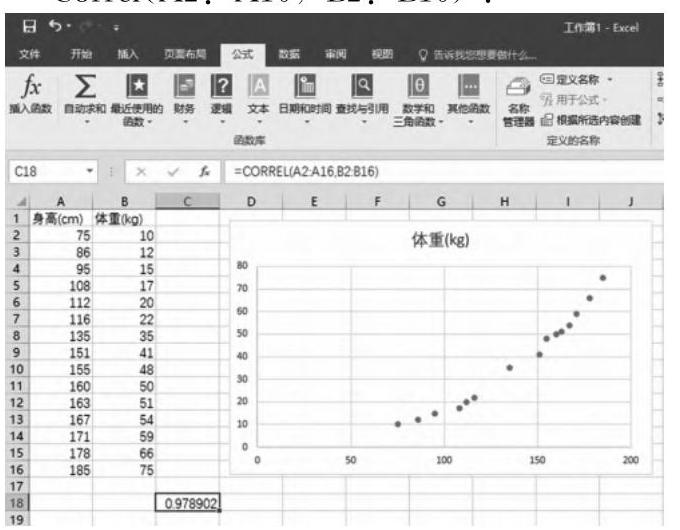

# 讨论题 

收集全班同学期中考试的数学成绩和物理成绩，利用散点图初步判断它们是否存在线性相关关系，并用以上方法计算它们的相关系数。

## 3.2 一元线性回归

变量的相关关系中，最简单同时也很重要的一类是线性相关关系。从散点图看，在这种相关关系下所描的点大致在一条直线附近，样本相关系数给出了线性相关程度的度量。那么，若存在明显的线性相关关系，怎样来确定这条直线呢？下面通过例子来说明。

下表是某小卖部 6 天卖出某热饮的杯数与当天气温的对照表：
表 1

| 气温/ ${ }^{\circ} \mathrm{C}$ | 26 | 18 | 13 | 10 | 4 | -1 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 杯数 | 20 | 24 | 34 | 38 | 50 | 64 |

我们依次考虑如下三个问题。
（一）直观分析气温与卖出热饮杯数的关系。
建立直角坐标系，横坐标代表气温，纵坐标代表卖出热饮的杯数，并作出散点图（如图3-3）。
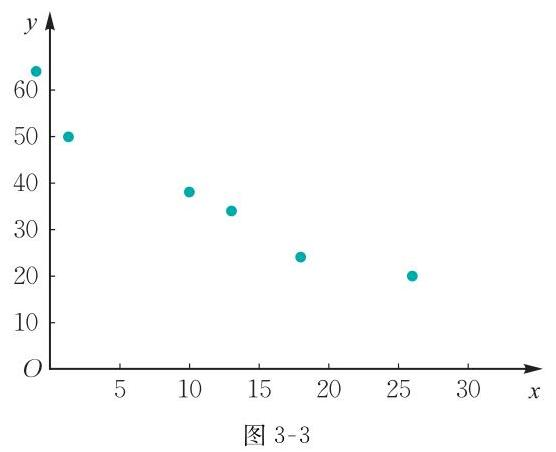

图 3-3

由散点图我们可以看出，卖出热饮的杯数随着气温的增加而减少。这些散点基本上在一条直线附近，可以认为卖出热饮的杯数与气温呈明显的线性相关关系，即可表示为

$$
y=a+b x+\varepsilon
$$

其中， $\varepsilon$ 表示误差项， $a 、 b$ 为未知参数。通常我们称 $x$ 和 $y$ 分别为自变量和因变量，称上式为一元线性回归模型。
（二）给出这条直线及其方程，计算样本相关系数。
这里涉及怎样配置一条合理的直线的问题。统计学中有一个历史悠久但依然最常用的有效方法——最小二乘法。

设 $\hat{y}=a+b x$ 是要寻找的直线，由自变量的 $n$ 个观察值 $x_{1}, x_{2}, \cdots, x_{n}$, 分别可得到 $\hat{y}_{1}, \hat{y}_{2}, \cdots, \hat{y}_{n}$, 则 $y_{1}-\hat{y}_{1}$, $y_{2}-\hat{y}_{2}, \cdots, y_{n}-\hat{y}_{n}$ 分别表示点 $\left(x_{i}, y_{i}\right)(i=1,2, \cdots, n)$ 与直线 $\hat{y}=a+b x$ 上横坐标为 $x_{i}$ 的点的纵坐标之差（称为偏差）。但用 $\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)$ 表示配置直线的整体误差是不恰当的，因为 $\left(y_{i}-\hat{y}_{i}\right)(i=1,2, \cdots, n)$ 中，可能有些为正、有些为负，求和后正负相抵消。可能造成这样的结果：有不少的点与配置直线

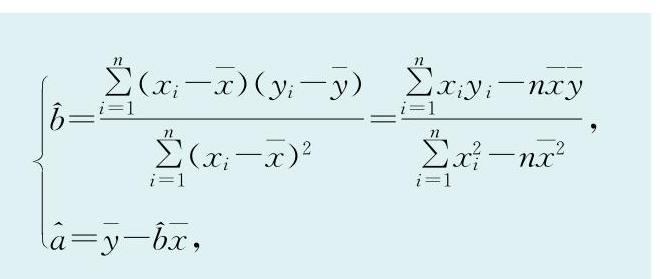

图的阅读材料中将介绍推导过程。

后面的阅读材料中将介绍推导过程。

前面的阅读材料中将介绍推导过程。

的平均数.
我们将这样得到的方程 $\hat{y}=\hat{a}+\hat{b} x$ 叫作回归直线方程, 也叫作线性回归方程，对应的直线叫作回归直线。

由表 1 中的数据, 利用计算器可以完成下表中的计算.
表 2

| $i$ | 1 | 2 | 3 | 4 | 5 | 6 | 求和 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| $x_{i}$ | 26 | 18 | 13 | 10 | 4 | -1 | 70 |
| $x_{i}^{2}$ | 676 | 324 | 169 | 100 | 16 | 1 | 1286 |
| $y_{i}$ | 20 | 24 | 34 | 38 | 50 | 64 | 230 |
| $y_{i}^{2}$ | 400 | 576 | 1156 | 1444 | 2500 | 4096 | 10172 |
| $x_{i} y_{i}$ | 520 | 432 | 442 | 380 | 200 | -64 | 1910 |

于是

$$
\begin{aligned}
& \bar{x}=\frac{70}{6} \approx 11.67, \bar{y}=\frac{230}{6} \approx 38.33 \\
& b=\frac{\sum_{i=1}^{6} x_{i} y_{i}-6 \overline{x y}}{\sum_{i=1}^{6} x_{i}^{2}-6 \bar{x}^{2}} \approx \frac{1910-6 \times 11.67 \times 38.33}{1286-6 \times 11.67^{2}} \\
& \approx \frac{-773.87}{468.87} \approx-1.65 \\
& \hat{a} \approx 38.33+11.67 \times 1.65 \approx 57.59
\end{aligned}
$$

因此, 所得回归直线方程为

$$
\hat{y}=57.59-1.65 x
$$

样本相关系数为

$$
\begin{aligned}
r & =\frac{\sum_{i=1}^{6}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{6}\left(x_{i}-\bar{x}\right)^{2}} \sqrt{\sum_{i=1}^{6}\left(y_{i}-\bar{y}\right)^{2}}} \\
& =\frac{\sum_{i=1}^{6} x_{i} y_{i}-6 \overline{x y}}{\sqrt{\sum_{i=1}^{6} x_{i}^{2}-6 \bar{x}^{2}} \sqrt{\sum_{i=1}^{6} y_{i}^{2}-6 \bar{y}^{2}}} \\
& =\frac{1910-6 \times 11.67 \times 38.33}{\sqrt{1286-6 \times 11.67^{2}} \sqrt{10172-6 \times 38.33^{2}}} \\
& \approx-0.9703
\end{aligned}
$$

# huжие 

若取 $x=-30^{\circ} \mathrm{C}$会如何？可能已经超出了建模时的基本环境，预测结果可能不准确。
（三）利用求出的回归直线方程，预测气温在 $-5^{\circ} \mathrm{C}$ 时，小卖部卖出的该热饮杯数。

根据上述回归直线方程，当 $x=-5\left({ }^{\circ} \mathrm{C}\right)$ 时，小卖部卖出的热饮杯数的估计值为

$$
\bar{y}=57.59-1.65 \times(-5)=65.84
$$

所以，卖出的热饮杯数的估计值为 66 。

## 练习

一个工厂某年每月产品的总成本 $y$ (单位：万元)与该月产量 $x$ (单位：万件)之间有如下一组数据：

| 月份 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| $x$ | 1.08 | 1.12 | 1.19 | 1.28 | 1.36 | 1.48 | 1.59 | 1.68 | 1.80 | 1.87 | 1.98 | 2.07 |
| $y$ | 2.25 | 2.37 | 2.40 | 2.55 | 2.64 | 2.75 | 2.92 | 3.03 | 3.14 | 3.26 | 3.36 | 3.50 |

(1) 作出散点图;
(2) 求月总成本 $y$ 与月产量 $x$ 的回归直线方程;
(3) 求样本相关系数.

## 习题 3.2

1. 测量 12 稞糖枫树的高度 $y$ 和离地 1.5 m 处的直径 $x$, 其数据如下:

| 直径 $x / \mathrm{cm}$ | 3 | 4 | 9 | 10 | 11 | 13 | 14 | 21 | 32 | 42 | 54 | 86 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 高度 $y / \mathrm{m}$ | 6 | 8.6 | 10.7 | 12 | 14.8 | 11.7 | 13.5 | 19.2 | 22.4 | 28 | 22.3 | 29.1 |

(1) 试作出散点图, 并进行简单分析;
(2) 求样本相关系数;
（3）若 $x$ 和 $y$ 之间存在线性相关关系，求糖枫树的高度 $y$ 与离地 1.5 m 处的直径 $x$ 的回归直线方程。
2. 下表所列是某地区近 7 年来春季降雨量与该地区春季平均温度的数据：

| 降雨量 $y / \mathrm{mm}$ | 25 | 33 | 45 | 105 | 110 | 115 | 120 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 温度 $x / \mathrm{C}$ | 6 | 8 | 10 | 13 | 14 | 16 | 17 |

(1) 作出降雨量与温度的散点图, 判断它们是否线性相关;
(2) 求降雨量关于温度的回归直线方程.

3. 从某一行业中随机抽取 12 个企业，所得产量与生产费用的数据如下：

| 企业编号 | 产量/千件 | 生产费用/千元 | 企业编号 | 产量/千件 | 生产费用/千元 |
| :--: | :--: | :--: | :--: | :--: | :--: |
| 1 | 40 | 130 | 7 | 84 | 165 |
| 2 | 42 | 150 | 8 | 100 | 170 |
| 3 | 50 | 155 | 9 | 116 | 167 |
| 4 | 55 | 140 | 10 | 125 | 180 |
| 5 | 65 | 150 | 11 | 130 | 175 |
| 6 | 78 | 154 | 12 | 140 | 185 |

作出产量与生产费用的散点图，判断二者之间是否线性相关。如果存在明显线性相关关系，请求出生产费用关于产量的回归直线方程。

# 最小二乘估计推导及线性相关关系判断 

## 1. 最小二乘估计推导

$$
\begin{aligned}
& \sum_{i=1}^{n}\left(y_{i}-b x_{i}-a\right)^{2} \\
= & \sum_{i=1}^{n}\left\{\left(y_{i}-\bar{y}\right)+[\bar{y}-(b \bar{x}+a)]-b\left(x_{i}-\bar{x}\right)\right\}^{2} \\
= & \sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}+n[\bar{y}-(b \bar{x}+a)]^{2}+b^{2} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}+2[\bar{y} \\
& -(b \bar{x}+a)] \sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)-2 b[\bar{y}-(b \bar{x}+a)] \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right) \\
& -2 b \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right) \\
= & \sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}+n[\bar{y}-(b \bar{x}+a)]^{2}+b^{2} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}- \\
& 2 b \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right) \\
= & \sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}+n[\bar{y}-(b \bar{x}+a)]^{2}+\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2} \\
& {\left[b^{2}-2 b \frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}\right] }
\end{aligned}
$$

$$
\begin{aligned}
& =\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}+n[\bar{y}-(\bar{b} \bar{x}+a)]^{2}+\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}[b- \\
& \quad \frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}]^{\frac{2}{2}}-\frac{\left[\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)\right]^{2}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \\
& =n[\bar{y}-(\bar{b} \bar{x}+a)]^{2}+\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}\left[b-\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}\right]^{2} \\
& \quad+\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}-\frac{\left[\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)\right]^{2}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}
\end{aligned}
$$

上式中后两项与 $a, b$ 无关，前两项为非负数，因此，当且仅当前两项的值都为 0 时， $\sum_{i=1}^{n}\left(y_{i}-a-b x_{i}\right)^{2}$ 取最小值，即有 $a, b$ 的最小二乘估计为

$$
\left\{\begin{array}{l}
\bar{b}=\frac{\sum_{1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}=\frac{\sum_{i=1}^{n} x_{i} y_{i}-n \bar{x} \bar{y}}{\sum_{i=1}^{n} x_{i}^{2}-n \bar{x}^{2}} \\
\bar{a}=\bar{y}-\bar{b} \bar{x}
\end{array}\right.
$$

# 2. 线性相关关系判断 

在 3.2 节所讨论的问题中，我们利用散点图直观判断两变量存在明显的线性相关关系，在此基础上一元线性回归模型是恰当的，求出了 $a, b$ 的最小二乘估计，得到线性回归方程，并据此给出了因变量的预测。这一切都依赖于散点图的直观判断，或在两个变量存在明显的线性相关关系的假定下才有意义。

事实上，最小二乘法本身与是否存在线性相关关系无关。另外，即使两个变量存在明显的线性相关关系，样本点（散点）也不一定在一直线上，因此直观判断会有偏差；其次，两个变量存在明显的线性相关关系的假定需要进行客观验证。

如何客观验证两个变量存在明显的线性相关关系，统计学给出了假设检验的方法，其理论基础是小概率原理——概率很小的事件在一次试验中几乎不会发生。如何进行假设检验？我们很容易想到度量成对样本数据线性相关关系程度的量——样本相关系数。

$$
r=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2} \sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}}=\frac{\sum_{i=1}^{n} x_{i} y_{i}-n \bar{x} \bar{y}}{\sqrt{\sum_{i=1}^{n} x_{i}^{2}-n \bar{x}^{2}} \sqrt{\sum_{i=1}^{n} y_{i}^{2}-n \bar{y}^{2}}}
$$

假设检验的步骤为：
第一步，提出统计假设 $H_{0}: x$ 与 $y$ 不具有线性相关关系；

第二步，根据样本观测数据计算 $r$ 的值；
第三步，选取适当的小概率 $\alpha$ ，并查出相应的临界值 $r_{n}(n$ $-2)$ ，其中 $n$ 为样本容量，据此确定拒绝条件；

第四步，作出统计推断，若 $|r| \geqslant r_{n}(n-2)$ （实际发生了概率不超过 $\alpha$ 的小概率事件，违背小概率原理），表明有 $100 \times(1-\alpha) \%$的把握认为 $x$ 与 $y$ 之间具有线性相关关系（应否定统计假设 $H_{0}$ ）。否则，若 $|r|<r_{n}(n-2)$ ，则没有明显理由拒绝假设 $H_{0}$ ，即可以认为 $x$ 与 $y$ 不具有线性相关关系，所求出的回归方程没有意义。

本章后给出了相关系数检验的临界值 $\left(r_{n}(n-2)\right)$ 附表。

例 对 3.2 节表 1 中气温 $x$ 与卖出热饮杯数 $y$ 作线性相关性检验。

解 第一步，作统计假设 $H_{0}: x$ 与 $y$ 不具有线性相关关系；
第二步，根据样本观测数据计算样本相关系数，由 3.2 节的计算结果知 $r=-0.9703$ ；

第三步，选取小概率 $\alpha=0.05$ ，并查出相应的临界值 $r_{0.05(4)}=0.811$

第四步，因为 $|r|=0.9703>0.811$ ，应该拒绝 $H_{0}$ ，即认为气温 $x$ 与卖出热饮杯数 $y$ 之间存在显著线性相关关系。此时一元线性回归中所做的事情才都有意义。

常用 $r^{2}$ 作为两个变量线性相关关系的判定系数，也称拟合优度，且对一元线性回归问题有

$$
\begin{aligned}
r^{2} & =\left[\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\left(\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2} \sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}\right]^{2}}\right]^{2} \\
& =\left[\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}\right]^{2} \frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}} \\
& =b^{2} \frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}
\end{aligned}
$$

这说明：若 $b$ 的最小二乘估计值很小，则 $x$ 和 $y$ 之间可能不存在明显的线性相关关系。

# 讨论题 

1. 依据习题 3.2 中第 1 题的数据, 对 $x$ 与 $y$ 进行相关性检验.
2. 上网查找子女身高与父母身高的相关资料, 用统计的知识进行分析.

# 可线性化的回归问题 

前面讨论的案例是一元线性回归的问题，在实际生产、生活中我们常常会遇到更为复杂的问题。如，3.1.1节例 2 中 2003 年北京市非典疫情的部分数据显示累计确诊病例与时间（单位：天）呈非线性相关（曲线相关）关系，另外合金的抗压强度与添加剂的浓度之间的关系、某种半成品的次品率与它的某种化学成分含量之间的关系等，都呈现出一种"曲线关系"。但在某些情况下，有些曲线关系可以通过适当的变量代换转化为线性的形式。

例 下表所列是某年美国旧轿车的参考价格。用 $x$表示轿车的使用年数， $y$ 表示相应的价格，求 $y$ 关于 $x$ 的回归方程。

| 使用年数 $x$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 平均价格 | 2651 | 1943 | 1494 | 1087 | 765 | 538 | 484 | 290 | 226 | 204 |
| $y /$ 美元 |  |  |  |  |  |  |  |  |  |  |

解 作散点图（如图1）。
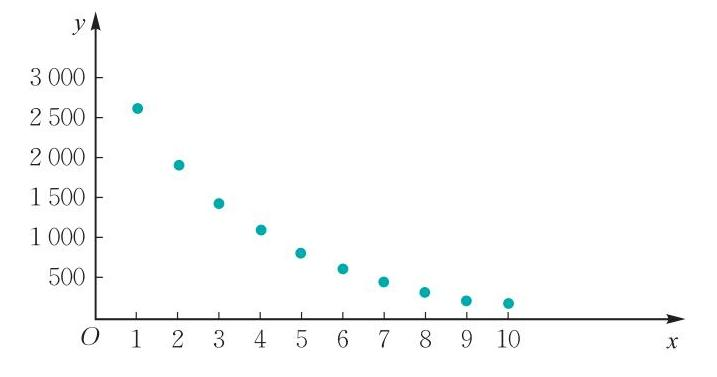

图 1
由散点图可以看出 $y$ 与 $x$ 之间大致呈指数的关系，不妨设 $y=a \mathrm{e}^{b x}$ ，于是有

$$
\ln y=\ln a+b x
$$

令 $z=\ln y, \alpha=\ln a, \beta=b$, 得 $z=\alpha+\beta x$.

列表如下：

| $x$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| $z=\ln y$ | 7. 883 | 7. 572 | 7. 309 | 6. 991 | 6. 640 | 6. 288 | 6. 182 | 5. 670 | 5. 421 | 5. 318 |

作出 $x$ 与 $z$ 的散点图（如图2）。
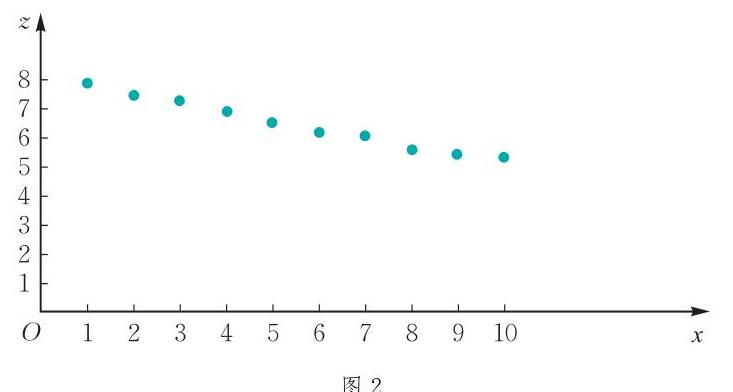

图 2
由散点图可以看出各点基本处在一条直线上，故可认为变量 $z$ 与 $x$ 之间存在明显的线性相关关系（建议同学们自己做相关性检验），采用本节介绍的方法及步骤可求得：

$$
\hat{\beta}=-0.298, \hat{a}=8.165
$$

从而

$$
\hat{z}=8.165-0.298 x
$$

代回原变量，得曲线的回归方程为

$$
\hat{y}=3515.72 \mathrm{e}^{-0.298 x}
$$

# 思考题 

在农业科学研究中，有时需要掌握土壤渗水的规律。检测水分在某种土壤中的渗透速度，得到时间 $t$ (单位: min ) 和渗水速度 $v$ (单位: $\mathrm{mm} / \mathrm{min}$ ) 间的对应数据如下表:

| $t$ | 2 | 5 | 10 | 15 | 20 | 30 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| $v$ | 5.65 | 3.80 | 2.28 | 1.87 | 1.57 | 1.45 |

（1）试作出散点图，并选择合适的回归曲线方程；
（2）求出其回归方程。

# 3.3 

## 2×2 列联表

## 示1 列联表

在现实生活中还大量存在这样一类变量, 这种变量的不同 "值" 表示个体所属的不同类别, 我们称之为分类变量 (也称定性变量)。例如：一种产品分为若干个等级；对某服务机构的评价可分为非常满意、满意、基本满意、不满意等；天气的状况可分为下雨、阴天、晴天；等等。对于非分类变量，由于我们关注的角度不同, 也可将其分类化, 例如：灯泡的寿命是非分类变量, 但我们关注的常常是它的等级 (由寿命的范围确定), 考察灯泡质量的变量就转化为分类变量; 学生成绩可分为优、良、中、及格和不及格。 2 分类变量是最简单的情形,例如性别分男、女, 产品分合格、不合格, 等等。

在日常生活中，我们常常关心两个分类变量之间是否有关联, 为此必须进行观察或试验获取样本数据. 一般设分类变量 $X$ 有 $r$ 个类别, 记为 $A_{1}, A_{2}, \cdots, A_{r}$, 分类变量 $Y$ 有 $s$ 个类别, 记为 $B_{1}, B_{2}, \cdots, B_{s}$. 对每个被调查个体记录两个类别的分类变量, 对 $n$ 个被调查个体便得到容量为 $n$ 的成对样本数据.

用 $n_{i j}$ 表示变量 $X$ 属于第 $i$ 类 $A_{j}$ 且变量 $Y$ 属于第 $j$ 类 $B_{j}$的样本数, 即事件 $A_{i} B_{j}$ 发生的频数, 则 $n_{i},=\sum_{j=1}^{s} n_{i j}$ 表示事件 $A_{i}$ 发生的频数, $n_{, j}=\sum_{i=1}^{s} n_{i j}$ 表示事件 $B_{j}$ 发生的频数. 将分类样本数据交叉整理的结果用如下表格呈现。

|  | $B_{1}$ | $B_{2}$ | $\cdots$ | $B_{s}$ | 合计 |
| :--: | :--: | :--: | :--: | :--: | :--: |
| $A_{1}$ | $n_{11}$ | $n_{12}$ | $\cdots$ | $n_{1 s}$ | $n_{1}$ 。 |
| $A_{2}$ | $n_{21}$ | $n_{22}$ | $\cdots$ | $n_{2 s}$ | $n_{2}$ 。 |
| $\vdots$ | $\vdots$ | $\vdots$ | $\ddots$ | $\vdots$ | $\vdots$ |
| $A_{s}$ | $n_{s 1}$ | $n_{s 2}$ | $\cdots$ | $n_{s s}$ | $n_{s}$ 。 |
| 合计 | $n_{, 1}$ | $n_{, 2}$ | $\cdots$ | $n_{, s}$ | $n$ |

上表称为 $r \times s$ 列联表, 它是整理、呈现两个分类变量数据的一个非常有效的形式. 这里我们仅讨论两个 2 分类变量 $(2 \times 2$ 列联表) 的问题.

# 1.3.2 $2 \times 2$ 列联表的独立性检验 

对于两个 2 分类变量 $X, Y$, 有时需要讨论它们是否存在关联, 下面通过例子来介绍统计学的方法.

问题 为了研究老年人患慢性支气管炎 (变量 $Y$, 该病简称老慢支) 是否与吸烟 (变量 $X$ ) 有关, 某医疗机构随机调查了 2000 名 60 岁以上的老人, 得到如下结果.

|  | 患老慢支 | 未患老慢支 | 合计 |
| :--: | :--: | :--: | :--: |
| 吸烟 | 22 | 627 | 649 |
| 不吸烟 | 20 | 1331 | 1351 |
| 合计 | 42 | 1958 | 2000 |

试问：患老慢支与吸烟有关吗?

表中列出了 2000 名 60 岁以上的老人在吸烟和不吸烟两种状态下患老慢支和未患老慢支的频数, 这种表我们称之为 $2 \times$ 2 列联表. 由表中所给出的频数可以粗略地估算出, 在吸烟和不吸烟的老人中, 患老慢支的比例分别为 $3.39 \%$ 和 $1.48 \%$.由此, 直观上我们就可能会认为: 患老慢支与吸烟有关. 但导致这种差异主要有两个因素：一个是吸烟的关系，另一个是随机调查的误差. 因此判断这一观点是否正确, 还需要经过统计学的验证——假设检验.

为此, 我们先作假设
$H_{0}$ ：患老慢支与吸烟完全没有关联.
若 "患老慢支与吸烟完全没有关联", 则意味着: "吸烟与患

老慢支这两个事件是相互独立的。"如果用 $A$ 表示吸烟这一事件， $B$ 表示患老慢支这一事件，则假设 $H_{0}$ 的数学描述可以表示为

$$
H_{0}: P(A B)=P(A) P(B)
$$

也就是说要判断患老慢支与吸烟是否有关，实质上就是根据 $2 \times 2$ 列联表中的数据来检验上式是否成立。这一检验我们称之为 $2 \times 2$ 列联表的独立性检验（independence test）。

假设检验的理论基础是小概率原理——概率很小的事件在一次试验中几乎不发生。若在 $H_{0}$ 成立的假设下，实际发生了小概率事件，则我们有充足的理由认为假设 $H_{0}$ 不成立。

如果通过检验，上式成立，则事件 $A$ 与事件 $B$ 相互独立 （也称变量 $X$ 与 $Y$ 完全无关联），即可以认为患老慢支与吸烟没有关联；否则就认为患老慢支与吸烟明显有关。

为了方便讨论及应用，我们将问题中 $2 \times 2$ 列联表中的数据字母化，得到下表。

|  | 患老慢支 | 未患老慢支 | 合计 |
| :--: | :--: | :--: | :--: |
| 吸烟 | $a$ | $b$ | $a+b$ |
| 不吸烟 | $c$ | $d$ | $c+d$ |
| 合计 | $a+c$ | $b+d$ | $n=a+b+c+d$ |

若用频率来估计概率，则事件 $A$ 发生的概率估计值为 $\frac{a+b}{n}$ ，事件 $B$ 发生的概率估计值为 $\frac{a+c}{n}$ ，事件 $A$ 与事件 $B$ 同时发生的概率估计值为 $\frac{a}{n}$.

当假设 $H_{0}$ 成立时，理论上有 $P(A B)=P(A) P(B)$ ，所以，对于上述实际观测值，应有 $\frac{a}{n} \frac{a+b}{n} \times \frac{a+c}{n}$ 相差不远，即

$$
\frac{a}{n} \approx \frac{a+b}{n} \times \frac{a+c}{n}
$$

即

$$
n a \approx(a+b)(a+c)
$$

将 $n=a+b+c+d$ 代人上式得

$$
(a+b+c+d) a \approx(a+b)(a+c)
$$

从而

$$
a d \approx b c
$$

也就是说，如果认为假设 $H_{0}$ 成立， $|a d-b c|$ 应该比较

小，且 $|a d-b c|$ 的值越小，表明吸烟与患老慢支之间的关联越弱. 如果 $|a d-b c|$ 较大，或者说大到一定的程度，我们就有理由怀疑所作的假设 $H_{0}$ 的正确性，从而拒绝假设 $H_{0}$ ，即认为，患老慢支与吸烟之间有关联。

在统计学理论中，常选择下面的统计量

$$
K^{2}=\frac{n(a d-b c)^{2}}{(a+b)(c+d)(a+c)(b+d)}
$$

替代随机变量 $|a d-b c|$ ，以 $K^{2}$ 的值比某一个 $k$ 值大或小作为拒绝或接受假设 $H_{0}$ 的依据。我们称 $K^{2}$ 为检验统计量（teststatistics).

具体做法是：先由列联表计算统计量 $K^{2}$ 的取值，再对给定小概率 $\alpha$ (通常取为 $0.1,0.05,0.01$ )查如下附表得对应的 $k$. 若算出的 $K^{2}$ 值大于或等于 $k$, 由小概率原理, 就拒绝 $H_{0}$,即拒绝 "变量 $X$ 与 $Y$ 完全无关"，从而认为变量 $X$ 与 $Y$ 是有明显关联的；若算出的 $K^{2}$ 值小于 $k$, 则接受 $H_{0}$, 即可以认为变量 $X$ 与 $Y$ 完全无关。

附表（在 $H_{0}$ 成立时）：

| $k$ | 0.455 | 0.708 | 1.323 | 2.072 | 2.706 | 3.841 | 5.021 | 6.635 | 7.879 | 10.828 |
| :-- | :-- | :-- | :-- | :-- | :-- | :-- | :-- | :-- | :-- | :-- |
| $P\left(K^{2} \geqslant k\right)$ | 0.50 | 0.40 | 0.25 | 0.15 | 0.10 | 0.05 | 0.025 | 0.010 | 0.005 | 0.001 |

在问题中，若选取 $\alpha=0.01$ ，通过查表，可得 $k=6.635$ ，而由列联表中的数据计算可得 $K^{2}$ 的观测值为

$$
K^{2}=\frac{2000 \times(22 \times 1331-627 \times 20)^{2}}{649 \times 1351 \times 42 \times 1958} \approx 7.775>6.635
$$

因此，拒绝假设 $H_{0}$ ，即认为患老慢支与吸烟有关。当然，我们依据一次试验的数据而断言患老慢支与吸烟有关，并不是不会犯错的。但由于在假设 $H_{0}$ 成立的条件下，事件 $\left\{K^{2}>\right.$ 6.635 】发生的概率只有 0.01 ，因此，由 $K^{2}$ 的观测值为 7.775作出拒绝假设 $H_{0}$ 时犯错的可能性不超过 $1 \%$ 。一般对选取的小概率 $\alpha$, 作出拒绝假设 $H_{0}$ 时犯错的可能性不超过 $\alpha$, 此时对我们作出的结论很有信心，若作出接受假设 $H_{0}$ 时，则没有那么有信心，因此我们说 "可以接受假设 $H_{0}$ "。

根据上面的分析，可将独立性检验的一般步骤归纳为：
（1）根据实际问题作出假设 $H_{0}$ ：变量 $X$ 与 $Y$ 相互独立 （完全无关）；
（2）依据 $2 \times 2$ 列联表中的数据计算出统计量 $K^{2}$ 的观测值；
（3）给定小概率 $\alpha$ ，通过查表求出相应的临界值 $k$ ；
（4）通过 $K^{2}$ 的观测值与临界值的比较，对假设 $H_{0}$ 作出拒绝与否的判断，并得出结论。

# 解 

某种产品可以采用两种工艺来生产。为了研究产品的质量与所采用的生产工艺是否有关，现对采用两种不同工艺生产的该种产品进行随机抽查，得到如下结果。

|  | 工艺 I | 工艺 II | 合计 |
| :--: | :--: | :--: | :--: |
| 合格 | 63 | 47 | 110 |
| 不合格 | 16 | 7 | 23 |
| 合计 | 79 | 54 | 133 |

试问：产品的质量与所采用的工艺有关吗？（ $\alpha=0.05$ ）
解 根据题意，作假设
$H_{0}$ ：该种产品的质量与所采用的工艺完全无关。
对 $\alpha=0.05$ ，通过查表可得临界值 $k=3.841$ 。而由 $2 \times 2$列联表中的数据可得

$$
K^{2}=\frac{133 \times(63 \times 7-47 \times 16)^{2}}{110 \times 23 \times 79 \times 54} \approx 1.192 \leqslant 3.841
$$

因此不拒绝假设 $H_{0}$ ，即可以认为产品的质量与生产工艺完全无关。

# $2 \times 3$ 列联表的独立性检验 

教材中介绍的是两个 2 分类变量的独立性检验。而对于两个 2 分类变量, 它们之间的相关关系只有线性相关, 即线性不相关与独立性是等价的, 因此, 此时的独立性检验也即是线性不相关性检验。更一般的情形是列联表独立性检验被应用于两个多分类变量。

例 为了研究患慢性支气管炎与吸烟量的关系, 调查了 385 人, 统计数字如下表所示:

|  | $a$ 支/日 | $b$ 支/日 | $c$ 支/日 | 求和 $\left(n_{i} .\right)$ |
| :--: | :--: | :--: | :--: | :--: |
| 患病者人数 | 26 | 147 | 37 | 210 |
| 健康者人数 | 30 | 123 | 22 | 175 |
| 求和 | 56 | 270 | 59 | 385 |

试问慢性支气管炎与吸烟量是否有关系?
解 这里, 两个分类变量中的一个分为三个类型, 两个变量不相关 (线性) 与独立不等价。

统计假设 $H_{0}$ ：吸烟量与患慢性支气管炎没有任何相关关系。

通过构造检验统计量

$$
K^{2}=n \sum_{i=1}^{2} \sum_{j=1}^{3} \frac{\left(n_{i j}-\frac{n_{i} \cdot n_{j}}{n}\right)^{2}}{n_{i} \cdot n_{j}}
$$

查统计表中 $\chi^{2}$ 一统计表得 $k=\chi_{0.05}^{2}(2)=5.9915$. 因此可以接受统计假设, 认为患慢性支气管炎与吸烟量无显著关联。

结合教材中例题, 可得出一个有趣的结论, 即：老年人患慢性支气管炎与吸烟有显著关联, 但与吸烟量无显著关联.

# 习题 3.3 

1. 表中给出了在气候条件较差的情况下乘飞机旅行的旅客中得航空病（晕飞机）的男性人数和女性人数。根据这些数据判断：得航空病与性别有关吗？（ $\alpha=0.05$ ）

|  | 得航空病 | 未得航空病 | 合计 |
| :--: | :--: | :--: | :--: |
| 男 | 24 | 31 | 55 |
| 女 | 8 | 26 | 34 |
| 合计 | 32 | 57 | 89 |

2. 为了研究某种疫苗的效果，志愿者进行了试验，得到如下数据。

|  | 未感染病毒 | 感染病毒 | 合计 |
| :--: | :--: | :--: | :--: |
| 未接种 | 130 | 20 | 150 |
| 接种 | 97 | 3 | 100 |
| 合计 | 227 | 23 | 250 |

试问：该种疫苗有效吗？（ $\alpha=0.01$ ）

## 绕习题

## A 组

1. 小概率原理是什么？
2. 在独立性检验中，如果不拒绝假设 $H_{0}$ ，我们会犯错吗？犯错的可能性有多大？
3. 叙述独立性检验的步骤。
4. 解释一元线性回归模型和回归方程的含义。
5. 为什么要进行相关性检验？写出检验的步骤。
6. 简述判定系数的含义与作用。

## B 组

1. 下表列出了 10 个 $5 \sim 8$ 岁儿童的重量和体积：

| 重量 $x / \mathrm{kg}$ | 17.1 | 13.8 | 16.5 | 11.9 | 15.1 | 15.0 | 17.8 | 15.8 | 12.1 | 17.1 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 体积 $y / 10^{-3} \mathrm{~m}^{3}$ | 16.7 | 13.5 | 15.9 | 11.6 | 14.5 | 14.5 | 17.6 | 15.2 | 11.9 | 16.6 |

(1) 作出散点图;
(2) 判断相关关系形态;
(3) 求出 $y$ 关于 $x$ 的回归方程;
(4) 若已知某儿童的重量为 $10.4 \mathrm{~kg}$, 预测其体积.

2. 一个企业为了了解工人对现行的管理办法是否满意，随机调查了 210 名工人，得到如下数据。

|  | 满意 | 不满意 | 合计 |
| :--: | :--: | :--: | :--: |
| 男工 | 30 | 70 | 100 |
| 女工 | 45 | 65 | 110 |
| 合计 | 75 | 135 | 210 |

试问：男工与女工对管理的态度有显著的差别吗？（ $a=0.05$ ）
3. 一种原料来自两个不同的地区，其质量也分为两个不同的等级，通过随机抽查，得到如下数据。

|  | 优 | 劣 | 合计 |
| :--: | :--: | :--: | :--: |
| 甲地 | 50 | 84 | 134 |
| 乙地 | 60 | 111 | 171 |
| 合计 | 110 | 195 | 305 |

试问：该种原料的质量与产地有关吗？（ $a=0.01$ ）

# 思考与实践 

1. 对本年级学生身高与体重进行随机抽样，作出体重关于身高的散点图，求出身高与体重相应的回归方程，对回归方程的拟合优度进行判断，同时分析影响体重的因素有哪些，并对日常生活中我们该如何将体重控制在标准范围内提出建议。
2. 对于相同的观测数据，有时可用不同的函数进行拟合。例如，本章"课题学习"中用函数 $y=a e^{b z}$来拟合观测数据。观察散点图可知，也可用二次函数来拟合。试以函数 $y=a(x-12)^{2}+b$ 拟合该题数据，并对两个函数的拟合优度作出比较。

# 相关系数检验的临界值表 

| $n-2$ | $\alpha$ |  | $n-2$ | $\alpha$ |  | $n-2$ | $\alpha$ |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  | 0.05 | 0.01 |  | 0.05 | 0.01 |  | 0.05 | 0.01 |
| 1 | 0.997 | 1.000 | 11 | 0.553 | 0.684 | 21 | 0.413 | 0.526 |
| 2 | 0.950 | 0.990 | 12 | 0.532 | 0.661 | 22 | 0.404 | 0.515 |
| 3 | 0.878 | 0.959 | 13 | 0.514 | 0.641 | 23 | 0.396 | 0.505 |
| 4 | 0.811 | 0.917 | 14 | 0.497 | 0.623 | 24 | 0.388 | 0.496 |
| 5 | 0.754 | 0.874 | 15 | 0.482 | 0.606 | 25 | 0.381 | 0.487 |
| 6 | 0.707 | 0.834 | 16 | 0.468 | 0.590 | 26 | 0.374 | 0.478 |
| 7 | 0.666 | 0.798 | 17 | 0.456 | 0.575 | 27 | 0.364 | 0.470 |
| 8 | 0.632 | 0.765 | 18 | 0.444 | 0.561 | 28 | 0.361 | 0.463 |
| 9 | 0.602 | 0.735 | 19 | 0.433 | 0.549 | 29 | 0.355 | 0.456 |
| 10 | 0.576 | 0.708 | 20 | 0.423 | 0.537 | 30 | 0.349 | 0.449 |

注：表中的 $\alpha$ 为显著性水平， $n$ 为观测值的组数

# 后 记 

为了全面贯彻党的教育方针, 适应时代发展的需要, 为学生的终身发展奠定基础，依据《普通高中数学课程标准（2017 年版)》, 我们组织专家学者编写了这套普通高中数学教科书.

在本套教科书的编写过程中, 我们得到了许多数学教育界前辈、数学课程专家、数学教育理论工作者、中学数学教研员和教师的大力支持和热情帮助, 我们对他们的辛勤付出表示衷心的感谢. 我们还要特别感谢华中师范大学数学与统计学学院对本套教科书编写工作的高度重视和大力支持.

本套教科书是全体编写人员集体智慧的结晶. 除已列出的主要编写者外, 参加本册教科书编写讨论的还有：郭熙汉、彭树德、刘运新、高云、高保中、岑爱国、郭希连、乔安国、罗国彬、覃红、汪伯林、田杰、张琴、陈欣等.

我们还要感谢使用本套教科书的师生们, 期待你们在使用本套教科书的过程中, 及时把意见和建议反馈给我们, 以便我们进一步修改完善.

# 责任编辑 田 杰 陈 欣 封面设计 牛 红 刘舒文 

普通高中教科书 数学 选择性必修 第三册

| 出 | 版 | 湖北教育出版社 | 430070 | 武汉市雄楚大街268号 |
| :-- | :-- | :-- | :-- | :-- |
| 经 | 销 | 新 华 书 店 |  |  |
| 网 | 㕵 | http://www.hbedup.com |  |  |
| 印 | 刷 | 武汉中远印务有限公司 |  |  |
| 开 | 本 | $890 \mathrm{~mm} \times 1240 \mathrm{~mm}$ | $1 / 16$ |  |
| 印 | 张 | 6.5 |  |  |
| 字 | 数 | 120 千字 |  |  |
| 版 | 次 | 2019 年 11 月第 1 版 |  |  |
| 印 | 次 | 2019 年 11 月第 1 次印刷 |  |  |
| 书 | 号 | ISBN 978-7-5564-3146-5 |  |  |
| 定 | 价 | 6.35 元 |  |  |

版权所有,盗版必究
(图书如出现印装质量问题,请联系 027-83637493 进行调换)

In [17]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    """ 將 Markdown 內的圖片 URL 替換為 Base64 格式 """
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    """ 遍歷 OCR 解析出的所有頁面，將內容整理成 Markdown 格式 """
    markdowns = []
    for page in pdf_response.pages:
        image_data = {img.id: img.image_base64 for img in page.images}
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))
    return "\n\n".join(markdowns)

# 取得 OCR 結果的 Markdown 格式
markdown_text = get_combined_markdown(pdf_response)

# 顯示 Markdown 內容
display(Markdown(markdown_text))

In [18]:
# 設定輸出 Markdown 檔案路徑
output_markdown_path = "/content/drive/MyDrive/allbooks/hs/k12books20240618/math3_ocr_output.md"

# 儲存 Markdown 到 Google Drive
with open(output_markdown_path, "w", encoding="utf-8") as f:
    f.write(markdown_text)

print(f"OCR 轉換後的 Markdown 已儲存到: {output_markdown_path}")

OCR 轉換後的 Markdown 已儲存到: /content/drive/MyDrive/allbooks/hs/k12books20240618/math3_ocr_output.md
